In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif
from sklearn.decomposition import PCA

import random

In [6]:
df = pd.read_csv(r'D:\ML Assignment 3\df_out.csv', index_col = 0)
pcavalues = [2, 5, 10, 20, 30]
scores = ['precision', 'recall', 'accuracy', 'f1']

In [7]:
def classifying1(x):
    if x > 1: 
        return 1
    else:
        return 0

In [8]:
def preprocess_percentile(X_train, X_test, y_train, y_label, per=10):
    selector = SelectPercentile(f_classif, percentile=per)
    selector.fit(X_train, y_train)
    features_train_transformed = selector.transform(X_train)
    features_test_transformed  = selector.transform(X_test)

    return features_train_transformed, features_test_transformed, y_train, y_label

In [9]:
def preprocess_kbest(X_train, X_test, y_train, y_label, kbest=10):
    selector = SelectKBest(f_classif, k=kbest)
    selector.fit(X_train, y_train)
    features_train_transformed = selector.transform(X_train)
    features_test_transformed  = selector.transform(X_test)

    return features_train_transformed, features_test_transformed, y_train, y_label

In [10]:
def preprocess_pca(features_train, features_test, n_comp=5):
    pca = PCA(n_components = n_comp)
    features_train = pca.fit_transform(features_train)
    features_test = pca.transform(features_test)
    PCA(copy = True, iterated_power = 'auto', n_components = n_comp, svd_solver = 'auto', tol = 0.0, whiten = False)
    variances = pca.explained_variance_ratio_
    ncomps = [n for n in range(1, n_comp+1)]
    
    plt.figure(figsize=(20,5))
    p1 = sns.barplot(x = ncomps, y = variances)
    p1.set(xlabel = "Number of principle components", ylabel = "Variance")
    p1.plot()
    
    return features_train, features_test
    
    

In [11]:
df["classes"] = df['2015 PRICE VAR [%]'].apply(classifying1)
df.corrwith(df["2015 PRICE VAR [%]"]).sort_values(ascending = False)

2015 PRICE VAR [%]                 1.000000
Class                              0.652077
classes                            0.651469
EPS Diluted                        0.118955
EPS                                0.117757
                                     ...   
cashPerShare                      -0.052292
Cash per Share                    -0.052292
Shareholders Equity per Share     -0.056133
Property, Plant & Equipment Net   -0.059593
Book Value per Share              -0.097445
Length: 64, dtype: float64

In [12]:
df = df.drop(columns=['2015 PRICE VAR [%]','Class', 'Sector'])
nparray = df.to_numpy()

In [13]:
features = nparray[:,0:-1]
label = nparray[:,-1]

X = features
y = label

features.shape

(3788, 61)

In [14]:
resultsDF = pd.DataFrame([], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

# SVC Linear

The best estimator for RUN 1 n_components = 2scoring = precision LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1 n_components = 2 scoring = precision is 

[[[239  82]
  [339  98]]

 [[ 98 339]
  [ 82 239]]]
None
The best estimator for RUN 1 n_components = 2scoring = recall LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1 n_components = 2 scoring = recall is 

[[[235  68]
  [354 101]]

 [[101 354]
  [ 68 235]]]
None
The best estimator for RUN 1 n_components = 2scoring = accuracy LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scal

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 2scoring = recall LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 2 scoring = recall is 

[[[271  53]
  [352  82]]

 [[ 82 352]
  [ 53 271]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 2scoring = accuracy LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 2 scoring = accuracy is 

[[[235  78]
  [354  91]]

 [[ 91 354]
  [ 78 235]]]
None
The best estimator for RUN 2 n_components = 2scoring = f1 LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':



The Confusion matrix for RUN2 n_components = 2 scoring = f1 is 

[[[254  67]
  [363  74]]

 [[ 74 363]
  [ 67 254]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5scoring = precision LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 5 scoring = precision is 

[[[235  65]
  [340 118]]

 [[118 340]
  [ 65 235]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5scoring = recall LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 5 scoring = recall is 

[[[244  55]
  [330 129]]

 [[129 330]
  [ 55 244]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5scoring = accuracy LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 5 scoring = accuracy is 

[[[259  48]
  [319 132]]

 [[132 319]
  [ 48 259]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5scoring = f1 LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 5 scoring = f1 is 

[[[235  50]
  [361 112]]

 [[112 361]
  [ 50 235]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10scoring = precision LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 10 scoring = precision is 

[[[253  59]
  [342 104]]

 [[104 342]
  [ 59 253]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10scoring = recall LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 10 scoring = recall is 

[[[249  54]
  [351 104]]

 [[104 351]
  [ 54 249]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10scoring = accuracy LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 10 scoring = accuracy is 

[[[270  53]
  [351  84]]

 [[ 84 351]
  [ 53 270]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10scoring = f1 LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 10 scoring = f1 is 

[[[249  51]
  [339 119]]

 [[119 339]
  [ 51 249]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20scoring = precision LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 20 scoring = precision is 

[[[237  75]
  [317 129]]

 [[129 317]
  [ 75 237]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20scoring = recall LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 20 scoring = recall is 

[[[233  66]
  [328 131]]

 [[131 328]
  [ 66 233]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20scoring = accuracy LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 20 scoring = accuracy is 

[[[254  63]
  [321 120]]

 [[120 321]
  [ 63 254]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20scoring = f1 LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 20 scoring = f1 is 

[[[235  78]
  [316 129]]

 [[129 316]
  [ 78 235]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30scoring = precision LinearSVC(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 30 scoring = precision is 

[[[231  77]
  [285 165]]

 [[165 285]
  [ 77 231]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30scoring = recall LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 30 scoring = recall is 

[[[252  66]
  [317 123]]

 [[123 317]
  [ 66 252]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30scoring = accuracy LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 30 scoring = accuracy is 

[[[232  69]
  [317 140]]

 [[140 317]
  [ 69 232]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30scoring = f1 LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2 n_components = 30 scoring = f1 is 

[[[253  63]
  [317 125]]

 [[125 317]
  [ 63 253]]]
None
The best estimator for RUN 3 n_components = 2scoring = precision LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 2 scoring = precision is 

[[[216  94]
  [325 123]]

 [[123 325]
  [ 94 216]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 2scoring = recall LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 2 scoring = recall is 

[[[215  81]
  [356 106]]

 [[106 356]
  [ 81 215]]]
None
The best estimator for RUN 3 n_components = 2scoring = accuracy LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':



The Confusion matrix for RUN3 n_components = 2 scoring = accuracy is 

[[[211  93]
  [334 120]]

 [[120 334]
  [ 93 211]]]
None
The best estimator for RUN 3 n_components = 2scoring = f1 LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 2 scoring = f1 is 

[[[226  78]
  [358  96]]

 [[ 96 358]
  [ 78 226]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5scoring = precision LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 5 scoring = precision is 

[[[269  43]
  [358  88]]

 [[ 88 358]
  [ 43 269]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5scoring = recall LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 5 scoring = recall is 

[[[259  63]
  [335 101]]

 [[101 335]
  [ 63 259]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5scoring = accuracy LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 5 scoring = accuracy is 

[[[241  68]
  [330 119]]

 [[119 330]
  [ 68 241]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5scoring = f1 LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 5 scoring = f1 is 

[[[276  61]
  [318 103]]

 [[103 318]
  [ 61 276]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10scoring = precision LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 10 scoring = precision is 

[[[262  62]
  [335  99]]

 [[ 99 335]
  [ 62 262]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10scoring = recall LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 10 scoring = recall is 

[[[243  59]
  [339 117]]

 [[117 339]
  [ 59 243]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10scoring = accuracy LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 10 scoring = accuracy is 

[[[270  65]
  [325  98]]

 [[ 98 325]
  [ 65 270]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10scoring = f1 LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 10 scoring = f1 is 

[[[259  58]
  [328 113]]

 [[113 328]
  [ 58 259]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20scoring = precision LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 20 scoring = precision is 

[[[244  71]
  [305 138]]

 [[138 305]
  [ 71 244]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20scoring = recall LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 20 scoring = recall is 

[[[223  78]
  [353 104]]

 [[104 353]
  [ 78 223]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20scoring = accuracy LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 20 scoring = accuracy is 

[[[228  72]
  [334 124]]

 [[124 334]
  [ 72 228]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20scoring = f1 LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 20 scoring = f1 is 

[[[242  65]
  [320 131]]

 [[131 320]
  [ 65 242]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30scoring = precision LinearSVC(C=15, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 30 scoring = precision is 

[[[241  80]
  [298 139]]

 [[139 298]
  [ 80 241]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30scoring = recall LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 30 scoring = recall is 

[[[238  61]
  [343 116]]

 [[116 343]
  [ 61 238]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30scoring = accuracy LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 30 scoring = accuracy is 

[[[235  64]
  [317 142]]

 [[142 317]
  [ 64 235]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30scoring = f1 LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3 n_components = 30 scoring = f1 is 

[[[249  76]
  [304 129]]

 [[129 304]
  [ 76 249]]]
None


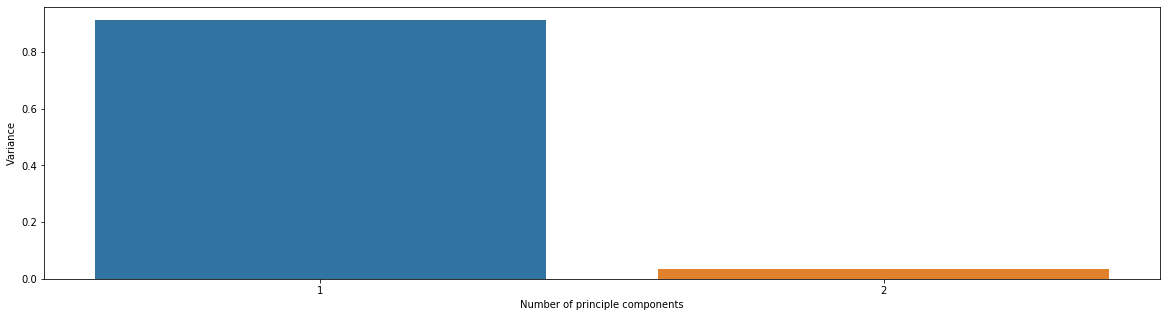

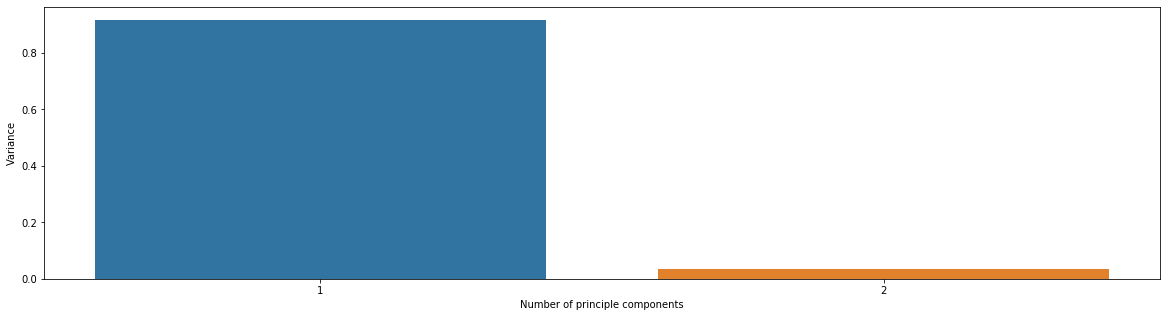

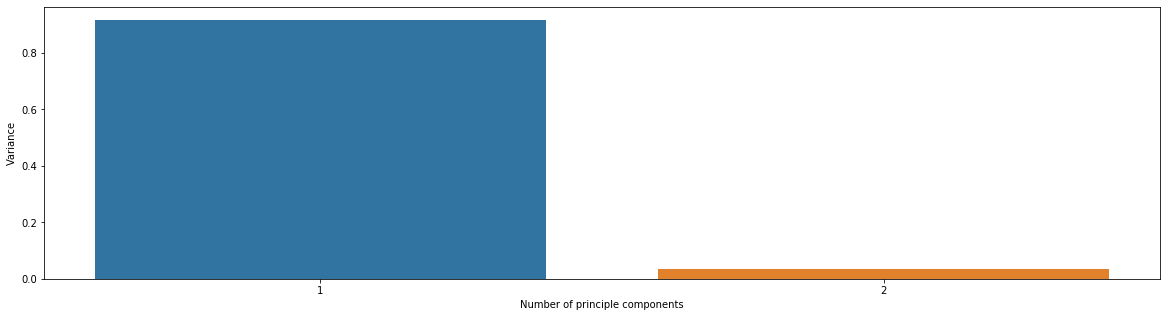

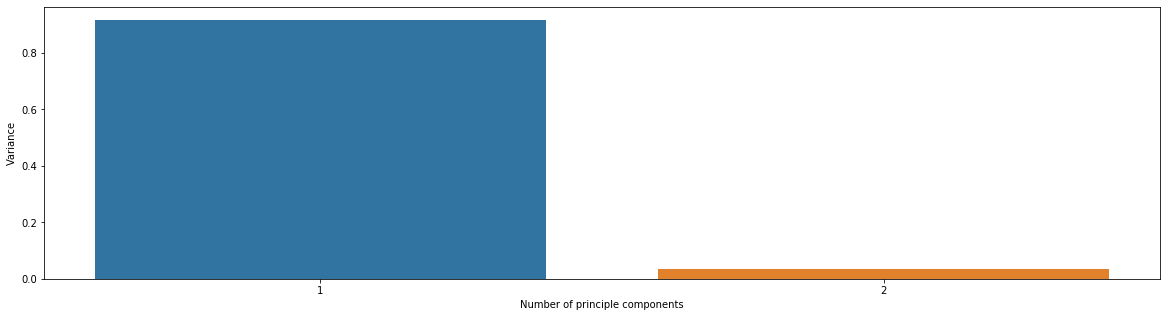

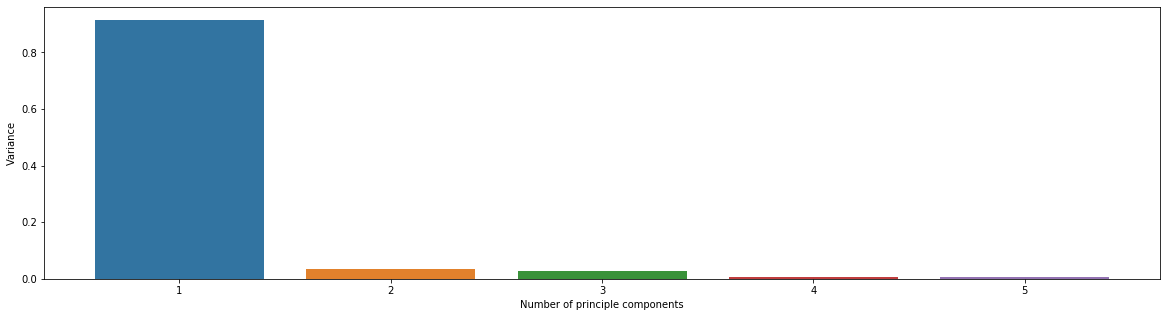

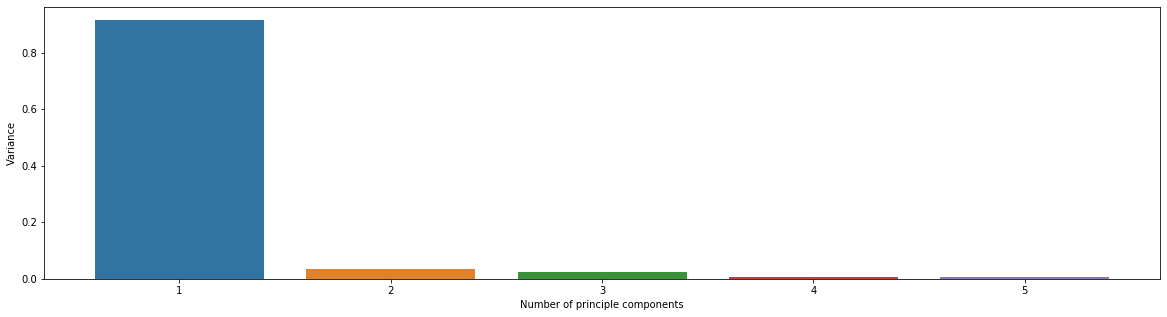

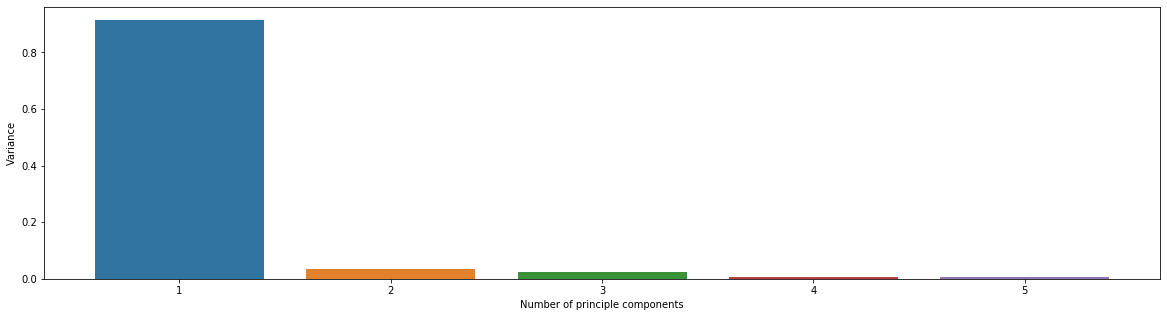

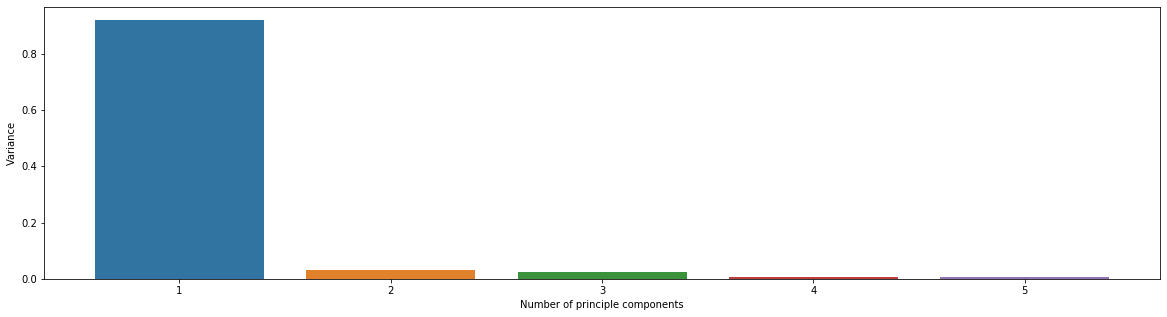

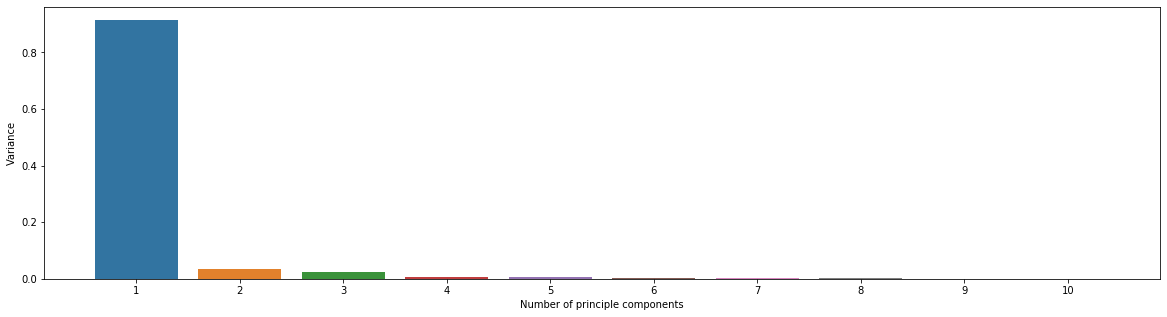

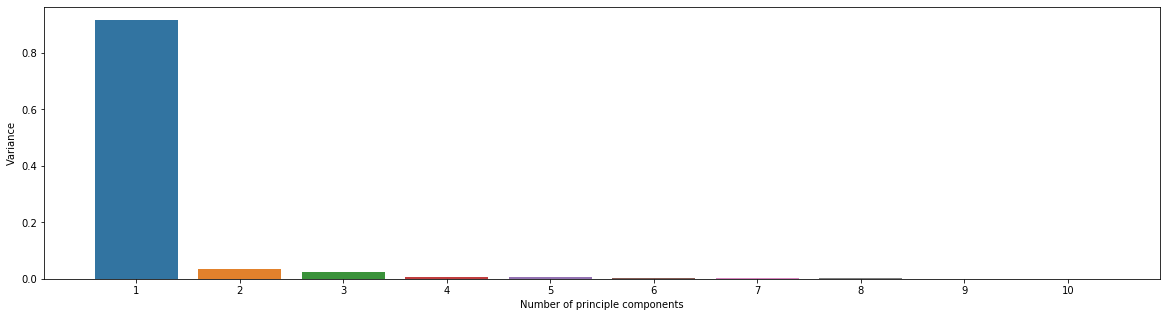

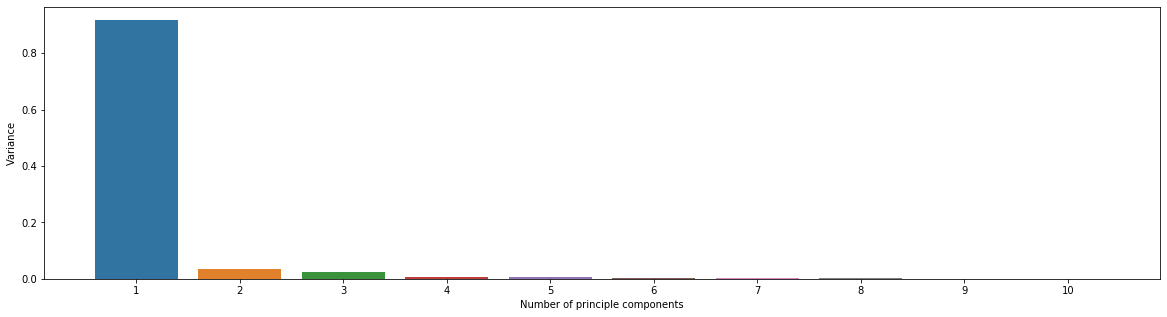

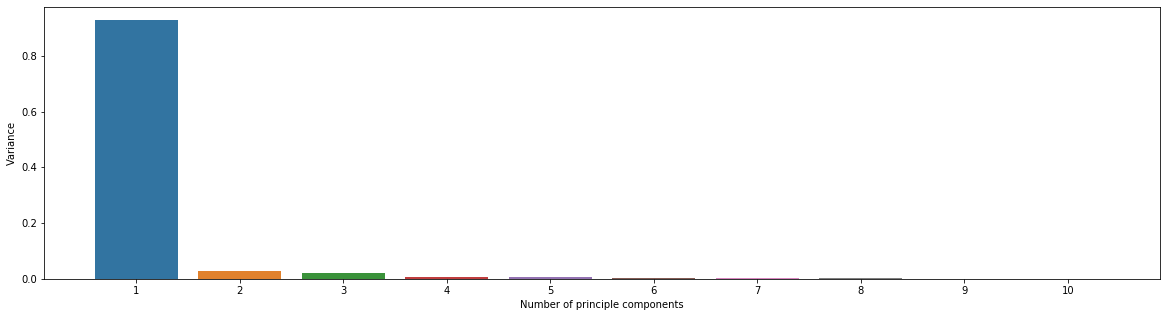

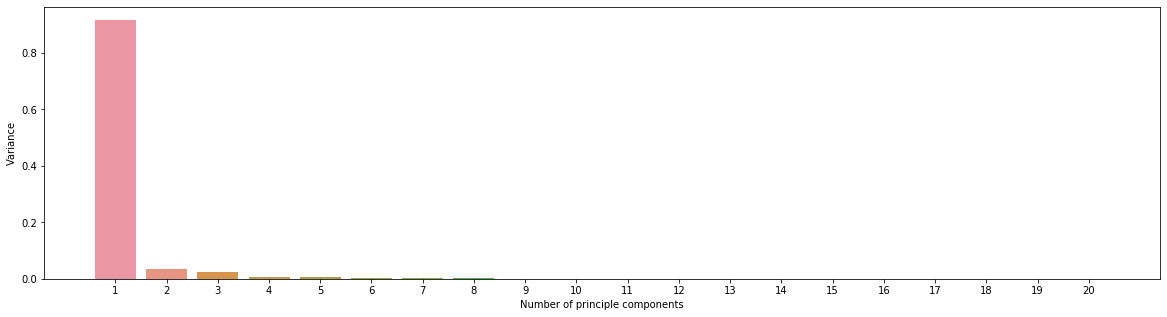

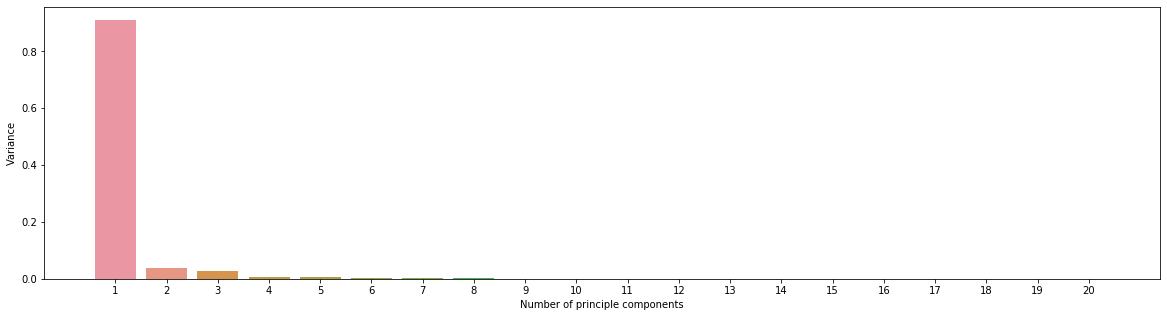

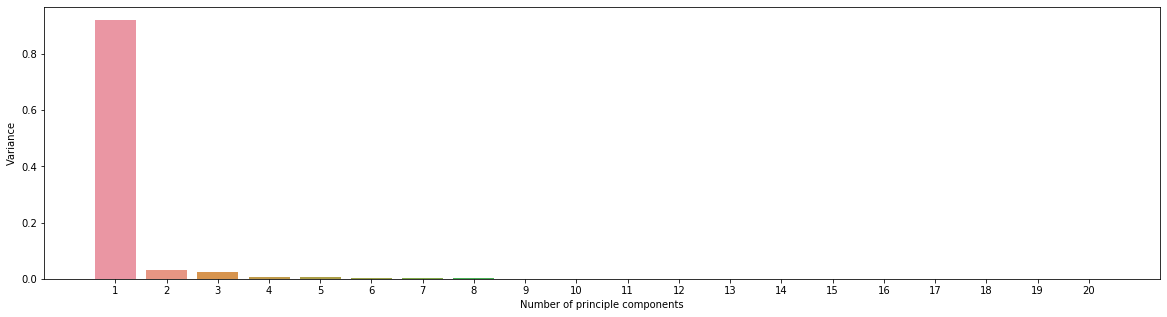

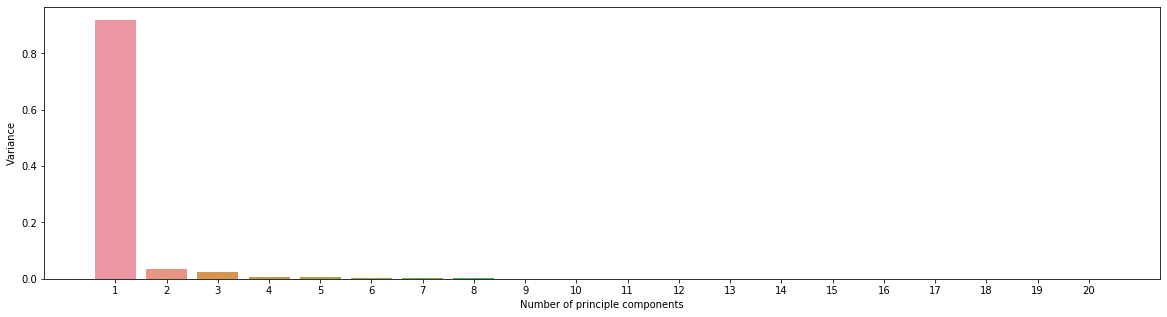

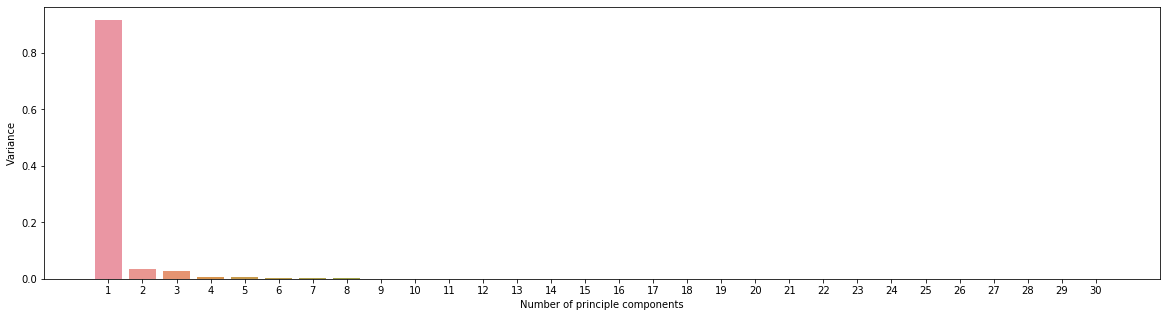

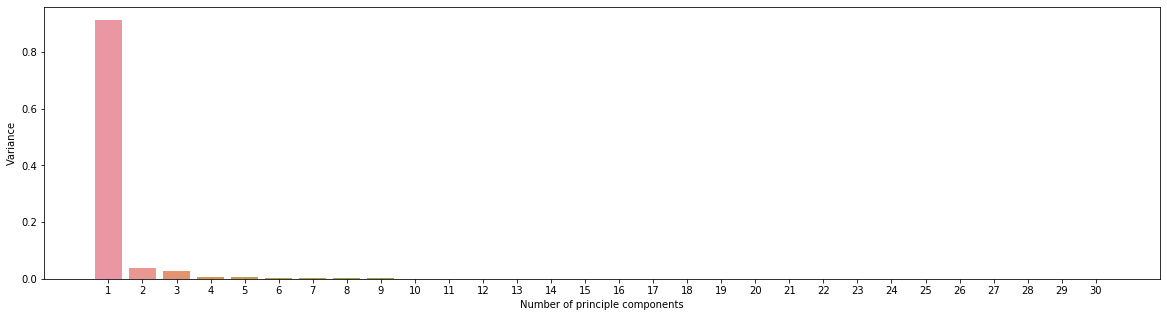

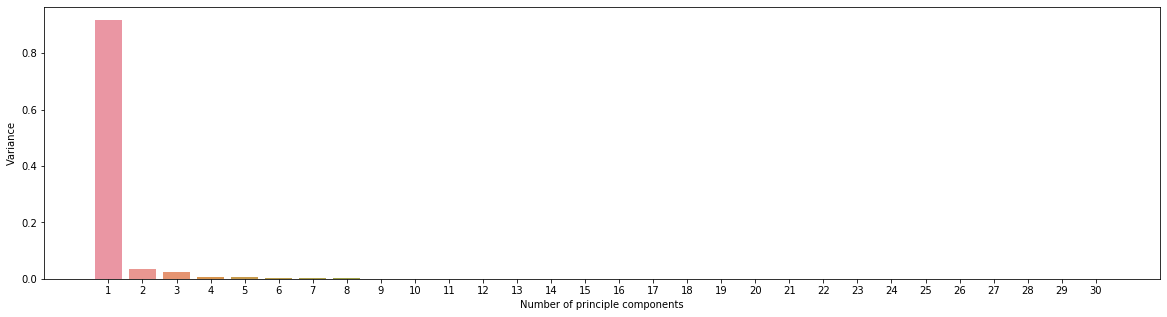

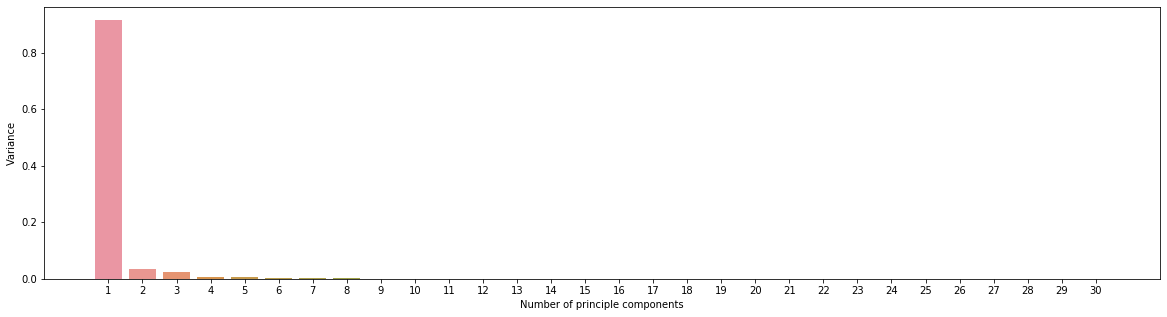

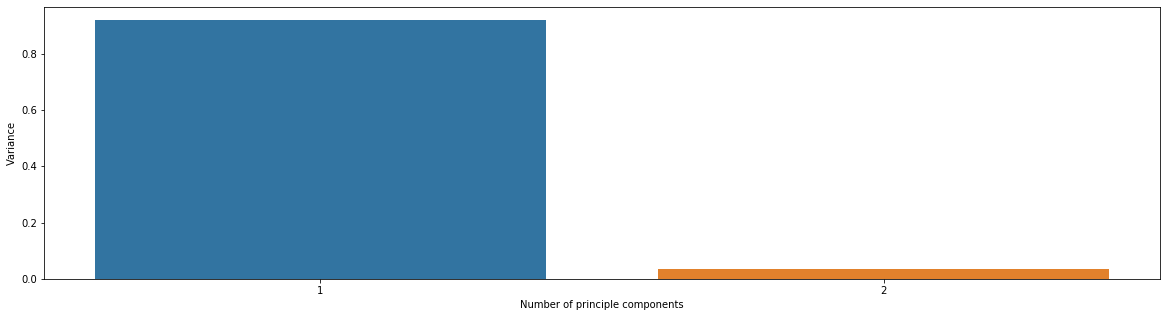

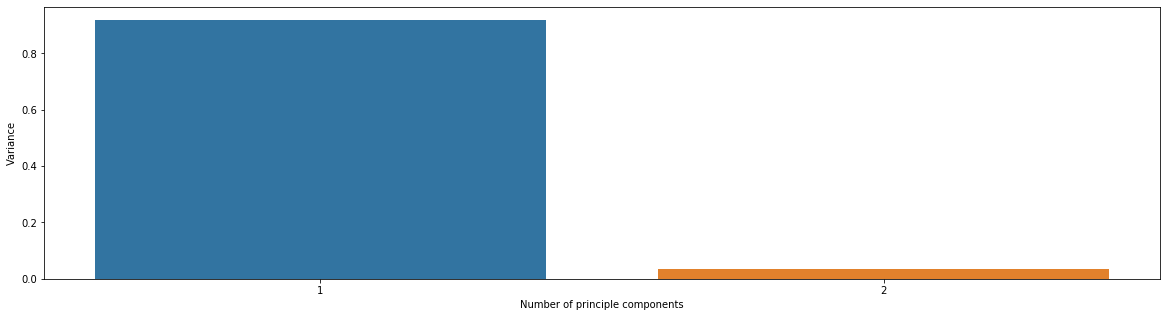

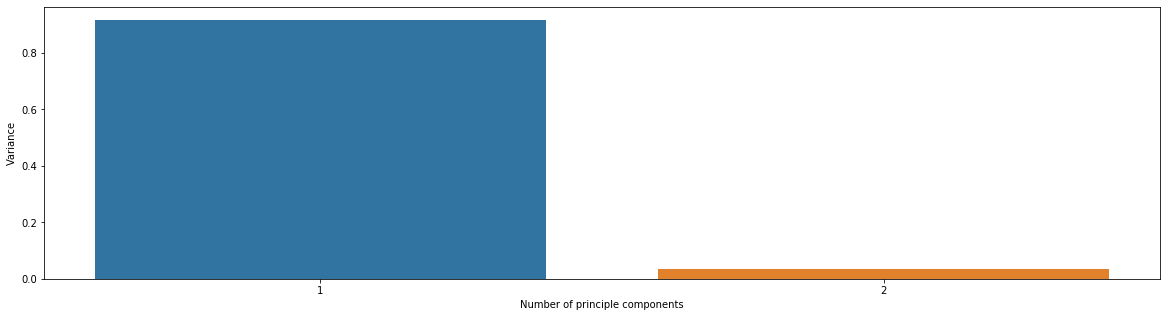

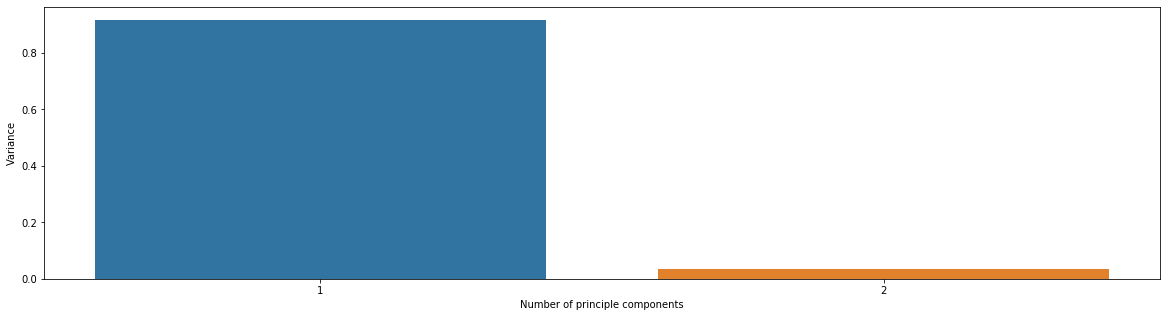

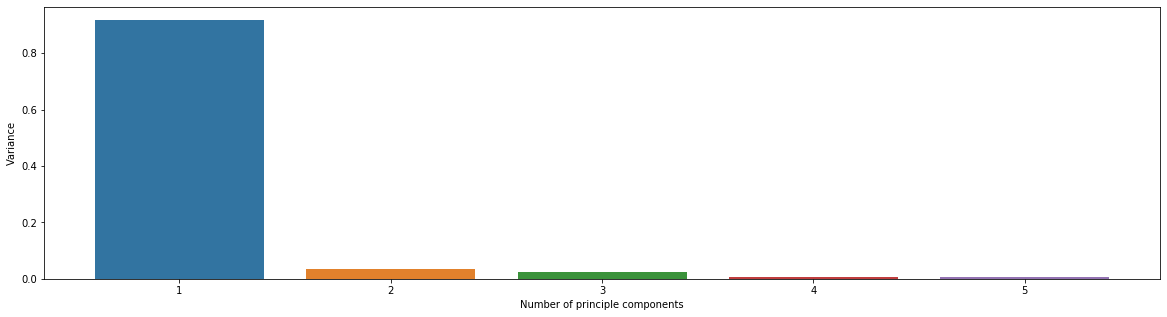

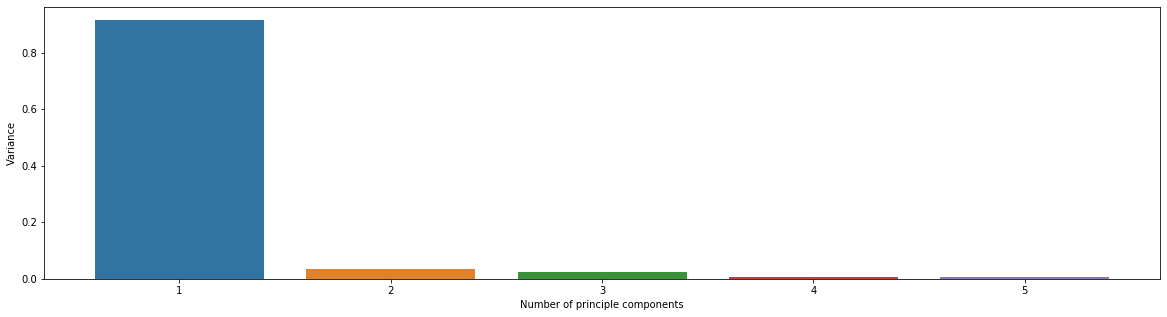

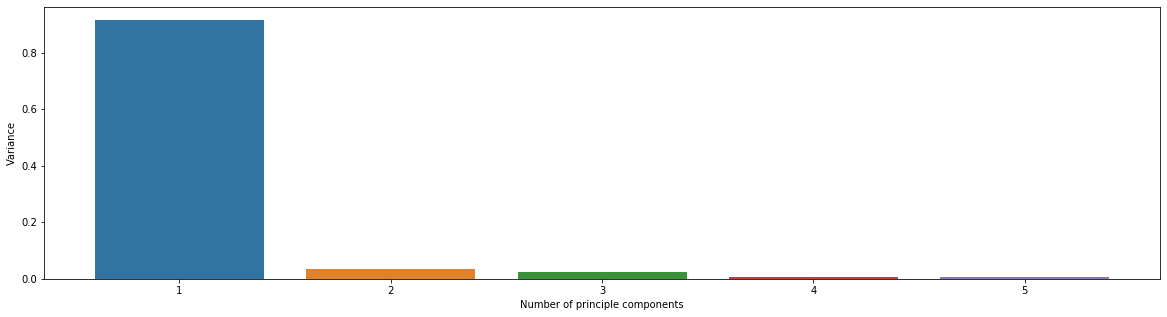

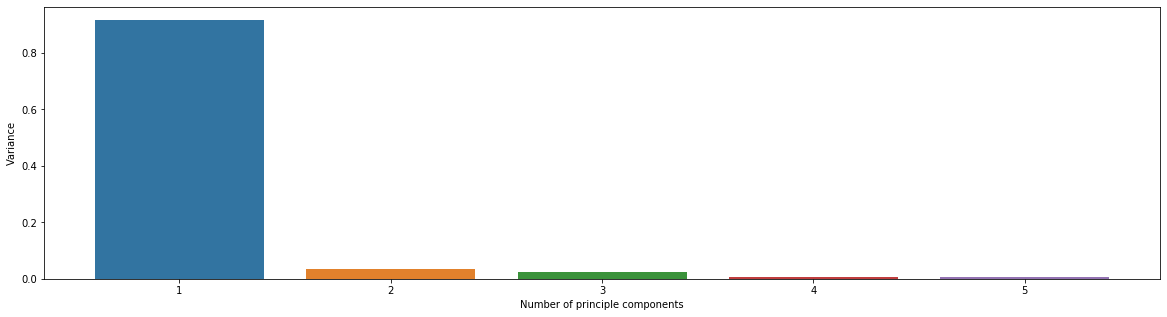

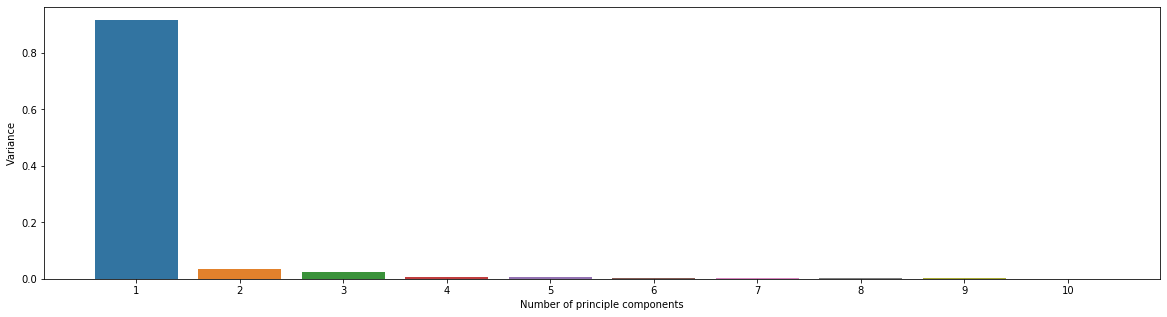

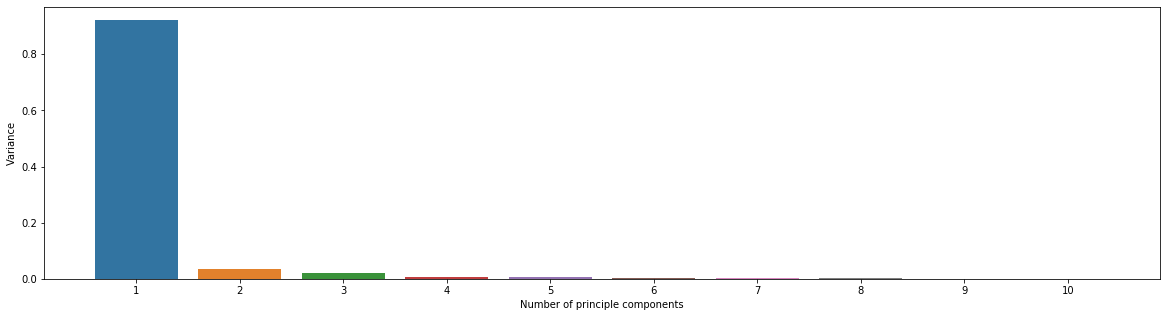

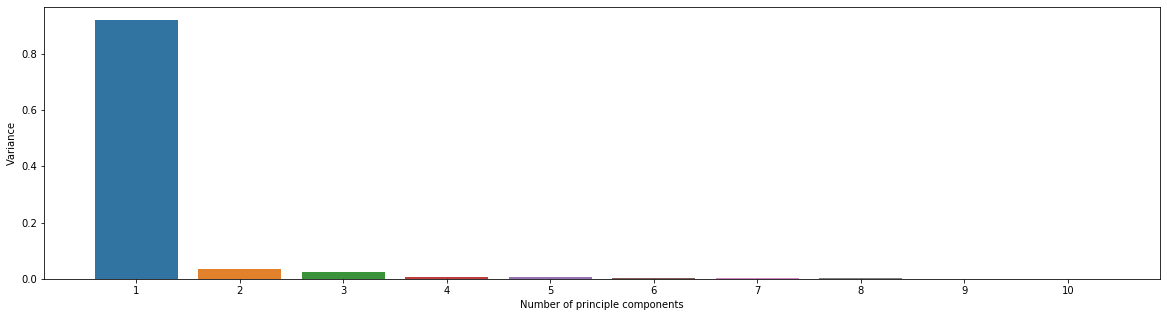

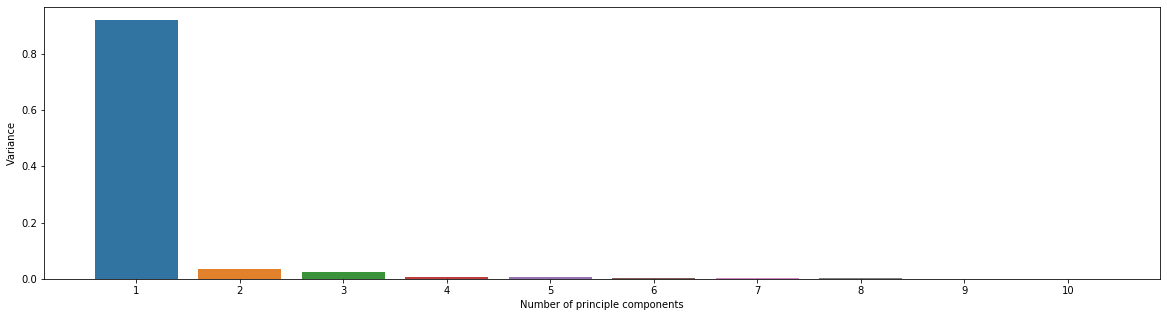

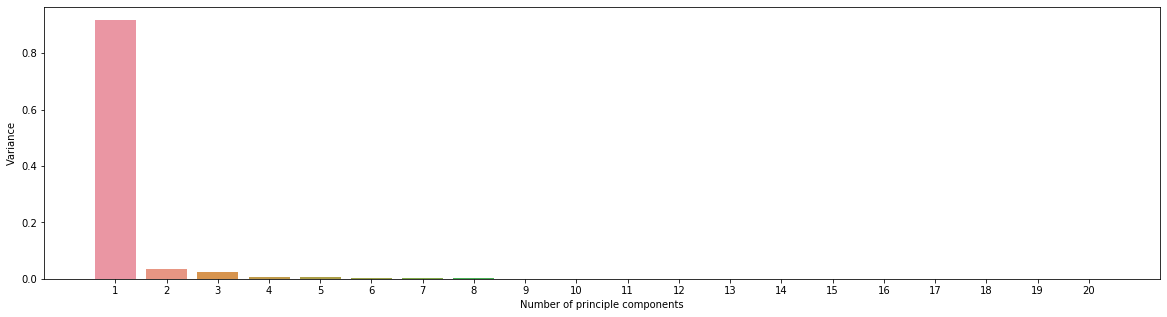

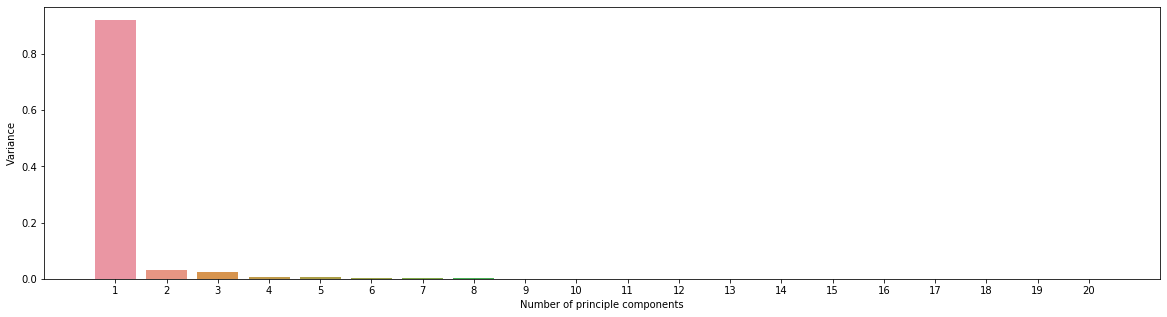

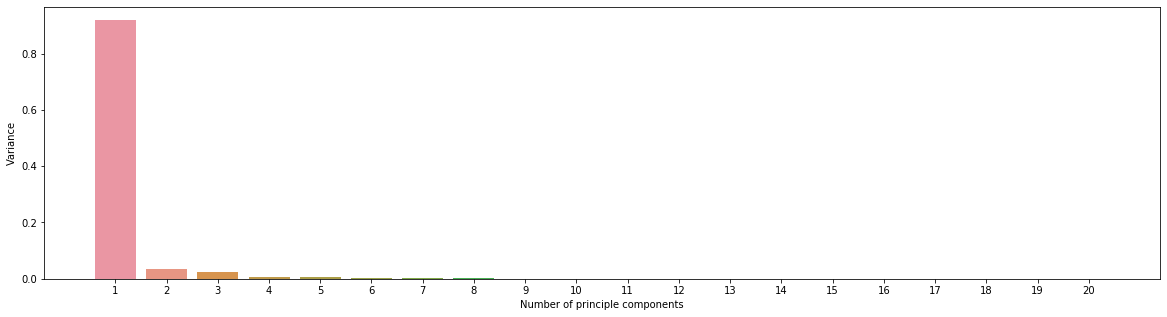

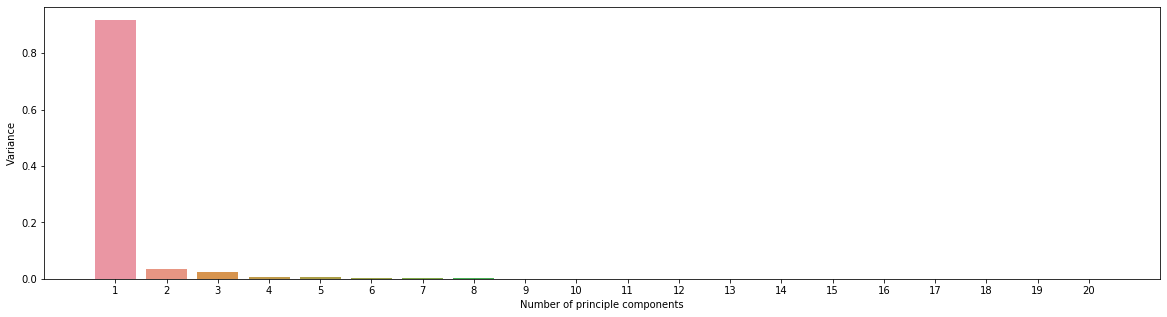

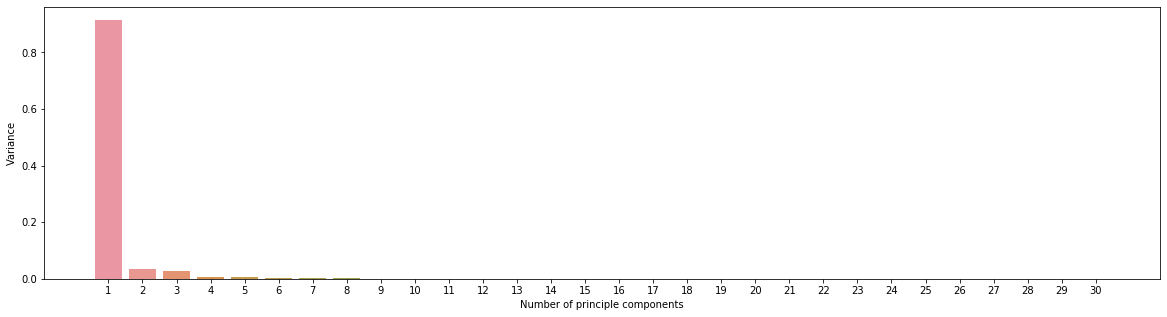

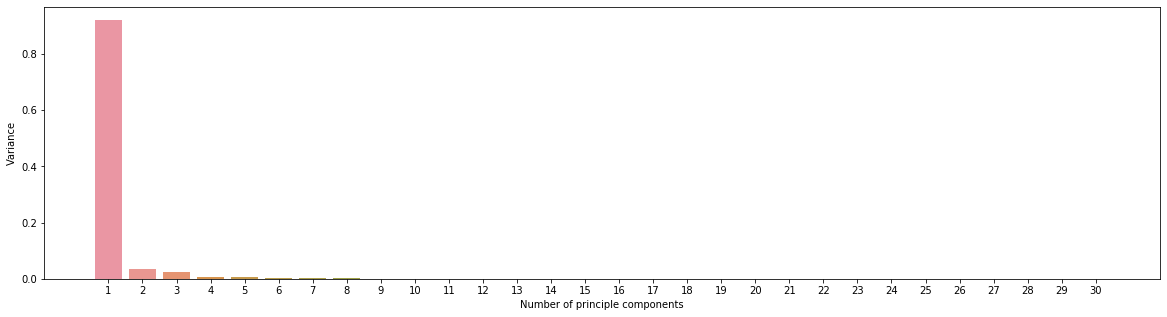

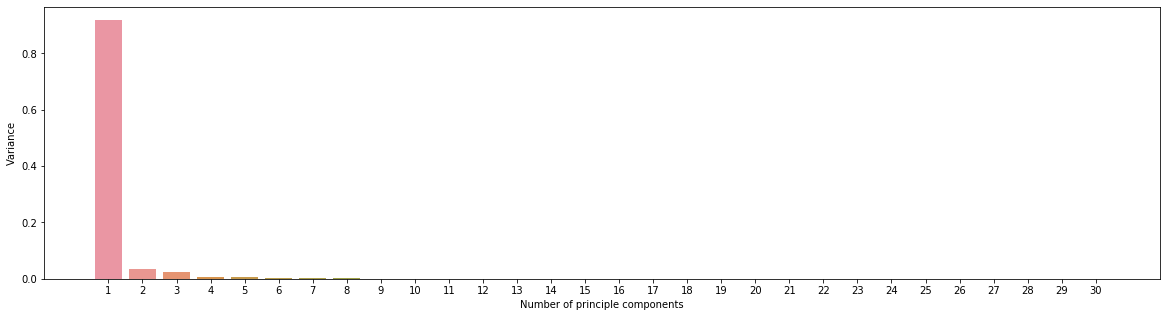

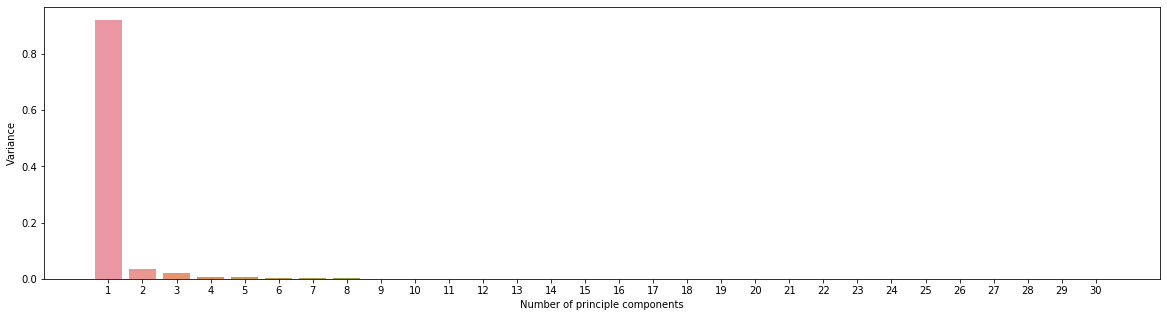

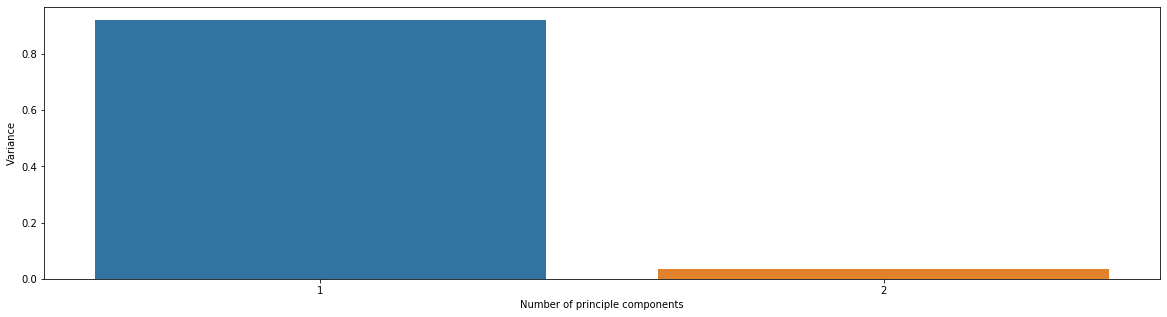

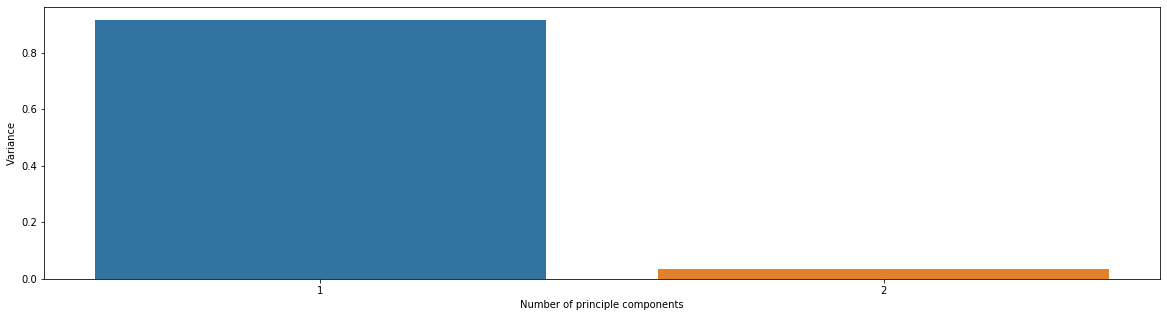

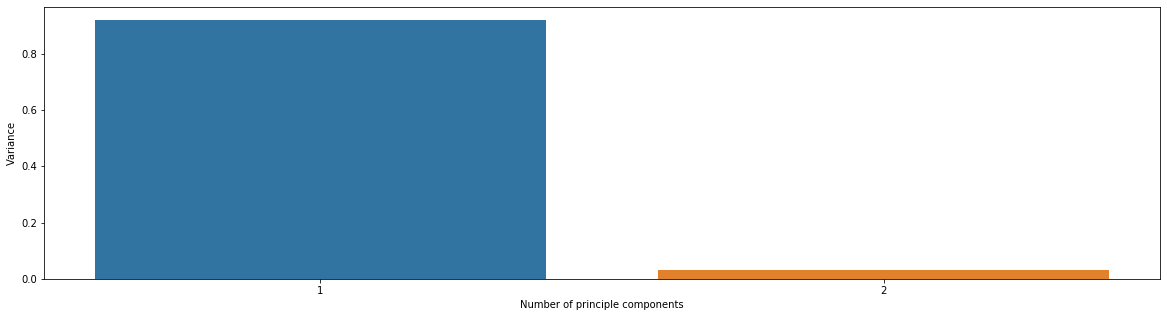

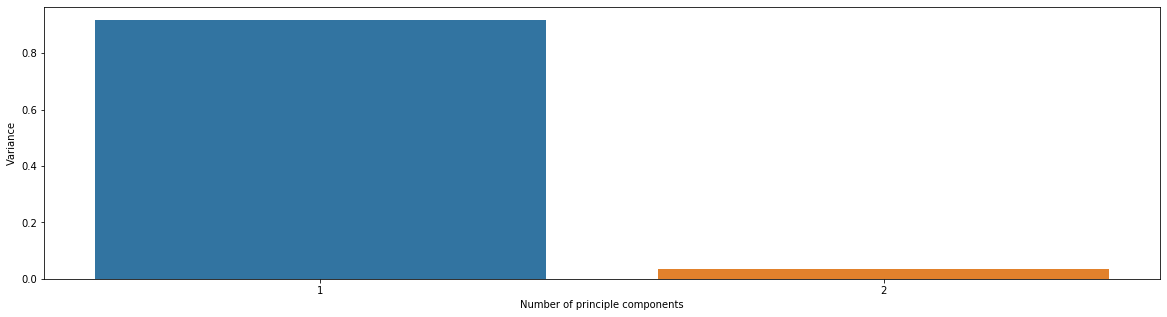

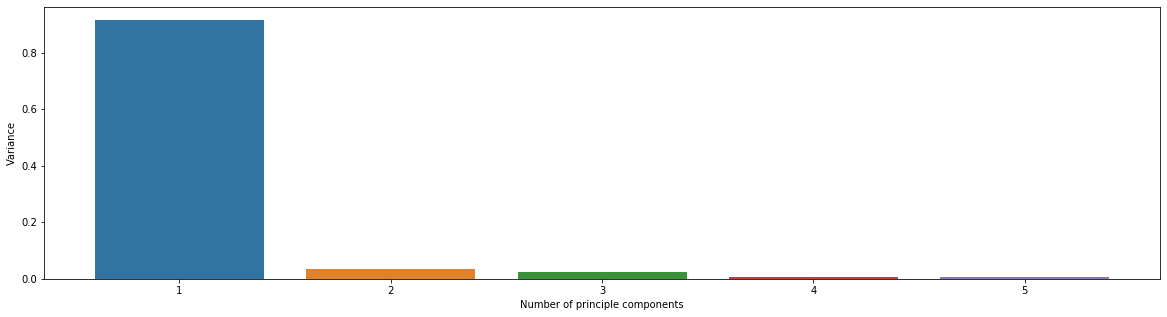

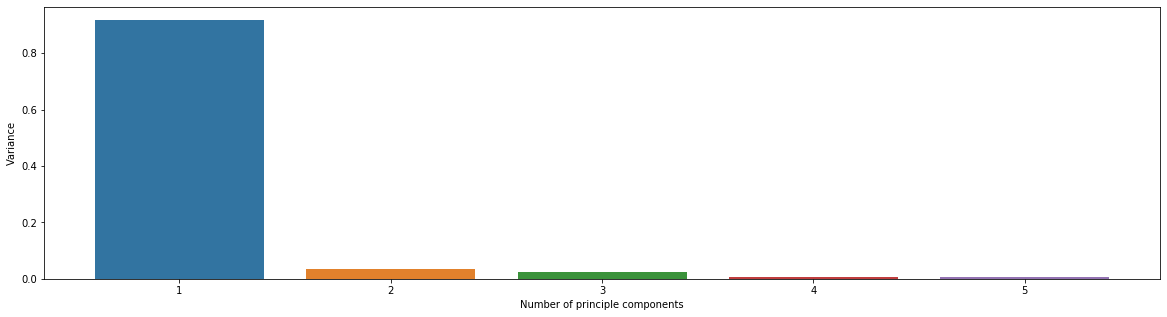

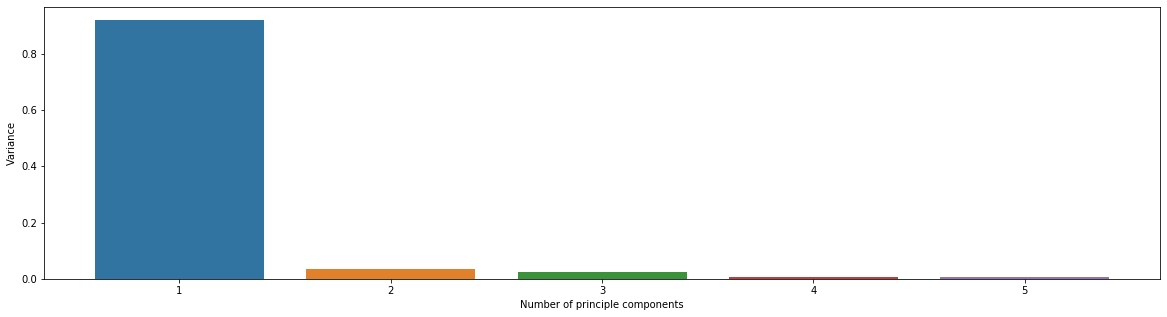

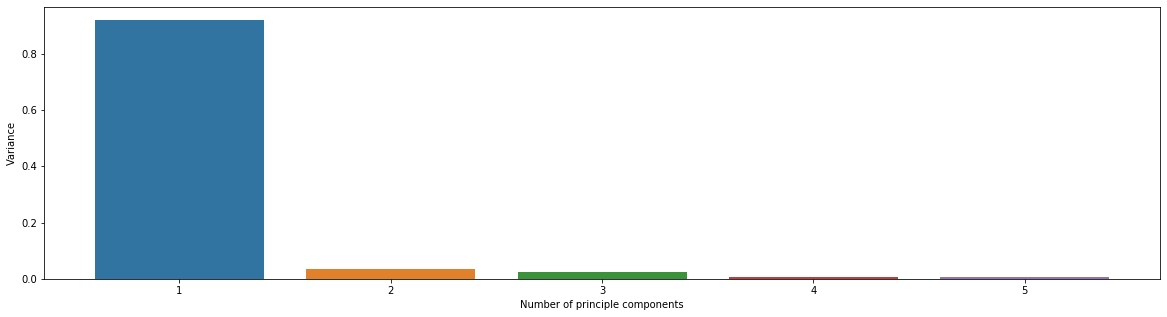

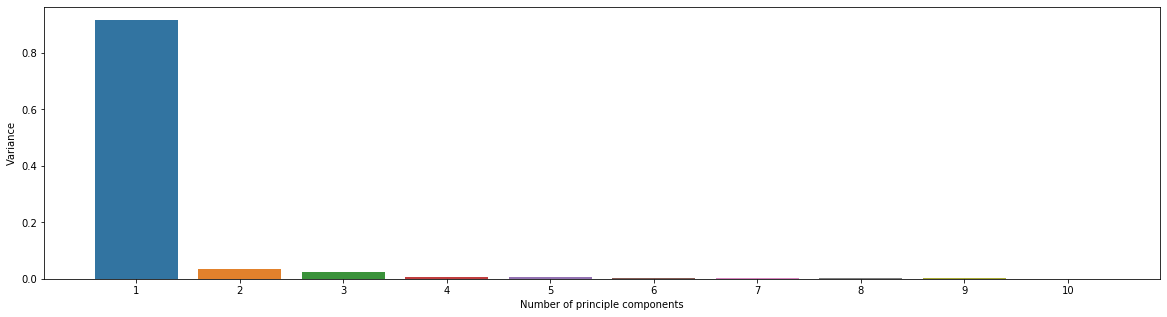

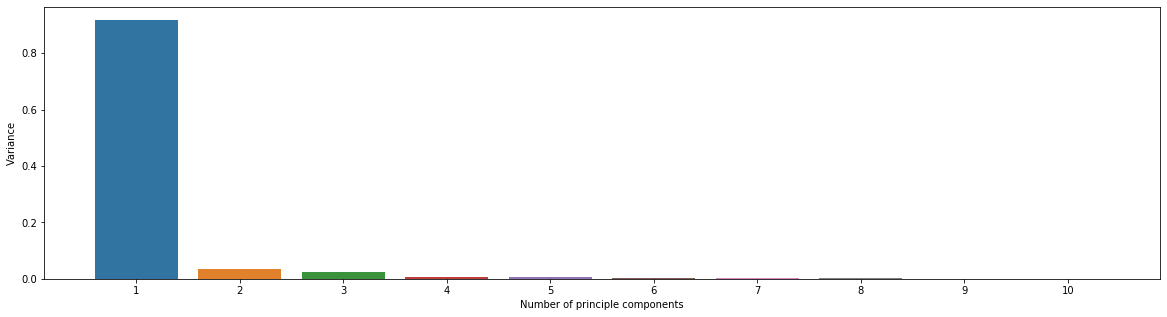

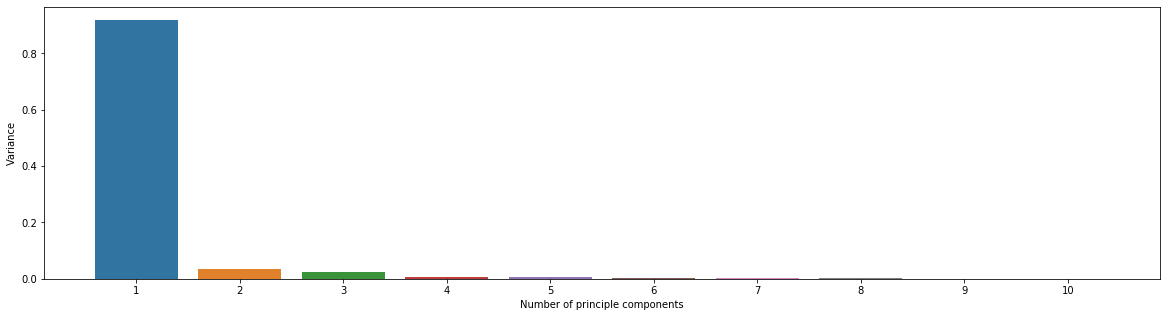

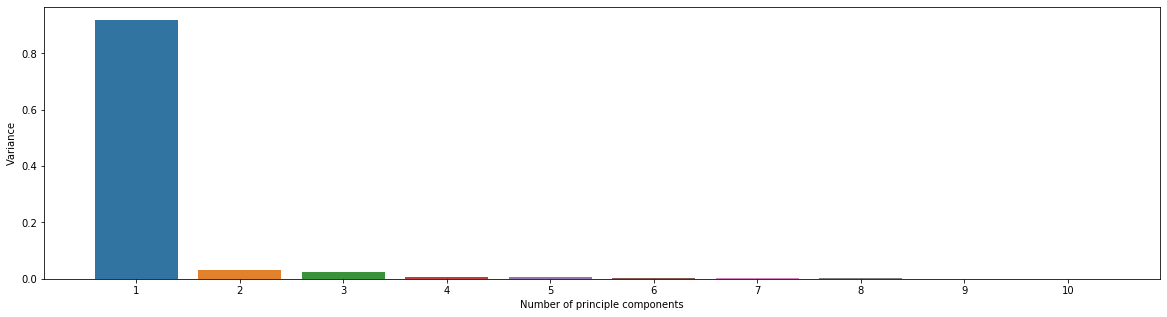

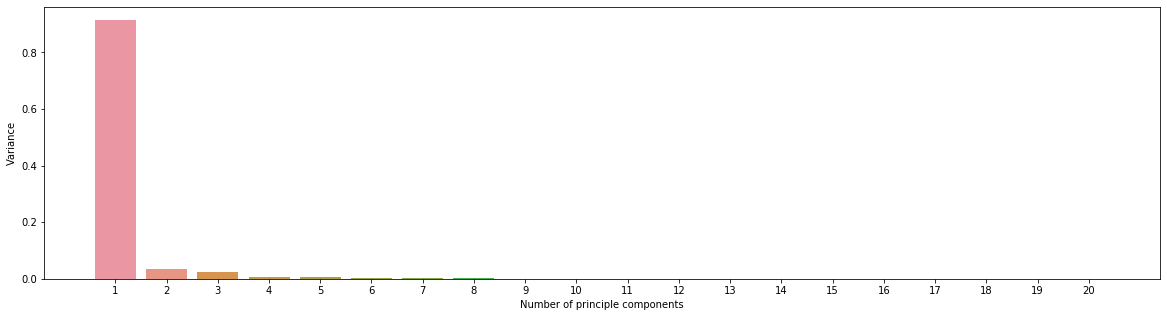

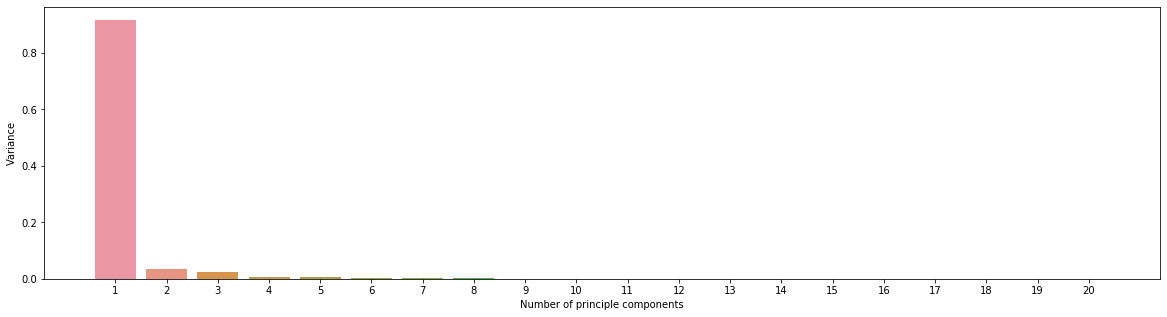

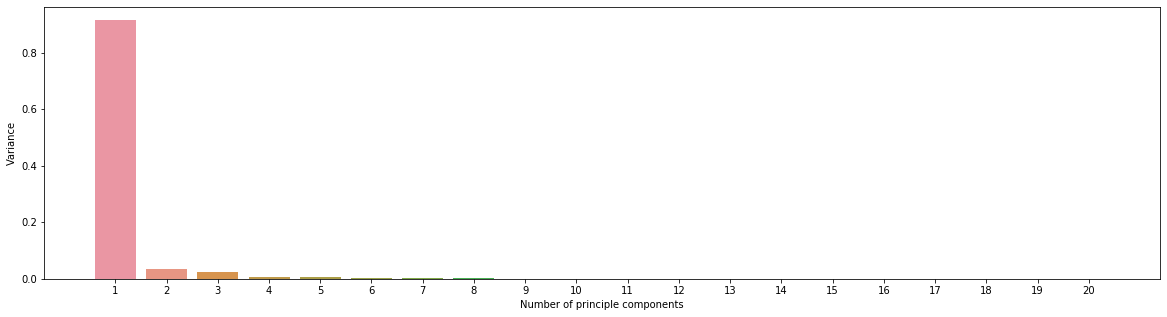

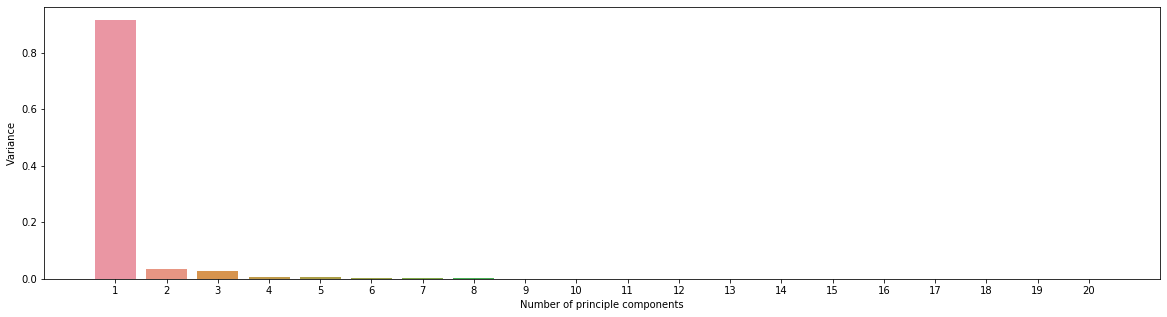

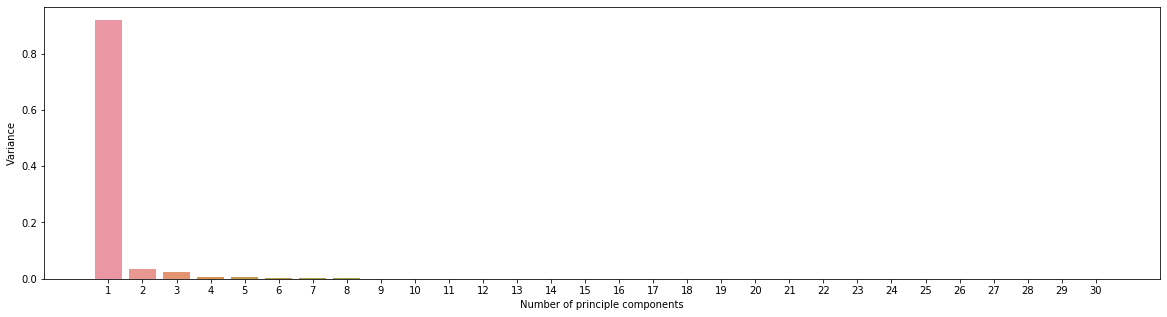

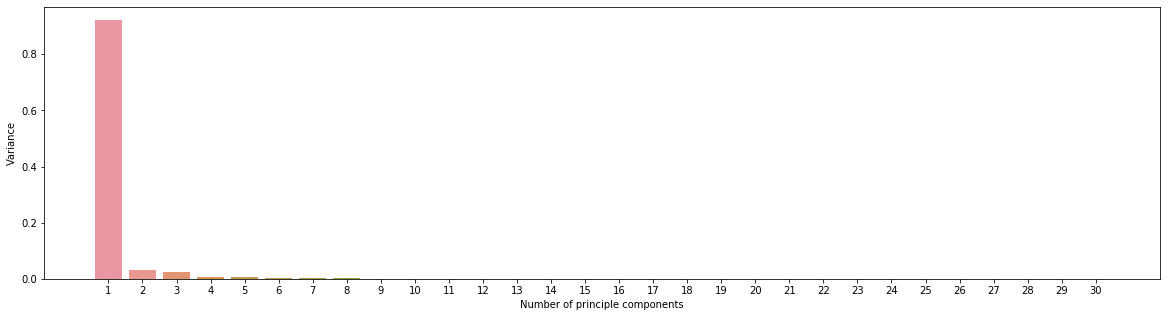

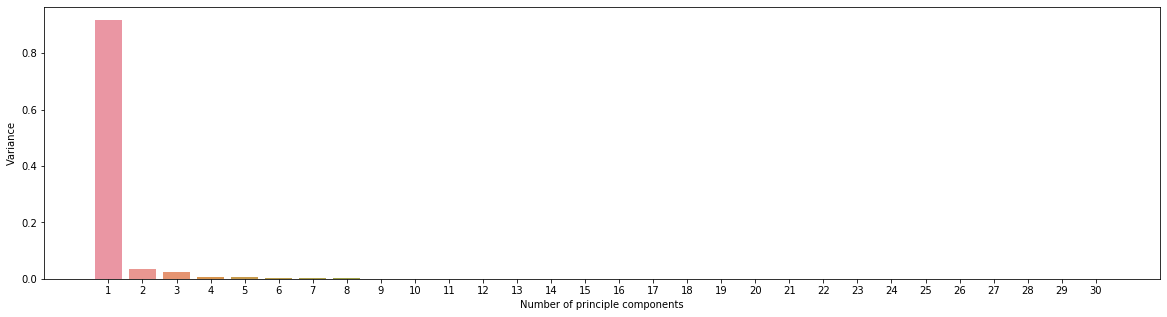

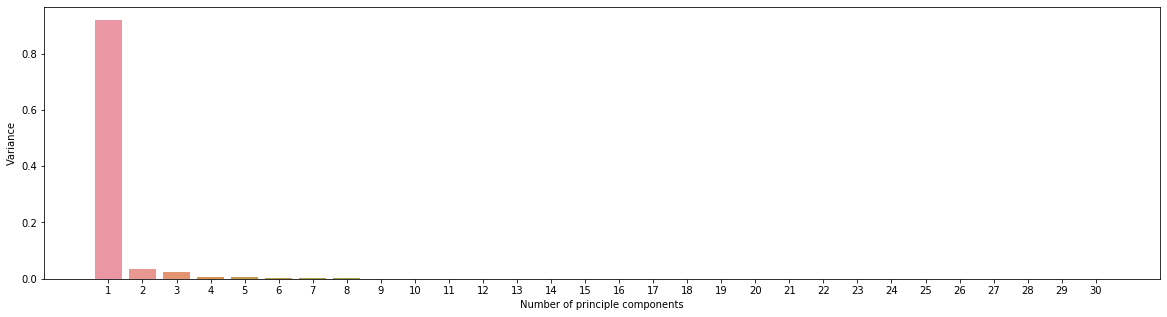

In [15]:
resultsDF = pd.DataFrame([], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')
for i in range (0,3):  
    for n in pcavalues:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)   
            X_train, X_test = preprocess_pca(X_train, X_test, n)
            param_grid = {'C': [0.1,0.5,0.7, 0.9,1,2,10,15,20], 'dual': [False]}
            SVC_GS = GridSearchCV(LinearSVC(),param_grid, cv = 10, refit=True, verbose=0, scoring = score, n_jobs=-1)
            SVC_GS.fit(X_train,y_train)   
            y_pred = SVC_GS.predict(X_test)
            resultsSVM1 = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsSVM1.insert(0,'SVMLinear RUN ' + str(i+1) + " n_components = " + str(n) + " scoring = " + score + " ")
            resultsSVM1.pop(4)
            resultsSVM1.insert(4, SVC_GS.score(X_train, y_train))
            resultsSVM1.insert(5, SVC_GS.score(X_test, y_test))


            SVM1_dataframe = pd.DataFrame([resultsSVM1], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([SVM1_dataframe])
            print("The best estimator for RUN " + str(i+1) + " n_components = " + str(n) + "scoring = " + score + " " + str(SVC_GS.best_estimator_))
            print("The Confusion matrix for RUN" + str(i+1) + " n_components = " + str(n) + " scoring = " + score + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))
    

In [16]:
print('The parameters combination that would give best accuracy is : ')
print(SVC_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'C': 0.1, 'dual': False}


In [17]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 n_components = 2 scoring = precision,0.478970,0.484402,0.424684,0.408935,0.413495
SVMLinear RUN 1 n_components = 2 scoring = recall,0.498307,0.498778,0.425312,0.789600,0.775578
SVMLinear RUN 1 n_components = 2 scoring = accuracy,0.508496,0.506450,0.442626,0.457426,0.457784
SVMLinear RUN 1 n_components = 2 scoring = f1,0.527576,0.518596,0.445982,0.539382,0.563656
SVMLinear RUN 1 n_components = 5 scoring = precision,0.550376,0.535935,0.468405,0.428876,0.438031
SVMLinear RUN 1 n_components = 5 scoring = recall,0.560850,0.546704,0.475143,0.820350,0.816949
SVMLinear RUN 1 n_components = 5 scoring = accuracy,0.553492,0.536974,0.472992,0.475908,0.497361
SVMLinear RUN 1 n_components = 5 scoring = f1,0.521876,0.516179,0.443732,0.564915,0.536199
SVMLinear RUN 1 n_components = 10 scoring = precision,0.561717,0.542880,0.460759,0.437925,0.419032


# SVM Non-Linear     

Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    1.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    1.6s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    1.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    1.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    1.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    2.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  19 out of  28 | elapsed:    2.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | e

The best estimator for RUN 1 n_components = 2 scoring = precision SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 2 scoring = precision is 

[[[  0 303]
  [  0 455]]

 [[455   0]
  [303   0]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  19 out of  28 | elapsed:    1.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    2.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  23 out of  28 | elapsed:    2.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  28 | elapsed:    3.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    4.3s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

The best estimator for RUN 1 n_components = 2 scoring = recall SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 2 scoring = recall is 

[[[  0 306]
  [  0 452]]

 [[452   0]
  [306   0]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0831s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 2 scoring = accuracy SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 2 scoring = accuracy is 

[[[  0 309]
  [  0 449]]

 [[449   0]
  [309   0]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0721s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 2 scoring = f1 SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 2 scoring = f1 is 

[[[  0 323]
  [  0 435]]

 [[435   0]
  [323   0]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1171s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 5 scoring = precision SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 5 scoring = precision is 

[[[  8 303]
  [  4 443]]

 [[443   4]
  [303   8]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1102s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 5 scoring = recall SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 5 scoring = recall is 

[[[ 16 294]
  [ 10 438]]

 [[438  10]
  [294  16]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1211s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 5 scoring = accuracy SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 5 scoring = accuracy is 

[[[ 10 290]
  [  8 450]]

 [[450   8]
  [290  10]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1281s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 5 scoring = f1 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 5 scoring = f1 is 

[[[ 16 291]
  [  5 446]]

 [[446   5]
  [291  16]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1421s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 10 scoring = precision SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 10 scoring = precision is 

[[[ 22 287]
  [ 11 438]]

 [[438  11]
  [287  22]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1371s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 10 scoring = recall SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 10 scoring = recall is 

[[[ 14 312]
  [ 12 420]]

 [[420  12]
  [312  14]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1311s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 10 scoring = accuracy SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 10 scoring = accuracy is 

[[[ 21 274]
  [ 14 449]]

 [[449  14]
  [274  21]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1321s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 10 scoring = f1 SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 10 scoring = f1 is 

[[[ 20 290]
  [  9 439]]

 [[439   9]
  [290  20]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1734s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 20 scoring = precision SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 20 scoring = precision is 

[[[ 13 284]
  [ 12 449]]

 [[449  12]
  [284  13]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1601s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 20 scoring = recall SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 20 scoring = recall is 

[[[ 27 292]
  [ 18 421]]

 [[421  18]
  [292  27]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1652s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 20 scoring = accuracy SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 20 scoring = accuracy is 

[[[ 23 271]
  [ 28 436]]

 [[436  28]
  [271  23]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1752s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  28 |

The best estimator for RUN 1 n_components = 20 scoring = f1 SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 20 scoring = f1 is 

[[[ 21 291]
  [ 22 424]]

 [[424  22]
  [291  21]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  19 out of  28 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | e

The best estimator for RUN 1 n_components = 30 scoring = precision SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 30 scoring = precision is 

[[[ 21 268]
  [ 14 455]]

 [[455  14]
  [268  21]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  19 out of  28 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | e

The best estimator for RUN 1 n_components = 30 scoring = recall SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 30 scoring = recall is 

[[[ 25 267]
  [ 23 443]]

 [[443  23]
  [267  25]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  19 out of  28 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | e

The best estimator for RUN 1 n_components = 30 scoring = accuracy SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 30 scoring = accuracy is 

[[[ 24 270]
  [ 19 445]]

 [[445  19]
  [270  24]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  13 out of  28 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  15 out of  28 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  28 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  19 out of  28 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | e

The best estimator for RUN 1 n_components = 30 scoring = f1 SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 n_components = 30 scoring = f1 is 

[[[ 29 274]
  [ 16 439]]

 [[439  16]
  [274  29]]]
None


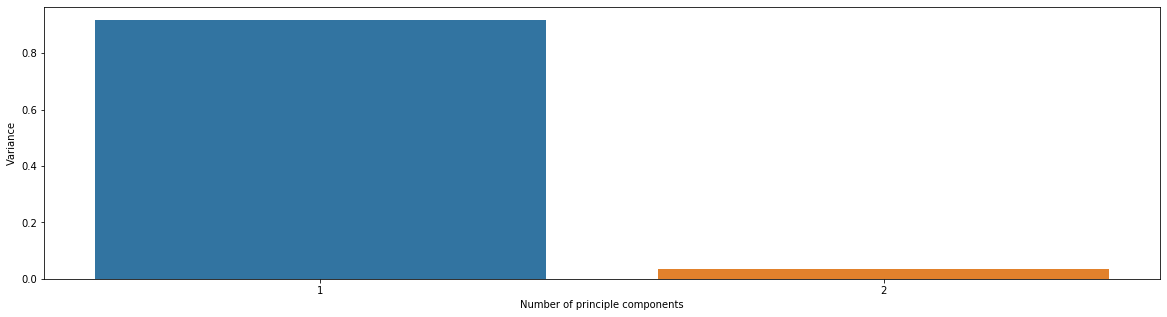

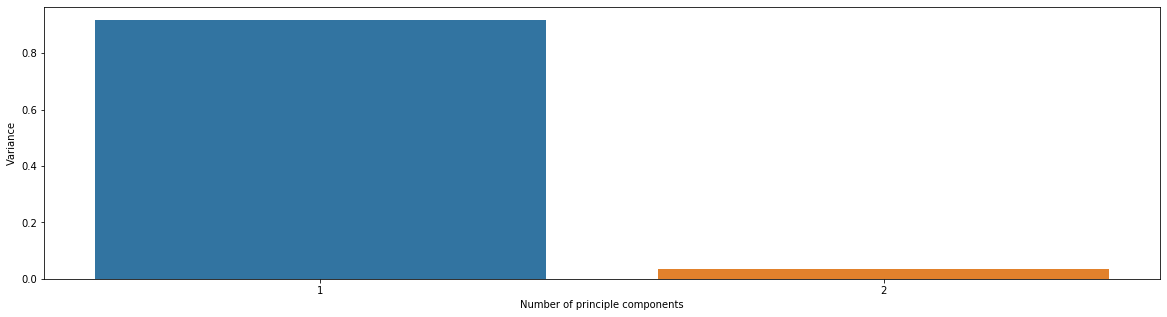

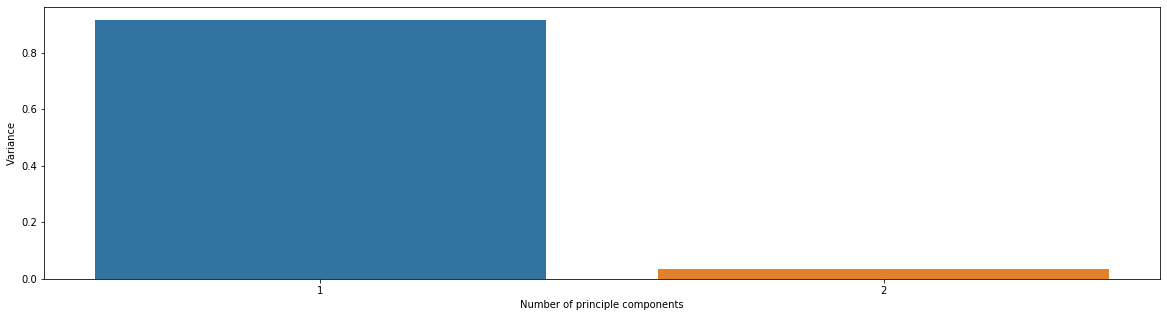

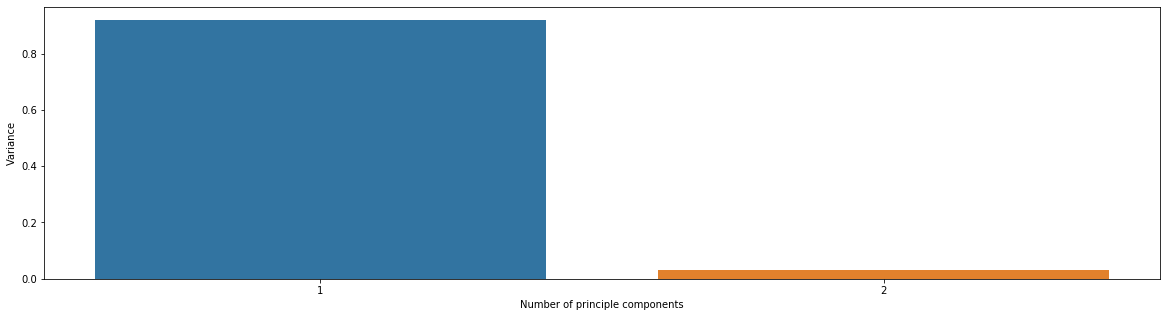

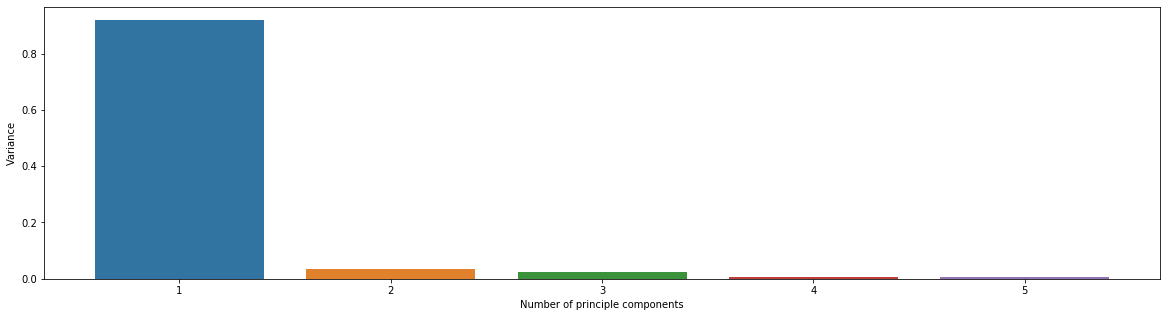

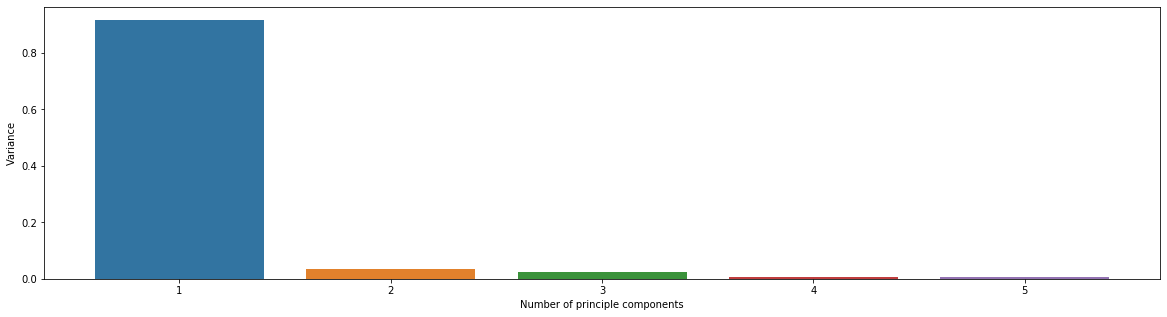

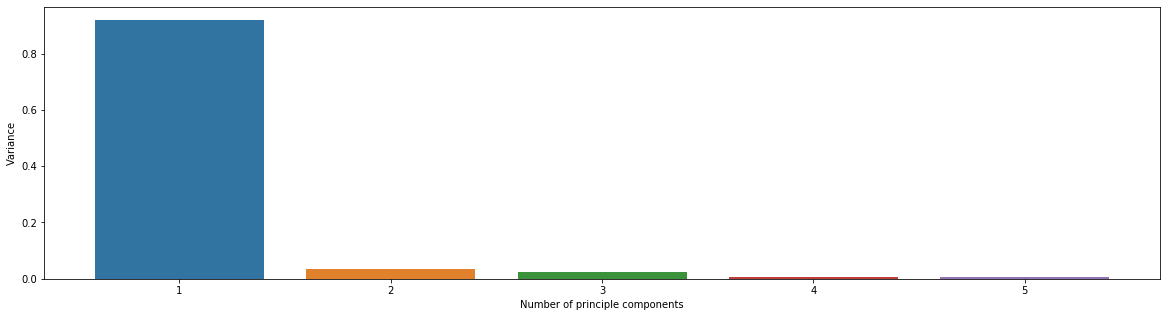

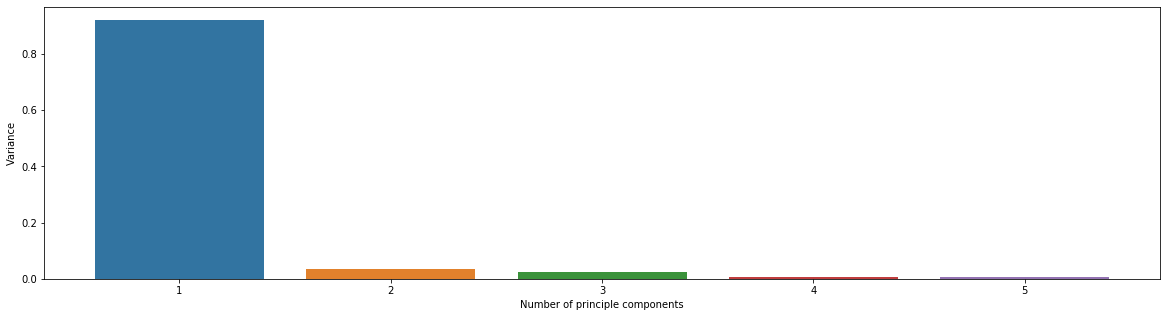

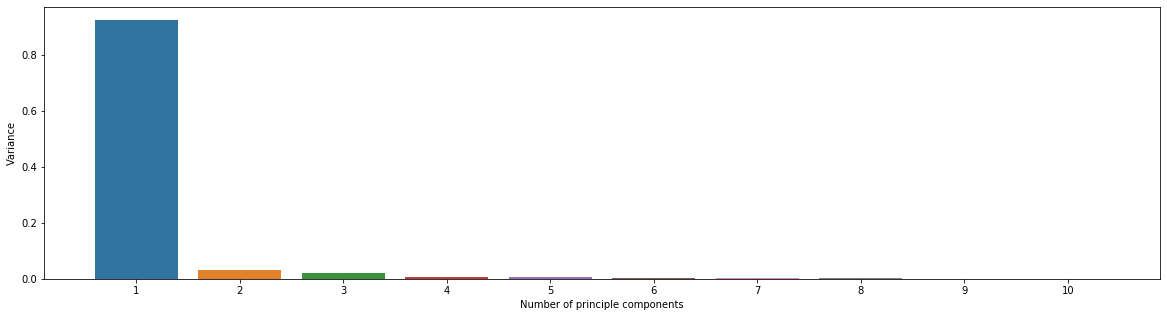

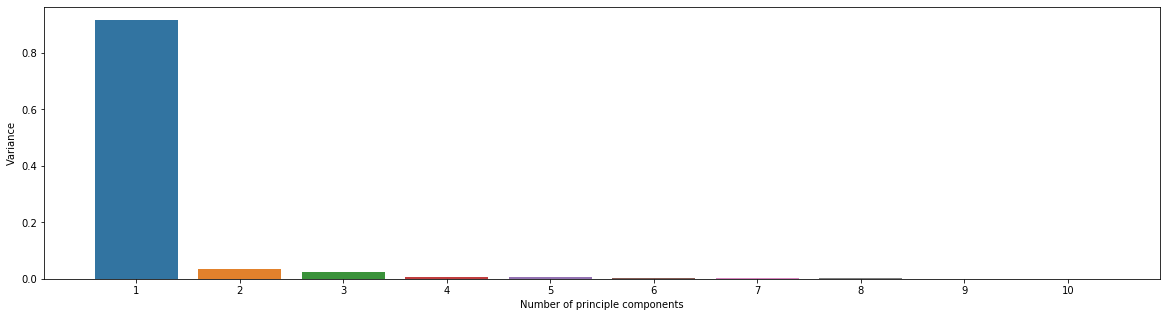

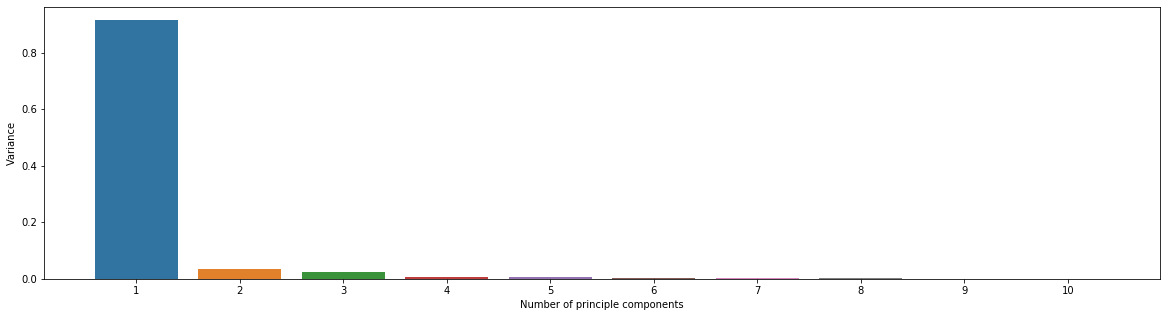

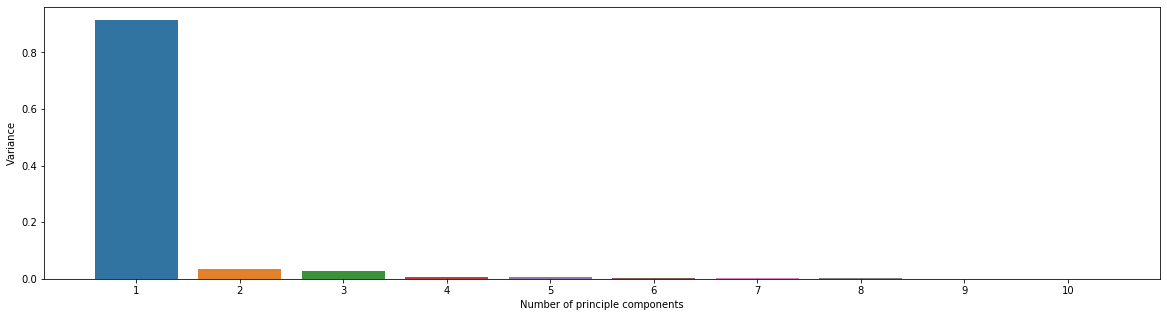

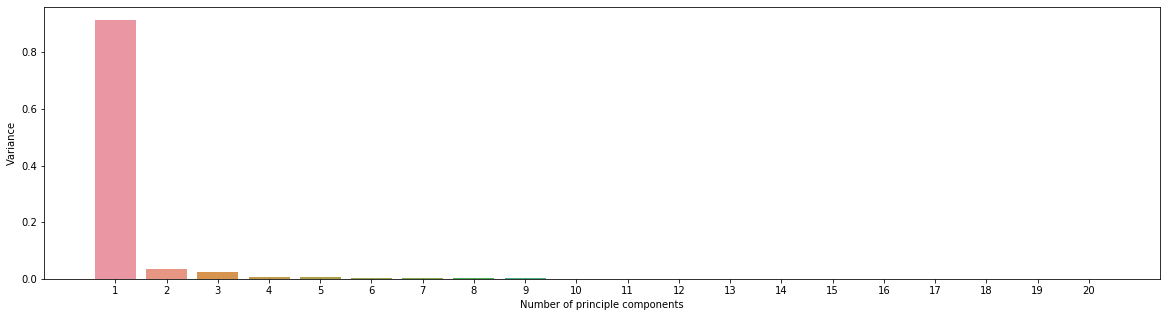

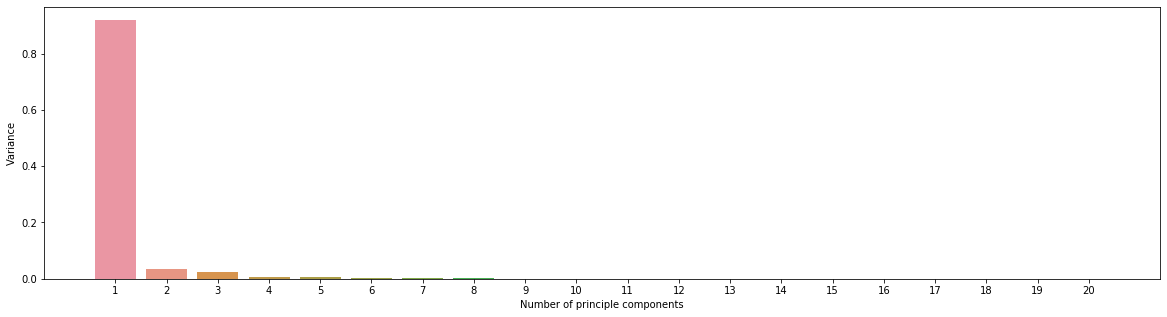

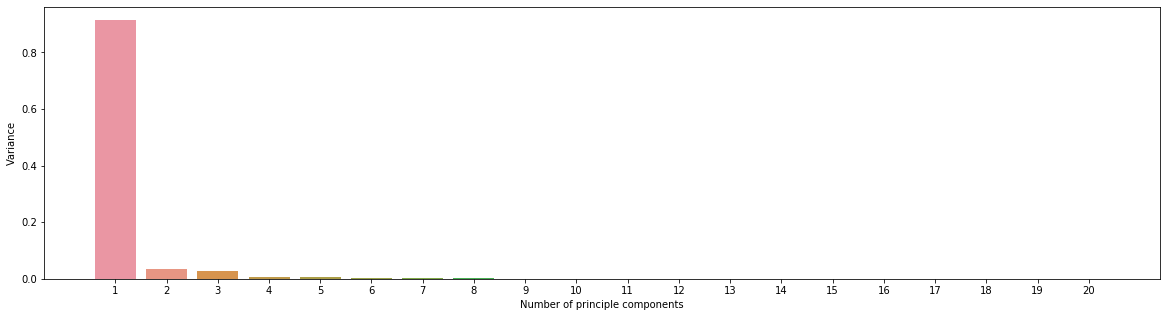

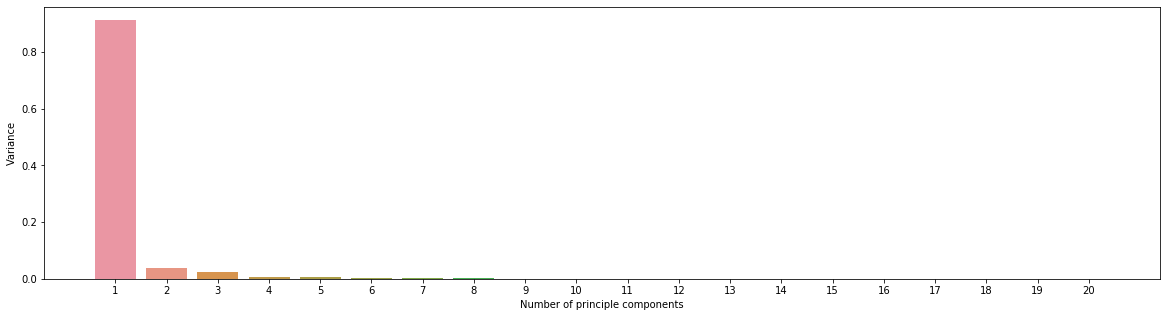

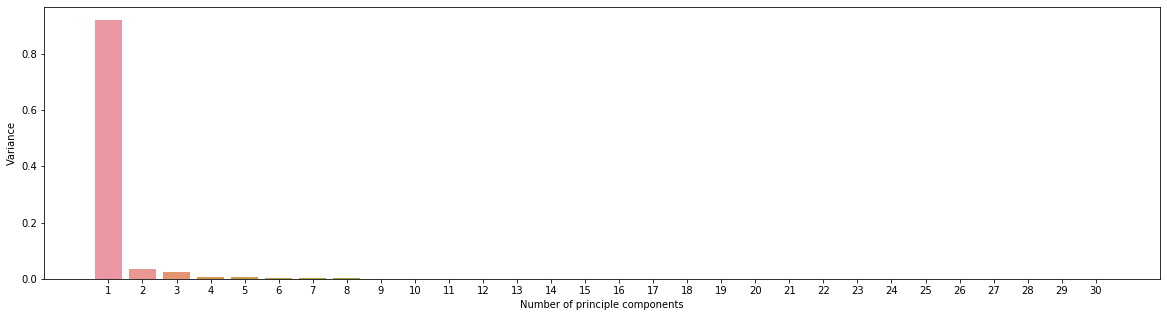

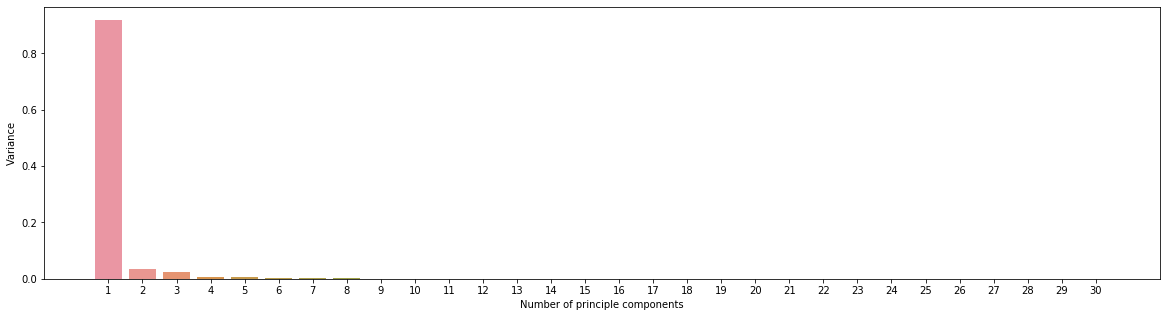

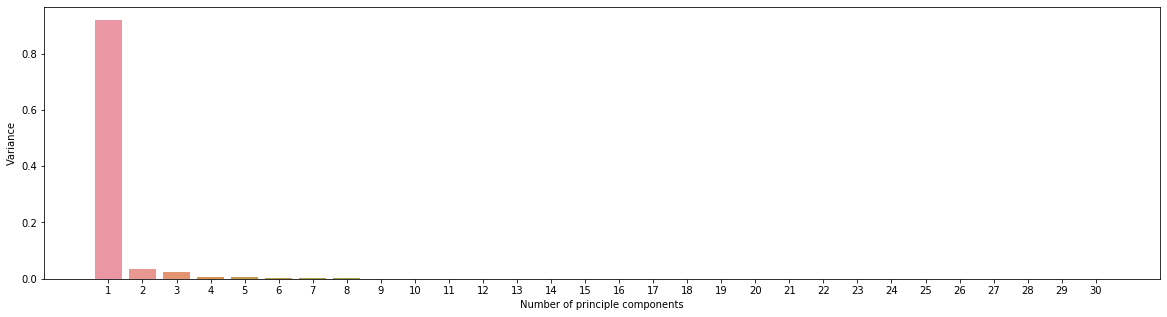

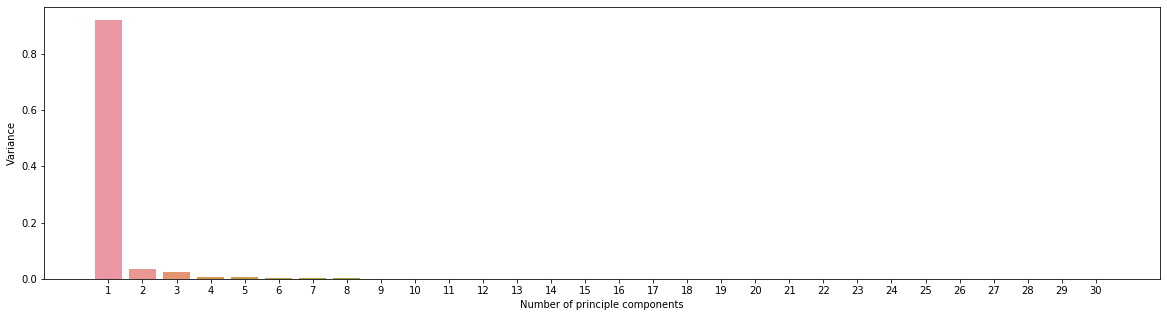

In [20]:
for i in range (0,1):  
    for n in pcavalues:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
            X_train, X_test = preprocess_pca(X_train, X_test, n)
            param_grid = {'C': [0.5,0.9,1,2,10,15,20], 'degree' : [2,3] , 'gamma' : ['scale'], 'kernel' : ['poly'], 'coef0': [1,2]}
            SVM_NonLinear_GS = GridSearchCV(SVC(), param_grid, cv = 2, refit=True, verbose=15, scoring = score, n_jobs=-1)
            SVM_NonLinear_GS.get_params().keys()
            SVM_NonLinear_GS.fit(X_train,y_train)   
            y_pred = SVM_NonLinear_GS.predict(X_test)
            resultsSVM2 = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsSVM2.insert(0,'SVM NON Linear RUN ' + str(i+1) + " n_components = " + str(n) + " scoring = " + score + " ")
            resultsSVM2.pop(4)
            resultsSVM2.insert(4, SVM_NonLinear_GS.score(X_train, y_train))
            resultsSVM2.insert(5, SVM_NonLinear_GS.score(X_test, y_test))


            SVM2_dataframe = pd.DataFrame([resultsSVM2], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([SVM2_dataframe])
            print("The best estimator for RUN " + str(i+1) + " n_components = " + str(n) + " scoring = " + score + " " + str(SVM_NonLinear_GS.best_estimator_))
            print("The Confusion matrix for RUN" + str(i+1) + " n_components = " + str(n) + " scoring = " + score + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))

In [21]:
print('The parameters combination that would give best accuracy is : ')
print(SVM_NonLinear_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'C': 20, 'coef0': 2, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [22]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 n_components = 2 scoring = precision,0.478970,0.484402,0.424684,0.408935,0.413495
SVMLinear RUN 1 n_components = 2 scoring = recall,0.498307,0.498778,0.425312,0.789600,0.775578
SVMLinear RUN 1 n_components = 2 scoring = accuracy,0.508496,0.506450,0.442626,0.457426,0.457784
SVMLinear RUN 1 n_components = 2 scoring = f1,0.527576,0.518596,0.445982,0.539382,0.563656
SVMLinear RUN 1 n_components = 5 scoring = precision,0.550376,0.535935,0.468405,0.428876,0.438031
...,...,...,...,...,...
SVM NON Linear RUN 1 n_components = 20 scoring = f1,0.540690,0.508990,0.424357,0.155172,0.118310
SVM NON Linear RUN 1 n_components = 30 scoring = precision,0.614661,0.521407,0.446526,0.672269,0.600000
SVM NON Linear RUN 1 n_components = 30 scoring = recall,0.572388,0.518130,0.450230,0.088818,0.085616


# KNN

[[ 1.58935136e+10  5.40485548e+09]
 [-2.32890590e+08 -2.20399795e+08]
 [-1.53533982e+10 -8.34131656e+08]
 ...
 [-1.25084992e+10 -1.54412738e+09]
 [-1.37995372e+10 -6.23268005e+08]
 [-9.34987088e+09  1.31058633e+09]]
The best estimator for RUN 1 n_components = 2 scoring = precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN1 n_components=2 scoring = precision is 

[[[ 75 230]
  [ 62 391]]

 [[391  62]
  [230  75]]]
None
[[-1.17615667e+10 -1.60655793e+09]
 [-1.52862321e+10 -9.46863372e+08]
 [-1.20560793e+09 -3.58967225e+09]
 ...
 [-1.22690109e+10  8.12463550e+08]
 [-1.02847254e+10 -8.78378210e+08]
 [-1.25667834e+10 -1.41961083e+09]]
The best estimator for RUN 1 n_components = 2 scoring = recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n

The best estimator for RUN 1 n_components = 10 scoring = accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
The Confusion matrix for RUN1 n_components=10 scoring = accuracy is 

[[[ 91 219]
  [ 92 356]]

 [[356  92]
  [219  91]]]
None
[[-1.43424252e+10 -1.08633064e+08  8.36264542e+08 ... -6.59432497e+07
   1.54692044e+08 -8.66272055e+06]
 [-3.60213081e+09 -3.16481697e+08  5.32476029e+07 ...  1.49383937e+09
   5.77289267e+07  2.83751650e+08]
 [-1.55200938e+10 -6.46032431e+08  1.17621594e+09 ...  5.07070209e+07
   1.90226656e+08  1.12159944e+08]
 ...
 [-1.22375652e+10 -1.05881490e+08  1.52795748e+09 ... -3.14217806e+08
  -6.31421553e+06 -3.39731067e+07]
 [ 1.43108996e+10  1.22858616e+10 -7.15613170e+09 ... -2.37612103e+09
  -2.93731071e+08  3.84878919e+09]
 [ 1.42261271e+08 -3.25833173e+09 -1.01464895e+09 ...  4.52480905e+08
  -4.16460092e+08 -2.

The best estimator for RUN 1 n_components = 30 scoring = f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN1 n_components=30 scoring = f1 is 

[[[126 168]
  [158 306]]

 [[306 158]
  [168 126]]]
None
[[ 1.69543033e+11  1.73162530e+09]
 [-1.54333844e+10 -6.50733132e+08]
 [-1.54438161e+10 -6.44148168e+08]
 ...
 [-1.51221712e+10 -4.18503890e+08]
 [ 7.55778008e+10  2.86211781e+10]
 [-1.52113751e+10 -4.95917459e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 2 scoring = precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=2 scoring = precision is 

[[[ 56 248]
  [ 64 390]]

 [[390  64]
  [248  56]]]
None
[[-6.32811462e+09 -2.88511043e+08]
 [-1.51199898e+10 -8.29327851e+08]
 [-1.11945930e+10 -1.80164701e+09]
 ...
 [-1.36034512e+10  3.37150275e+08]
 [-1.54442523e+10 -8.55275569e+08]
 [-1.45471490e+10 -1.34342115e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 2 scoring = recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=2 scoring = recall is 

[[[116 209]
  [134 299]]

 [[299 134]
  [209 116]]]
None
[[ 2.79576156e+10  9.52011130e+09]
 [-1.46571112e+10 -6.89639911e+08]
 [-1.30504448e+10 -1.85831649e+08]
 ...
 [ 4.41814271e+09 -6.44005893e+09]
 [ 7.66081709e+10  1.29721723e+10]
 [-1.53274309e+10 -5.37455428e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 2 scoring = accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=2 scoring = accuracy is 

[[[ 64 254]
  [ 75 365]]

 [[365  75]
  [254  64]]]
None
[[-1.70672068e+09 -3.34964512e+09]
 [ 2.83647634e+10  1.35384213e+10]
 [-1.60997315e+10 -5.39100612e+08]
 ...
 [-1.56261163e+10 -4.76993971e+08]
 [-1.56334033e+10 -2.27516336e+08]
 [-1.37020324e+10  4.08241638e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 2 scoring = f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=2 scoring = f1 is 

[[[129 180]
  [151 298]]

 [[298 151]
  [180 129]]]
None
[[-1.51897795e+10 -7.68947343e+08  1.06269027e+09 -1.61673058e+08
   1.62862648e+08]
 [-1.48668987e+10 -6.12221390e+08  9.82945295e+08 -1.76095771e+08
   3.12704841e+08]
 [ 2.06909939e+10  1.58515590e+10 -6.60723582e+08 -6.39254166e+08
   7.62246630e+08]
 ...
 [-9.64910485e+09 -4.40401548e+08  2.36777975e+08 -4.90626347e+08
  -5.15181501e+08]
 [-1.52449462e+10 -8.29555039e+08  1.10854136e+09 -1.93857698e+08
   1.10927012e+08]
 [ 1.68851844e+11  4.23445014e+08  4.95160507e+08 -6.40852610e+09
   3.83570991e+09]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5 scoring = precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=5 scoring = precision is 

[[[ 79 226]
  [ 48 405]]

 [[405  48]
  [226  79]]]
None
[[-1.52979135e+10 -5.84480008e+08  9.07028363e+08 -1.38466242e+08
  -2.89734879e+08]
 [-2.07592335e+09  2.23721137e+09 -2.13996440e+09  8.13625560e+08
   1.55675246e+09]
 [-1.57604434e+10 -7.87590070e+08  1.08411950e+09 -1.70265976e+08
  -1.06587477e+08]
 ...
 [-1.49739788e+10 -9.51011321e+08  9.37498351e+08 -6.33586193e+07
  -7.81287842e+07]
 [ 1.59737457e+11 -2.64957089e+10  1.73191780e+10 -4.65624997e+09
  -3.54095485e+09]
 [ 4.41267488e+09  1.16569232e+10  2.58632503e+09 -4.99087728e+08
   1.50970497e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5 scoring = recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=5 scoring = recall is 

[[[130 178]
  [130 320]]

 [[320 130]
  [178 130]]]
None
[[-4.78412017e+09  2.32472238e+09 -2.08257553e+08  4.48777612e+08
  -4.15954566e+09]
 [-1.50739711e+10 -6.30888014e+08  9.84936868e+08 -2.83707887e+08
   5.48585575e+07]
 [-5.48626760e+09  9.15921110e+08 -7.09384640e+08 -1.22291979e+08
  -1.07541272e+09]
 ...
 [-1.48458655e+10 -3.65319904e+08  1.02274111e+09 -4.24406247e+08
  -6.93901583e+07]
 [-4.17880096e+09  5.28401797e+09 -1.38441361e+09 -1.96154058e+09
  -1.96948115e+09]
 [-1.45402132e+10 -3.05052793e+07  6.93239546e+08 -3.57217752e+08
  -1.03361412e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5 scoring = accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=5 scoring = accuracy is 

[[[107 201]
  [ 75 375]]

 [[375  75]
  [201 107]]]
None
[[-1.58856819e+10 -8.25505555e+08  1.10470179e+09 -1.58902757e+08
  -1.28993174e+08]
 [-1.58727937e+10 -8.68910745e+08  1.13310737e+09 -1.71753251e+08
  -1.47064445e+08]
 [-1.37924297e+10 -3.15432718e+08  9.88396777e+08 -3.16896140e+08
   7.33425814e+08]
 ...
 [-8.03320055e+09 -1.80704443e+09 -2.62981655e+09 -6.51781984e+08
  -5.16246652e+06]
 [ 6.78018574e+10  1.40065932e+10 -2.13118761e+10  7.64128041e+09
  -1.87694625e+10]
 [-1.59653090e+10 -8.36499846e+08  1.11410922e+09 -1.82596086e+08
  -9.96026912e+07]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5 scoring = f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=5 scoring = f1 is 

[[[157 182]
  [130 289]]

 [[289 130]
  [182 157]]]
None
[[ 2.75318093e+10  1.91567542e+10 -1.26959377e+10 ...  4.80115778e+09
   6.91305756e+08 -1.62453898e+09]
 [-1.10101330e+10  1.46223877e+09 -3.23848072e+08 ... -3.29481862e+08
   2.89467644e+08 -6.25688364e+08]
 [-1.47158307e+10 -9.58919697e+08  1.15113020e+09 ... -7.19623744e+07
   1.32166799e+08  6.53344564e+07]
 ...
 [ 1.54177209e+10 -5.38502428e+09  1.11138748e+09 ...  4.45033991e+08
  -3.76269673e+08 -2.44594347e+08]
 [-1.53523601e+10 -7.82167876e+08  1.18913137e+09 ... -6.26257563e+07
   1.52986196e+08  6.01269646e+07]
 [-1.33334608e+10 -2.53610780e+09 -4.75999486e+08 ...  1.20327318e+07
   1.58287848e+08  4.50206706e+07]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10 scoring = precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=10 scoring = precision is 

[[[ 83 250]
  [ 51 374]]

 [[374  51]
  [250  83]]]
None
[[-1.49663886e+10 -2.72659205e+08  7.96015397e+08 ...  2.57889814e+07
   1.49117806e+08  7.66015030e+07]
 [-7.81619105e+09 -7.42634711e+08  8.63243192e+08 ... -7.19062280e+07
   1.49070277e+08 -7.21686886e+07]
 [-1.48869992e+10 -5.47433515e+08  9.39532073e+08 ... -6.82465429e+06
   6.74057580e+07  1.39269240e+08]
 ...
 [-1.54425958e+10 -7.65528898e+08  1.13885513e+09 ... -4.20735855e+07
   1.79439087e+08  6.41508876e+07]
 [-6.07241014e+09  2.89574838e+08 -6.94886253e+08 ...  5.62345376e+08
  -4.55094654e+08  8.12421019e+08]
 [ 1.88256921e+09 -4.13353606e+09 -5.17597007e+08 ...  1.91420550e+09
   4.35144633e+07 -

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10 scoring = recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=10 scoring = recall is 

[[[152 186]
  [125 295]]

 [[295 125]
  [186 152]]]
None
[[-4.93041112e+09 -1.92142987e+09 -9.36645986e+08 ... -6.33616200e+08
  -2.45695505e+08 -6.54967949e+07]
 [-1.39407077e+10  2.06715365e+09 -7.33052105e+08 ... -9.72708052e+08
   7.58568773e+07 -1.02897240e+08]
 [-1.16484418e+10 -8.56569573e+08  2.70892803e+08 ... -2.70201790e+08
   1.18202220e+08  4.26121684e+07]
 ...
 [ 1.08637180e+10  1.25758916e+10 -5.53103930e+09 ... -1.27827746e+09
  -1.29218918e+09  1.44980703e+09]
 [-1.51364453e+10 -7.20463164e+08  1.07541824e+09 ... -1.08109998e+08
   1.57684941e+08  4.59320252e+07]
 [-1.47344797e+10 -3.96617674e+08  8.54570713e+08 ... -1.66605702e+08
   1.19645638e+08 -2.46326

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10 scoring = accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=10 scoring = accuracy is 

[[[ 90 217]
  [ 53 398]]

 [[398  53]
  [217  90]]]
None
[[-5.41341573e+09 -1.74448253e+09 -7.32054205e+08 ...  8.82781809e+07
   1.12719476e+08 -1.42784720e+07]
 [ 5.57001266e+10 -2.32545643e+10 -8.38966954e+08 ... -4.90867243e+08
   4.59780970e+09  3.16651752e+09]
 [-1.48961053e+10 -2.53652704e+08  1.13190348e+09 ...  3.77381347e+07
   1.40864532e+08  4.52525894e+07]
 ...
 [-1.34263951e+10 -7.82713814e+08  1.41179780e+09 ...  1.00226480e+08
   1.18476019e+08  5.52976342e+07]
 [-1.51373159e+10 -3.89551351e+08  1.24523846e+09 ...  7.85469116e+07
   1.69264700e+08  6.57717612e+07]
 [-6.12429374e+09  3.86385212e+09  2.83573128e+07 ...  8.71809272e+08
  -4.95966670e+08  5.

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10 scoring = f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=10 scoring = f1 is 

[[[151 164]
  [147 296]]

 [[296 147]
  [164 151]]]
None
[[-1.60711046e+10 -7.28575174e+08  1.16079421e+09 ...  1.78499367e+06
   4.99805115e+07 -1.58270076e+07]
 [-1.46538756e+10 -2.89519403e+08  6.81321139e+08 ... -2.41455075e+04
   5.80890322e+07 -1.39517231e+07]
 [-1.50019440e+10 -9.95081846e+08  1.17621896e+09 ...  1.44594398e+06
   4.87933237e+07 -1.26311488e+07]
 ...
 [-1.60739802e+10 -7.48914880e+08  1.16429333e+09 ... -1.28973448e+07
  -9.84973839e+06  1.33303386e+07]
 [-1.59653732e+10 -6.72958584e+08  1.09819021e+09 ...  7.12280333e+05
   3.02919604e+07 -4.72544558e+06]
 [-1.33066404e+10 -9.52388555e+08  3.35413178e+08 ...  1.61245414e+08
  -2.59216679e+07 -2.46663914e+07]

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20 scoring = precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=20 scoring = precision is 

[[[ 92 224]
  [ 48 394]]

 [[394  48]
  [224  92]]]
None
[[-1.53155665e+10 -5.40734640e+08  1.21207201e+09 ...  3.79072202e+05
  -1.69813071e+07 -3.17287138e+07]
 [-1.42424176e+10 -7.32468862e+08  9.39061652e+08 ...  8.67780704e+07
   3.97997201e+07 -3.96529390e+07]
 [-1.52413263e+10 -3.36189202e+08  1.09623336e+09 ...  1.14352888e+06
  -2.15174740e+07 -3.65079652e+07]
 ...
 [ 1.97176826e+10  1.94748403e+09 -9.04727480e+09 ...  1.01952994e+08
  -8.14104488e+06 -1.62046378e+07]
 [-3.76590027e+09 -1.90528175e+09 -8.72362786e+08 ... -4.22682192e+07
   9.75213234e+07 -4.02864017e+07]
 [-1.46485768e+10 -3.82549903e+07  9.86954859e+08 ...  3.49593861e+05
  -1.39482752e+07 -

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20 scoring = recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=20 scoring = recall is 

[[[152 170]
  [131 305]]

 [[305 131]
  [170 152]]]
None
[[-1.41828862e+10 -1.83808631e+08  8.49733241e+08 ... -1.62875021e+07
  -1.63844898e+07 -2.37443377e+07]
 [-1.41444120e+10 -8.18683677e+08  1.31352867e+09 ...  4.32528179e+06
  -9.01657360e+06 -4.66947092e+07]
 [-1.47775146e+10 -7.30580222e+08  1.18368381e+09 ... -1.64622074e+07
  -7.60727801e+06 -3.81816458e+07]
 ...
 [-1.50293880e+10 -5.18756106e+08  1.12323984e+09 ... -7.30817509e+06
  -8.58057095e+06 -3.85431568e+07]
 [-1.52597574e+10 -5.95348985e+08  1.23443652e+09 ... -4.79164345e+06
  -3.42701907e+06  1.98528838e+07]
 [-1.51883835e+10 -6.18915836e+08  1.23671088e+09 ... -1.24064691e+07
   1.60285988e+06  1.93030

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':



The best estimator for RUN 2 n_components = 20 scoring = accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=20 scoring = accuracy is 

[[[ 84 216]
  [ 68 390]]

 [[390  68]
  [216  84]]]
None
[[-1.49639097e+10 -6.18562682e+08  1.18963035e+09 ... -3.45946484e+06
   8.71594093e+06 -1.17706677e+07]
 [ 7.78868214e+09  8.14868543e+09 -3.59822517e+08 ... -4.75521532e+08
   1.02618168e+08 -8.13867203e+07]
 [ 1.69553205e+11 -7.58946184e+08 -2.46984866e+09 ...  2.19081727e+09
   3.61592597e+09 -2.86413159e+08]
 ...
 [-1.42254064e+10 -2.60402616e+08  1.23891624e+09 ... -3.35214680e+07
   2.83472463e+07 -1.99030266e+07]
 [-6.87697512e+09 -8.87358989e+08  5.46135768e+08 ... -1.32001361e+07
   2.17382884e+07 -2.59044093e+06]
 [-1.10226775e+10  1.58565793e+09 -4.07911590e+08 ...  6.58924170e+07
  -9.71287386e+07  1

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20 scoring = f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=20 scoring = f1 is 

[[[140 152]
  [162 304]]

 [[304 162]
  [152 140]]]
None
[[-1.51715341e+10 -2.94954050e+08  8.87607523e+08 ...  1.75200205e+07
  -6.55168679e+01 -3.98611133e+01]
 [-1.52248964e+10 -5.88958761e+08  1.20225039e+09 ... -4.76010611e+05
  -3.15917660e+01  2.57410066e+01]
 [-1.53755451e+10 -6.38248960e+08  1.23925905e+09 ... -7.52543693e+05
  -5.17633682e+01  3.22013256e+01]
 ...
 [-6.16314295e+09 -1.14010031e+09  2.31320245e+08 ... -1.19532177e+04
  -1.50602478e+01 -7.85335239e+00]
 [ 4.52746034e+10  7.36267356e+08 -3.35741633e+09 ... -3.01952357e+06
   6.47133673e+02  1.81597349e+02]
 [-1.49185073e+10 -7.41038116e+08  1.16844256e+09 ... -2.12722751e+06
  -2.63319502e+01  2.21934802e+01]

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30 scoring = precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=30 scoring = precision is 

[[[ 80 240]
  [ 55 383]]

 [[383  55]
  [240  80]]]
None
[[-1.29335790e+10 -3.43585743e+08  9.99079582e+08 ... -5.80573202e+06
  -3.35916159e+01  2.18609886e+01]
 [-9.91044947e+09 -4.45463166e+09 -2.57278149e+09 ... -8.59239422e+06
   1.27298623e+01  3.23833550e+01]
 [ 8.13287377e+09 -6.40546384e+09 -4.59958951e+09 ... -5.93680822e+06
   3.32756523e+01 -1.40060440e+02]
 ...
 [-1.29250925e+10  5.40662712e+08  2.98578626e+08 ... -7.90498132e+05
  -3.30634651e+01  2.00747741e+01]
 [ 1.33149962e+11 -2.25461825e+10 -1.47430282e+10 ... -2.07610003e+07
  -1.41541084e+02  7.49670217e+00]
 [-6.99040615e+09 -2.85265900e+09 -7.37440033e+08 ... -3.91131534e+06
  -2.62053017e+01 -

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30 scoring = recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=30 scoring = recall is 

[[[136 162]
  [165 295]]

 [[295 165]
  [162 136]]]
None
[[ 2.83894616e+10 -4.82491454e+09 -6.33997123e+09 ... -6.59795096e+06
  -3.72743640e+01 -4.65424211e+01]
 [-7.82828257e+09 -2.67216778e+09  1.31576245e+09 ... -1.94551224e+06
   1.15169242e+01 -1.15549524e+02]
 [-1.04901733e+10 -7.87016475e+08 -1.25816577e+08 ... -7.16476489e+04
  -1.23571586e+01  8.83312321e+00]
 ...
 [-1.12404173e+10 -1.69101534e+09  1.35476066e+09 ... -1.89252424e+06
  -1.71707655e+01 -5.97036050e+01]
 [ 2.24246657e+10 -5.00968220e+09 -3.42891217e+08 ...  2.40269044e+07
   7.84297309e+00 -6.85606540e+01]
 [-1.50680387e+10 -3.90884961e+08  1.01206192e+09 ... -8.22711343e+05
  -4.45670612e+01  2.96608

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30 scoring = accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=30 scoring = accuracy is 

[[[104 205]
  [ 94 355]]

 [[355  94]
  [205 104]]]
None
[[ 1.50403726e+10 -8.10460112e+09  2.33214057e+09 ...  1.01091128e+04
  -3.12910451e+01  2.44026121e+00]
 [-3.43918415e+08 -1.02590160e+10 -1.19944644e+10 ... -1.38999435e+06
  -1.42151403e+01 -6.24319107e+01]
 [-1.28822600e+10 -6.78107918e+08  1.63844159e+08 ...  2.06975927e+06
  -4.32276728e+01  8.53848852e+00]
 ...
 [-1.54142982e+10 -7.42608443e+08  1.05320423e+09 ... -1.16876771e+06
   1.94815064e+01 -3.53354741e+01]
 [-1.47095108e+10 -1.44266252e+08  1.52360948e+09 ... -2.41679484e+06
   3.13366193e+00 -2.08183538e+01]
 [-4.23067472e+09  2.43555613e+09 -2.33580285e+09 ... -4.12144852e+06
   4.02518944e+01 -2.

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30 scoring = f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 n_components=30 scoring = f1 is 

[[[135 188]
  [149 286]]

 [[286 149]
  [188 135]]]
None
[[-8.36469354e+09  1.40920872e+09]
 [-1.36617002e+10 -1.22639424e+09]
 [ 3.33922517e+09 -3.24252775e+09]
 ...
 [-1.40154542e+10  2.63730417e+08]
 [ 1.16731300e+09 -9.07668518e+09]
 [ 1.19045985e+10 -6.07488951e+09]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 2 scoring = precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=2 scoring = precision is 

[[[ 68 256]
  [ 58 376]]

 [[376  58]
  [256  68]]]
None
[[ 3.04801124e+10 -1.87900524e+10]
 [-9.82423773e+09 -8.67047651e+08]
 [ 5.52422239e+10  2.54890137e+10]
 ...
 [-1.16510959e+10  5.15711640e+08]
 [-7.44108523e+09 -2.97051069e+09]
 [-1.28965477e+10  2.43464962e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 2 scoring = recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=2 scoring = recall is 

[[[116 188]
  [148 306]]

 [[306 148]
  [188 116]]]
None
[[-1.33219492e+10  1.10292436e+09]
 [ 3.25990517e+10 -1.62651183e+10]
 [-9.35920014e+09 -2.25807970e+09]
 ...
 [-1.34846508e+10  6.74581020e+08]
 [ 1.57207558e+11 -3.35117292e+10]
 [ 2.20593994e+10 -4.24306515e+09]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 2 scoring = accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=2 scoring = accuracy is 

[[[ 68 238]
  [ 59 393]]

 [[393  59]
  [238  68]]]
None
[[-1.09949163e+10  1.14836247e+09]
 [-1.50440749e+10 -5.89858031e+08]
 [-1.55394567e+10 -6.93264606e+08]
 ...
 [-1.40611306e+10  5.32473146e+07]
 [-1.12233271e+10 -1.77592113e+09]
 [ 2.74922352e+10  1.84198283e+10]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 2 scoring = f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=2 scoring = f1 is 

[[[126 189]
  [170 273]]

 [[273 170]
  [189 126]]]
None
[[-1.50913424e+10 -5.71250840e+08  1.12050979e+09 -2.15677241e+08
  -7.24769855e+07]
 [ 2.81498626e+10  1.04146694e+10 -9.86314146e+09 -9.09630732e+08
  -6.36532057e+09]
 [ 1.60926778e+11 -2.21533836e+10  1.76046858e+10 -6.84770832e+09
   1.30677474e+08]
 ...
 [-3.39128571e+09 -3.13233628e+09 -1.86545289e+09  4.98191606e+09
  -1.23018486e+09]
 [-1.47187997e+10 -3.14664909e+08  9.80539255e+08 -3.13686629e+08
  -6.74722465e+07]
 [-1.27639884e+10  5.15291429e+08  3.07047962e+08 -3.81704185e+08
  -8.41395297e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5 scoring = precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=5 scoring = precision is 

[[[ 92 228]
  [ 48 390]]

 [[390  48]
  [228  92]]]
None
[[ 1.19571798e+11 -4.16272338e+10  4.88419511e+09 -2.95643878e+09
   7.62408454e+09]
 [-1.53885780e+10 -6.15217993e+08  1.20641215e+09 -2.17104833e+08
  -9.25817138e+07]
 [-1.53127047e+10 -6.45888416e+08  1.27701249e+09 -2.49653419e+08
   1.16414175e+07]
 ...
 [-1.51046621e+10 -4.65727308e+08  1.02822521e+09 -2.64554597e+08
  -1.70470704e+08]
 [ 1.65838297e+09 -2.14292471e+09 -3.06613855e+09  5.19706325e+09
  -6.17648743e+08]
 [-9.46333862e+09 -2.00887677e+09  1.54603673e+09 -4.97861529e+08
   2.26859861e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5 scoring = recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=5 scoring = recall is 

[[[126 173]
  [138 321]]

 [[321 138]
  [173 126]]]
None
[[-1.52037700e+10 -4.76617511e+08  1.12270488e+09 -2.43377747e+08
  -1.32094896e+08]
 [-1.43113591e+10  7.05964104e+07  8.13004074e+08 -4.02164624e+08
   2.73069681e+08]
 [ 1.60483898e+11 -2.25867452e+10  1.88436620e+10 -5.42555270e+09
   1.72342178e+09]
 ...
 [-5.24112913e+08 -2.53822449e+09  5.69165845e+08 -1.03967671e+09
  -1.27715345e+08]
 [-5.02986422e+09  4.89358947e+09  1.54850286e+09  3.06465973e+08
  -2.82545936e+09]
 [-3.92102512e+09  3.33808872e+09 -8.78426160e+08 -7.93370639e+08
  -5.65867527e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5 scoring = accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=5 scoring = accuracy is 

[[[ 81 233]
  [ 52 392]]

 [[392  52]
  [233  81]]]
None
[[-1.01718743e+10  3.42830116e+09 -7.58707816e+08  8.99246458e+07
  -9.16191006e+08]
 [ 1.59879857e+11 -3.08168267e+10  1.54450919e+10  4.49472820e+09
  -8.64600735e+09]
 [-1.52886994e+10 -6.28093750e+08  8.62810638e+08 -1.43251849e+08
  -2.70942612e+08]
 ...
 [-1.58543053e+10 -9.70195498e+08  9.99240248e+08 -1.49622781e+08
  -1.59047149e+08]
 [-1.58284044e+10 -9.81192766e+08  1.03486140e+09 -1.26949517e+08
  -1.51406614e+08]
 [-9.16112191e+09 -1.43475590e+09 -2.31781531e+08  1.16688861e+09
   4.43791621e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5 scoring = f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=5 scoring = f1 is 

[[[122 174]
  [136 326]]

 [[326 136]
  [174 122]]]
None
[[ 1.75979013e+09 -4.03324272e+09 -8.01064790e+08 ...  1.59179185e+09
   4.74110512e+08 -8.46266359e+08]
 [-9.75481982e+09 -1.28086004e+08  2.64308797e+08 ... -5.94582280e+08
   1.76991777e+08 -2.32080830e+08]
 [-1.29088480e+10 -1.55641220e+09  1.05757636e+09 ... -1.15322607e+08
   7.44890944e+07  2.84620194e+07]
 ...
 [ 1.21678854e+09 -4.09994448e+09 -3.61300800e+09 ...  6.69592511e+07
   1.40162388e+08 -6.11764118e+08]
 [-6.00141178e+09 -1.35326787e+09 -3.23411277e+08 ... -6.41177986e+08
   7.14640284e+07 -3.46648185e+08]
 [-1.15195858e+10 -7.81703108e+08  6.34624757e+08 ...  9.75972901e+08
  -7.12267250e+07 -6.31155340e+08]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10 scoring = precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=10 scoring = precision is 

[[[ 88 227]
  [ 55 388]]

 [[388  55]
  [227  88]]]
None
[[-1.49884591e+10 -1.03470844e+09  1.03104441e+09 ... -9.55300486e+06
   1.01722911e+08 -5.77563524e+07]
 [-1.49787070e+10 -9.16029261e+08  9.39470173e+08 ...  6.63983882e+07
   1.54520571e+08  3.44455073e+07]
 [-1.42329875e+10 -7.84790859e+08  1.08579410e+09 ...  1.74757311e+07
   1.41259681e+08  1.47792703e+08]
 ...
 [-1.48203259e+10 -8.18483063e+08  9.10943262e+08 ...  6.89402264e+07
   1.41875537e+08  1.22450659e+08]
 [-1.46318512e+10 -9.70684349e+08  9.51649611e+08 ... -5.52114312e+07
   3.19456913e+07  4.34420438e+07]
 [-1.45252146e+10 -1.12092457e+09  9.71589342e+08 ...  9.79305683e+07
   1.48859995e+08  

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10 scoring = recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=10 scoring = recall is 

[[[130 173]
  [143 312]]

 [[312 143]
  [173 130]]]
None
[[-1.53807263e+10 -4.36156909e+08  1.19639942e+09 ... -9.99069849e+07
   1.58925395e+08  3.84916601e+07]
 [-1.51514290e+10 -5.65532209e+08  1.27231078e+09 ... -1.06764559e+08
   2.26999365e+08  4.85964332e+07]
 [-1.47825758e+10 -4.06797680e+08  9.18100616e+08 ... -5.89756074e+08
   4.84124797e+08 -1.26746763e+08]
 ...
 [-1.17964960e+10  1.10411256e+09 -4.08645387e+08 ...  9.26694254e+07
   1.99698249e+07  3.01999974e+08]
 [-1.52621114e+10 -3.51067603e+08  1.13170611e+09 ... -1.17481670e+08
   1.43160044e+08  1.63813512e+07]
 [-1.54953621e+10 -5.01426247e+08  1.26081574e+09 ... -7.63204019e+07
   1.58339977e+08  4.10253

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10 scoring = accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=10 scoring = accuracy is 

[[[ 87 211]
  [ 65 395]]

 [[395  65]
  [211  87]]]
None
[[-1.48165209e+10 -9.19902920e+08  1.12420456e+09 ...  4.61182988e+08
  -1.51519884e+08 -2.19548661e+08]
 [-8.88859587e+09  4.75406902e+09 -3.98972803e+09 ...  1.17657795e+09
   2.95409734e+08  4.56479385e+08]
 [-6.65438613e+09 -2.32962849e+09  2.40256824e+09 ... -1.23953596e+08
   4.22656486e+07  3.17816027e+07]
 ...
 [-1.48805886e+10 -4.51738667e+08  1.22467476e+09 ...  6.75944958e+06
  -3.14208885e+07 -6.77591334e+06]
 [-8.84836207e+09  1.00659973e+10 -8.25839216e+09 ... -4.52383431e+09
   2.70479106e+07 -8.01254025e+08]
 [-1.25132520e+10  1.47033101e+09  1.24705470e+09 ...  8.73324590e+07
  -3.07572357e+08  2.

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10 scoring = f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=10 scoring = f1 is 

[[[141 175]
  [142 300]]

 [[300 142]
  [175 141]]]
None
[[-1.56800973e+10 -5.90163486e+08  1.13495004e+09 ... -3.82547036e+06
   1.90464577e+07  1.44377030e+06]
 [-1.09305024e+10  2.12708158e+09 -3.70704765e+08 ... -1.75400285e+07
   2.14907792e+07  2.04243960e+07]
 [-1.53290841e+10 -3.16564924e+08  8.87316279e+08 ... -1.42789112e+07
   3.32362484e+07  1.75351055e+06]
 ...
 [-1.34642221e+10 -2.71966356e+09 -7.23316613e+08 ... -1.69313462e+07
   4.02788768e+07  3.63834524e+07]
 [-1.24340505e+10 -7.36412953e+08  2.58256595e+08 ... -1.78062097e+08
  -1.07267370e+08 -6.15935276e+07]
 [-1.40911879e+10 -1.01239324e+09  6.32569799e+08 ... -2.48884105e+07
   6.58379066e+07 -6.76022597e+06]

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20 scoring = precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=20 scoring = precision is 

[[[ 86 225]
  [ 59 388]]

 [[388  59]
  [225  86]]]
None
[[-1.49899629e+10 -1.05525233e+09  9.29965121e+08 ...  9.66883726e+05
   4.61060837e+07  1.19276627e+07]
 [ 1.78040200e+10  6.71231996e+09 -1.11670924e+09 ...  4.49440850e+08
  -4.27808037e+08 -4.30658576e+07]
 [-1.23196998e+10 -2.27710147e+09 -4.03202982e+08 ... -4.23059852e+07
  -6.07443041e+07 -3.29733982e+07]
 ...
 [-9.70687136e+08 -3.85368691e+09  1.55073607e+09 ...  2.70607398e+07
   7.11522145e+07 -4.38998098e+06]
 [-1.38701635e+10  5.97291738e+08  5.40453216e+08 ...  2.17797797e+06
   1.36009145e+07  2.98034541e+07]
 [-1.50204173e+10 -1.13906311e+09  1.03256402e+09 ... -4.86887983e+07
   8.53966732e+06  

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20 scoring = recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=20 scoring = recall is 

[[[140 164]
  [149 305]]

 [[305 149]
  [164 140]]]
None
[[-9.20757714e+09 -6.44671200e+09 -3.91611645e+09 ... -4.90004050e+07
  -1.40025872e+08 -1.12426836e+08]
 [-1.55914399e+10 -6.49524741e+08  1.23516049e+09 ...  3.37040591e+07
   2.33654193e+06 -5.37931277e+07]
 [ 1.26051864e+10 -4.04837881e+09 -5.40260951e+09 ...  8.44196199e+08
   1.26244329e+08 -2.63764770e+07]
 ...
 [-1.48061460e+10 -6.53349034e+08  9.58970023e+08 ...  7.68685624e+07
   4.71169360e+07  3.88611506e+07]
 [-1.05603629e+10  1.30584743e+09  1.45113187e+08 ...  2.72609922e+07
  -9.94665302e+07  5.69393363e+06]
 [-1.57355774e+10 -6.51083344e+08  1.29427574e+09 ... -4.90815540e+06
  -4.47372167e+06 -2.98717

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20 scoring = accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=20 scoring = accuracy is 

[[[104 213]
  [ 68 373]]

 [[373  68]
  [213 104]]]
None
[[ 1.65925703e+11 -8.68742335e+09  7.30630334e+09 ... -4.08804095e+08
  -1.33702605e+08  1.21842846e+08]
 [-1.49758221e+10 -2.36083901e+08  1.10857615e+09 ... -3.25499961e+07
   5.01487443e+07  3.96642597e+07]
 [-1.55181864e+10 -2.75174567e+08  9.38263256e+08 ...  9.58184637e+06
  -4.65097713e+07 -1.78716221e+07]
 ...
 [-9.27668918e+08  1.86977997e+09 -1.05407804e+09 ... -7.07692665e+07
   1.14734728e+08 -1.31988534e+08]
 [ 1.09776140e+11  6.13035264e+10  3.52206982e+10 ... -2.24155208e+09
   1.82011905e+08 -5.86528035e+08]
 [-1.50545400e+10 -7.33178164e+08  1.01570445e+09 ...  3.20477170e+07
  -3.35385617e+07 -1.

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20 scoring = f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=20 scoring = f1 is 

[[[138 163]
  [152 305]]

 [[305 152]
  [163 138]]]
None
[[ 1.81303769e+10  4.04756528e+09 -8.14556371e+09 ... -2.77931434e+06
  -3.04511765e+01 -3.69525141e+00]
 [-1.55681991e+10 -7.61286260e+08  1.17375304e+09 ...  4.78900099e+05
  -4.06507005e+01  2.89901668e+01]
 [-1.55825828e+10 -7.82795750e+08  1.17915056e+09 ... -3.42014989e+05
   3.40044134e+00  3.43666176e+00]
 ...
 [-6.70111858e+09 -2.72488697e+09  1.60186047e+09 ... -9.88336053e+05
  -1.35824070e+01 -5.84257527e+01]
 [-1.41550997e+10 -1.06654309e+09  1.21931718e+09 ... -7.07768487e+05
   2.47071558e+01 -1.37216581e+02]
 [-1.47699928e+10 -6.10272334e+08  1.08377769e+09 ... -1.99932720e+05
  -2.90611310e+01  2.83776429e+01]

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30 scoring = precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=30 scoring = precision is 

[[[ 89 223]
  [ 77 369]]

 [[369  77]
  [223  89]]]
None
[[-1.44742322e+10  2.81204441e+07  7.33554702e+08 ... -1.03297905e+06
   4.38916956e+00  1.33758014e+01]
 [-1.49745138e+10 -3.52819000e+08  1.19797083e+09 ... -8.54769791e+05
  -3.62649492e+01  2.88929111e+01]
 [-1.40871192e+10  3.32893718e+08  5.32027384e+08 ... -1.18067367e+06
   3.46103840e+01  3.43852038e+01]
 ...
 [-1.57009453e+10 -5.96410907e+08  1.27213315e+09 ... -8.17878472e+05
  -4.15202915e+01  1.32866655e+01]
 [-7.78152306e+09  1.55592523e+08  1.57262794e+09 ...  6.88953431e+06
  -1.02124812e+01  2.04031345e+01]
 [-9.54888053e+09 -1.84338138e+09  3.12217989e+08 ... -2.43945843e+06
   2.43068024e+01 -

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30 scoring = recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=30 scoring = recall is 

[[[162 152]
  [157 287]]

 [[287 157]
  [152 162]]]
None
[[-1.54392860e+10 -8.72769060e+08  1.08888833e+09 ... -7.56799023e+05
  -3.56675886e+01  2.72303539e+01]
 [-1.52412987e+10 -6.78668759e+08  9.73079509e+08 ... -9.80704670e+05
  -4.28427135e+01  2.90250230e+01]
 [-1.53107434e+10 -9.27135583e+08  1.19088857e+09 ... -1.18311939e+06
  -5.02469585e+01  2.84681508e+01]
 ...
 [-1.31888741e+10 -1.41473537e+09  1.12339012e+09 ... -1.09523275e+06
  -1.15886542e+01 -6.49373190e+01]
 [-8.91123128e+09 -2.20573533e+09  5.99558402e+08 ... -1.97760731e+06
  -2.57259870e+01  2.18754264e+01]
 [-4.76015202e+09 -1.79589781e+09 -1.64638442e+09 ... -8.90582388e+06
  -3.69063420e+01  1.32655

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30 scoring = accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=30 scoring = accuracy is 

[[[107 195]
  [ 82 374]]

 [[374  82]
  [195 107]]]
None
[[ 1.65621707e+11 -1.31706759e+10  1.08640418e+10 ...  9.87889641e+06
  -5.54549773e+01 -1.17457090e+02]
 [-1.26271977e+10  1.26027084e+09 -1.80373508e+08 ... -1.32484923e+06
   1.02276434e+02  2.15959785e+01]
 [-1.48544673e+10 -6.04000401e+08  1.22790718e+09 ... -1.63231376e+06
  -3.80772145e+01  2.93823889e+01]
 ...
 [ 4.38568488e+09  3.15657873e+09  1.50626051e+09 ...  1.48271730e+06
  -4.59255207e+01  1.22005133e+01]
 [ 9.89446280e+10  2.94889608e+10  6.65874789e+10 ...  3.06136377e+07
   2.15454107e+02 -8.76425176e+01]
 [-1.45506803e+10 -4.58139045e+08  1.14785855e+09 ... -1.11037366e+06
   2.40153554e+01  7.

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30 scoring = f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 n_components=30 scoring = f1 is 

[[[148 144]
  [159 307]]

 [[307 159]
  [144 148]]]
None


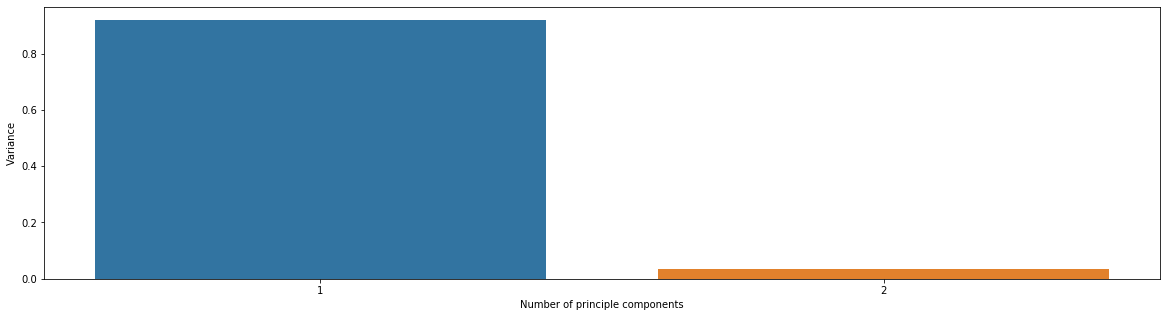

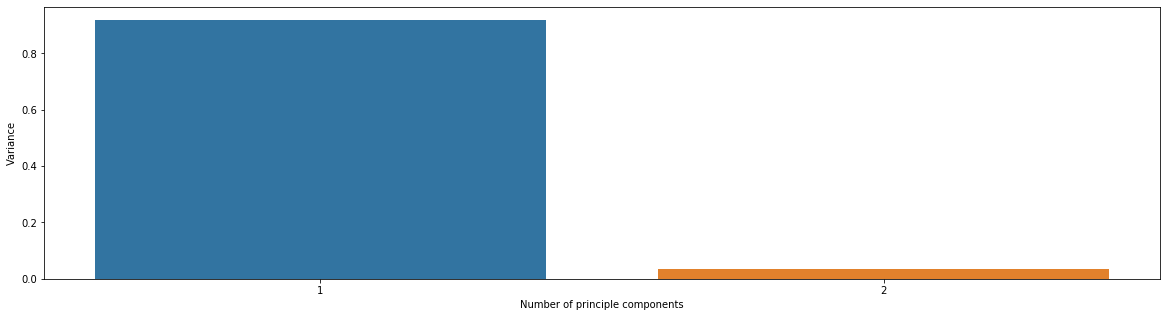

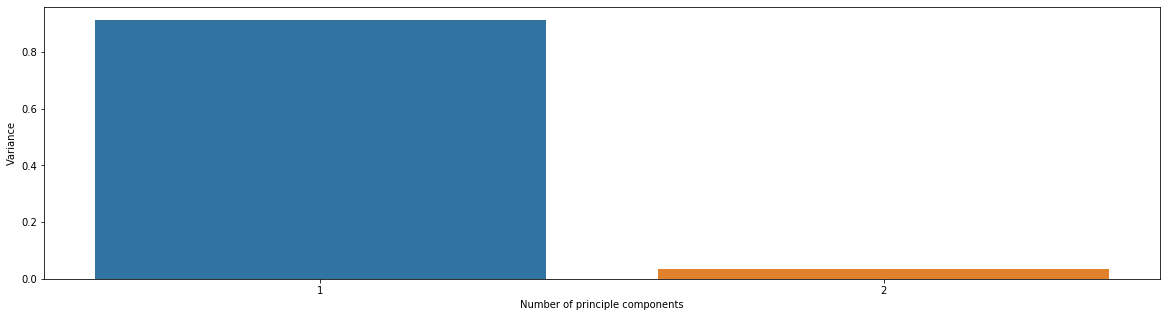

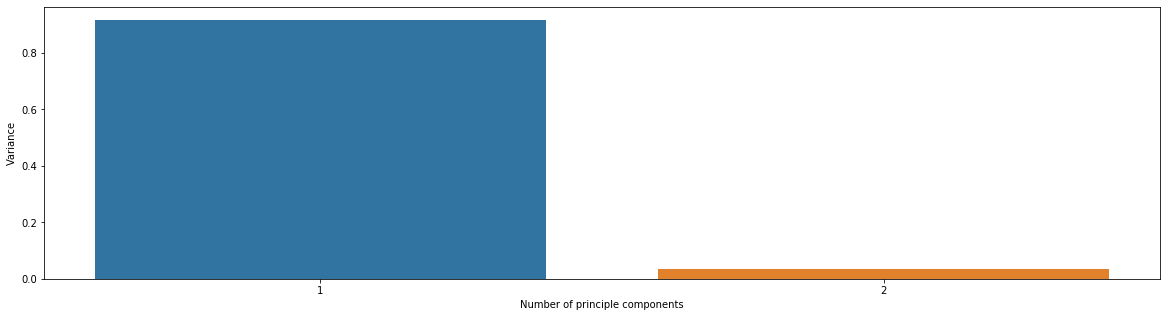

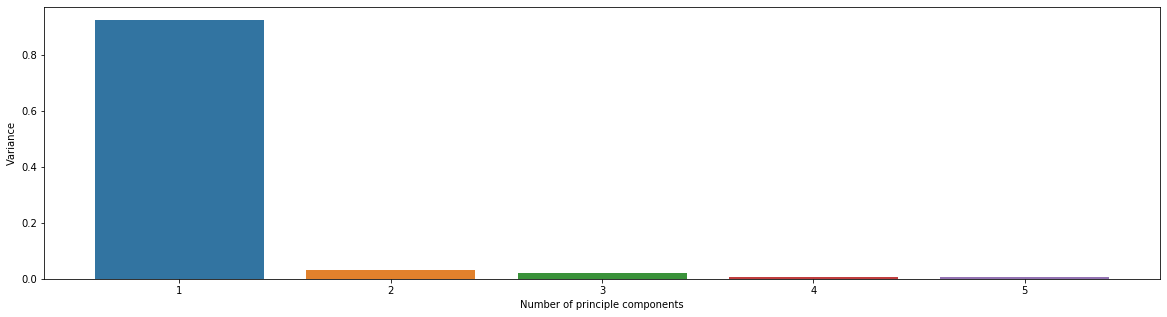

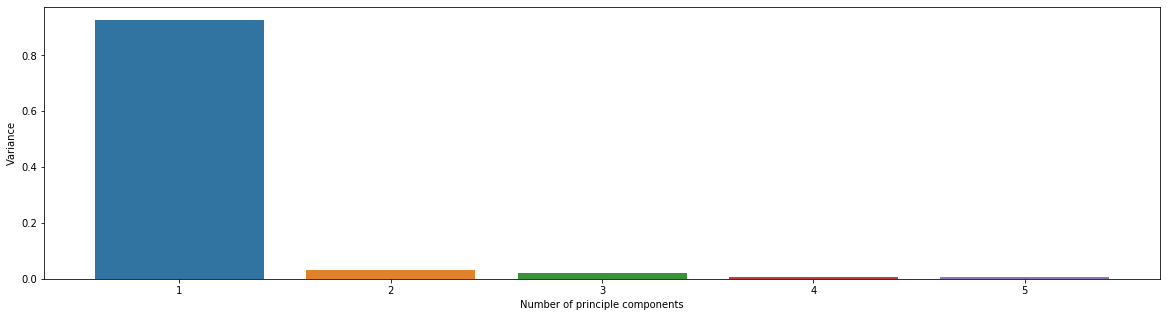

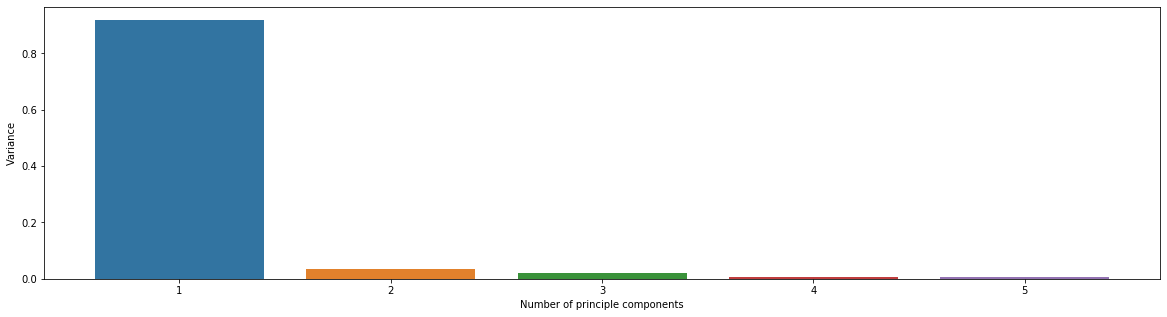

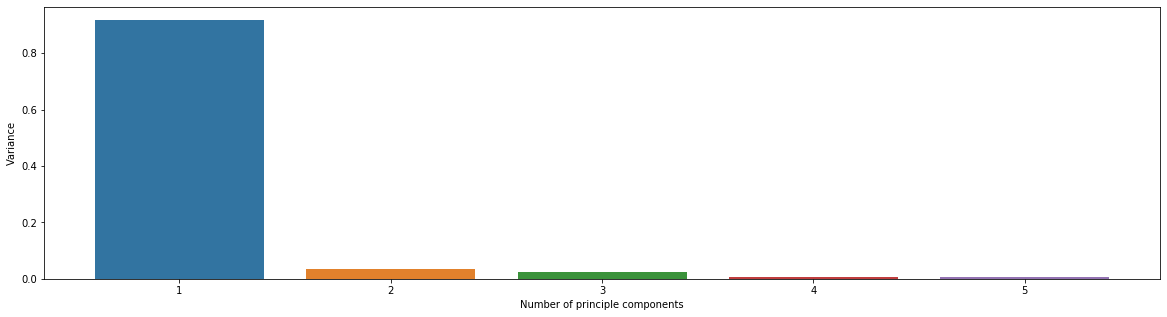

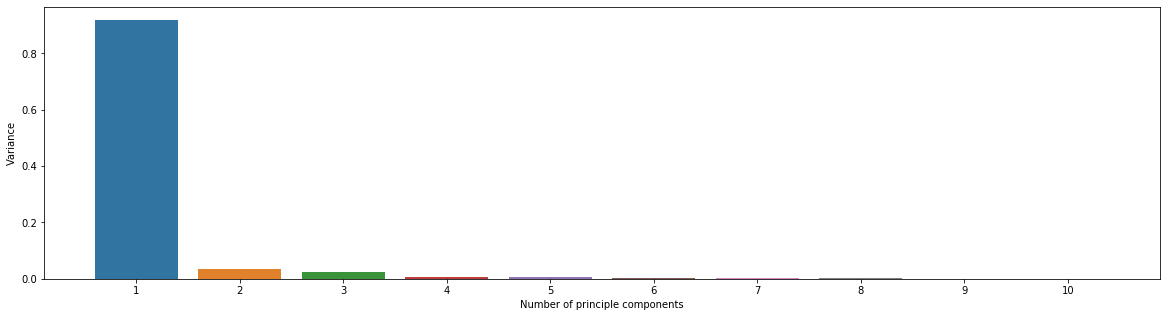

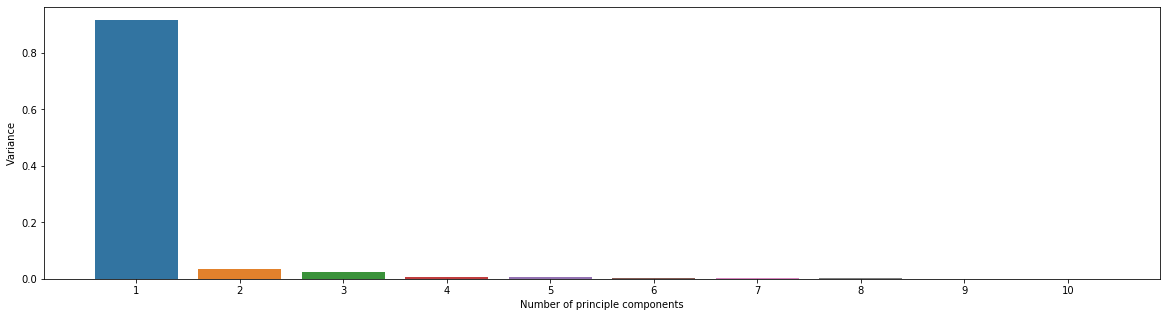

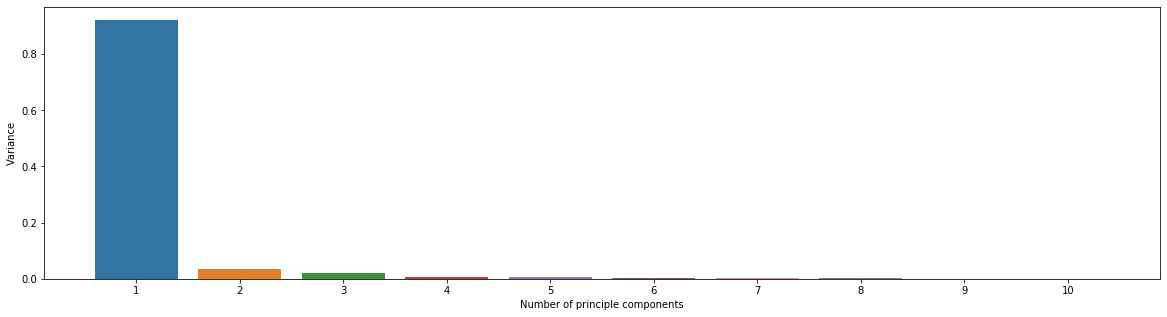

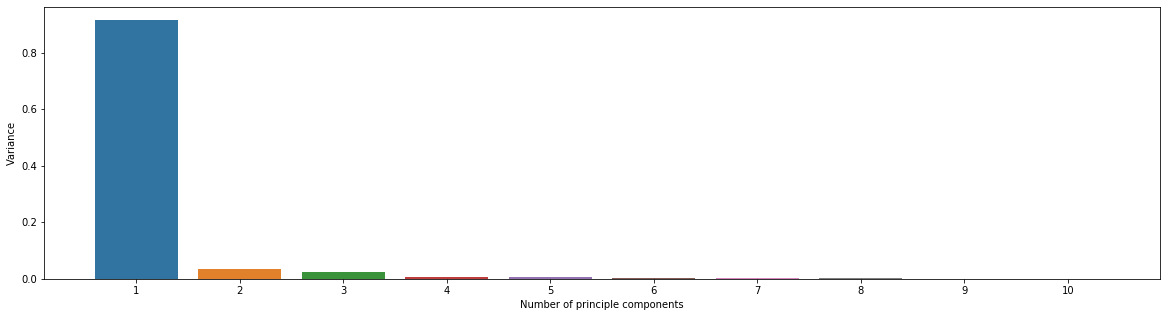

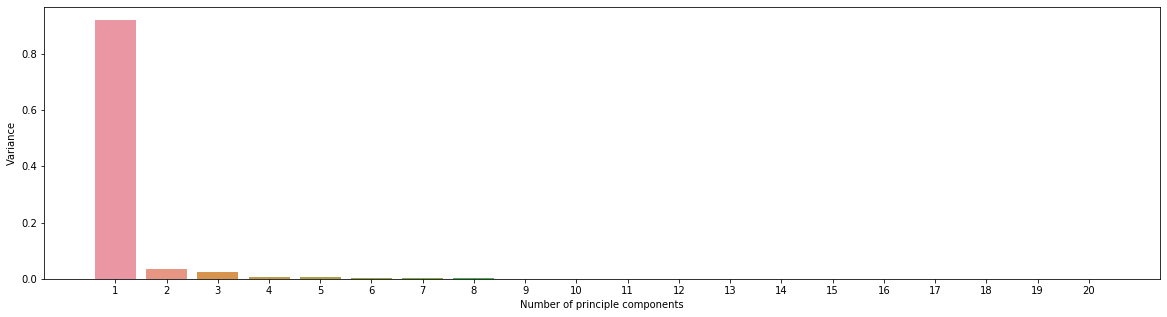

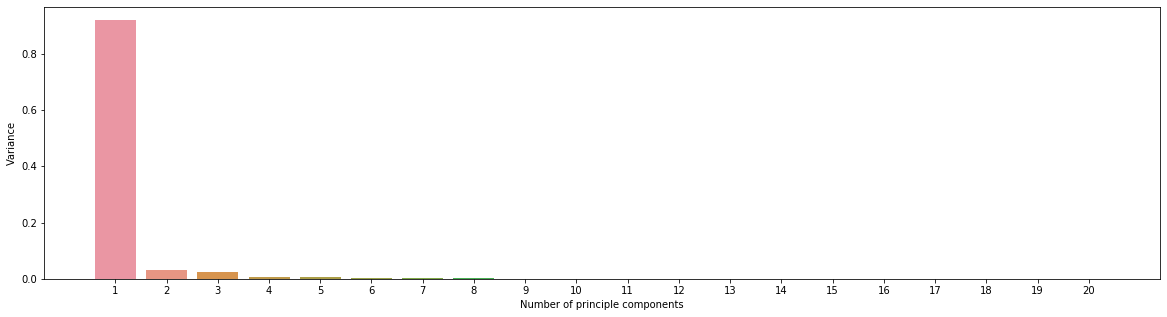

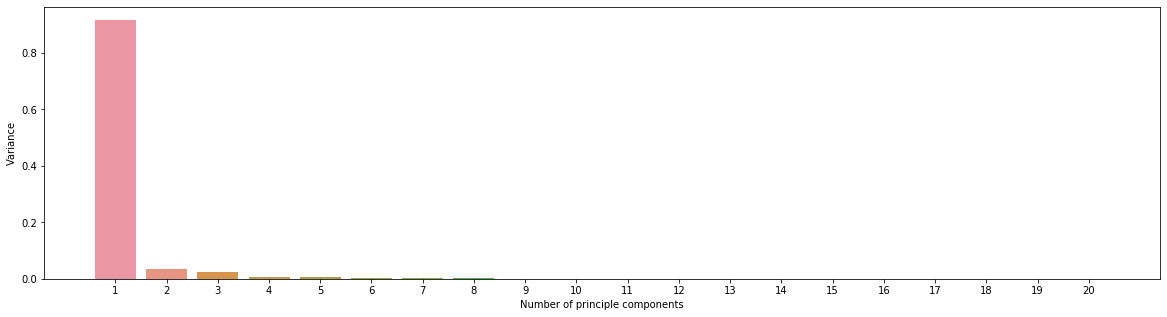

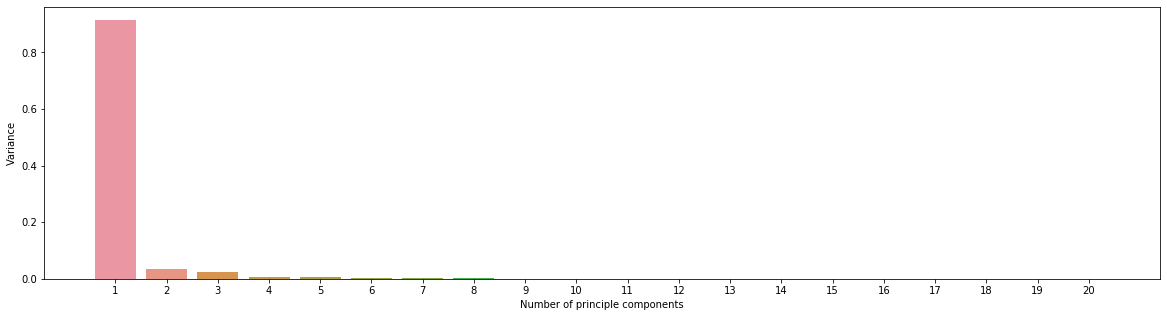

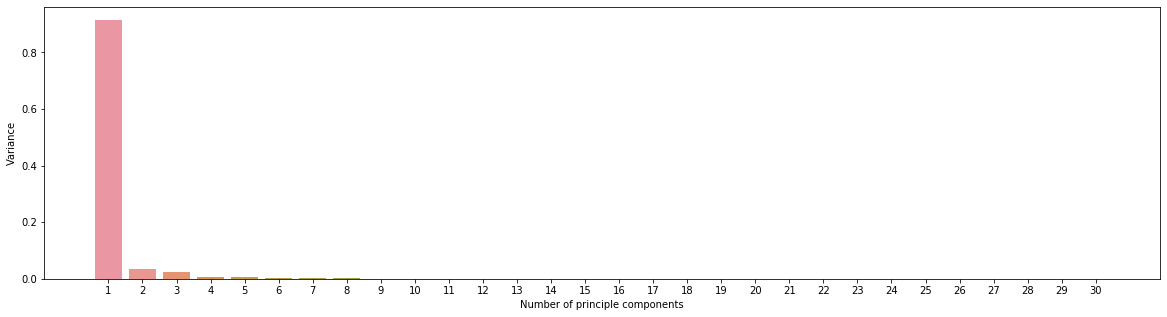

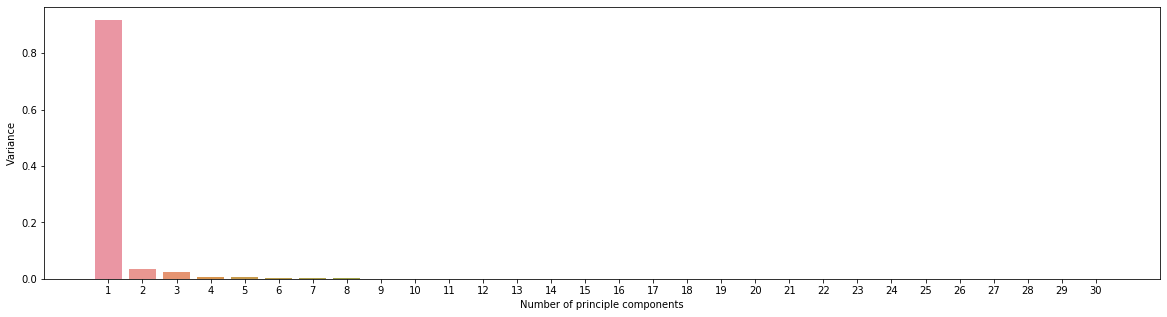

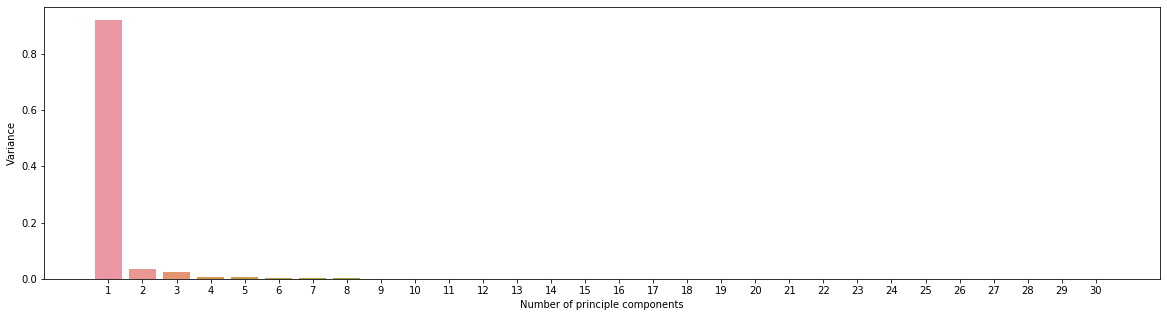

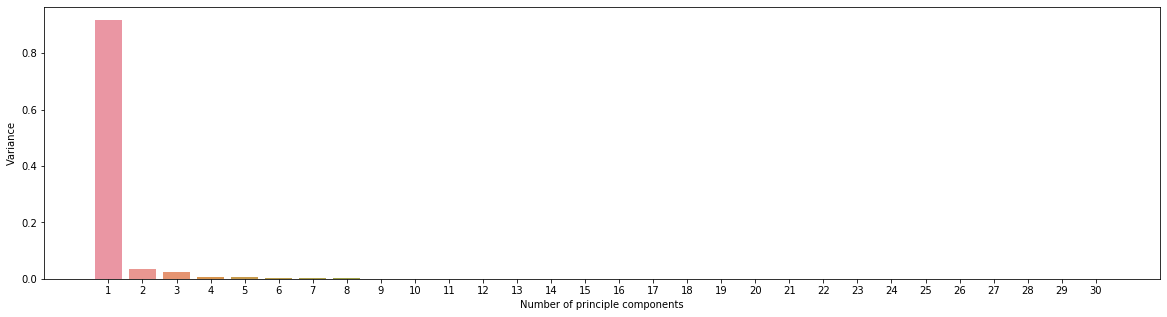

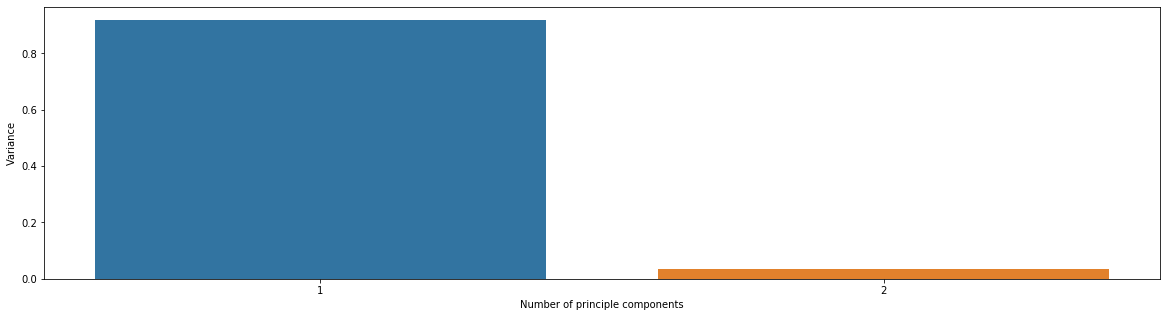

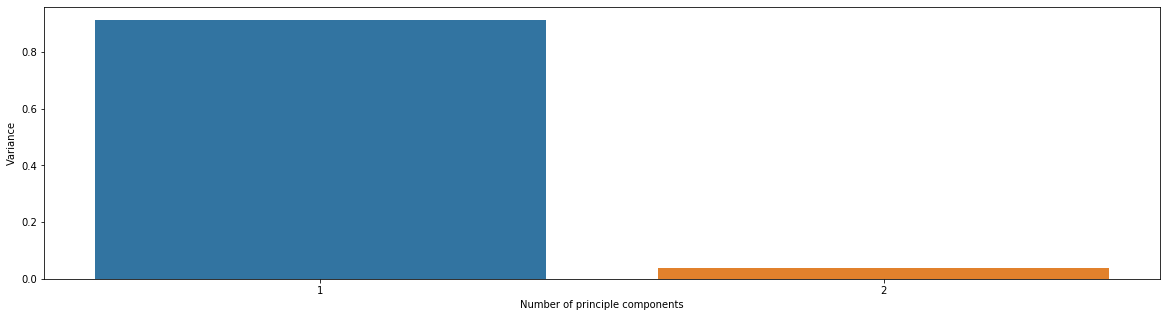

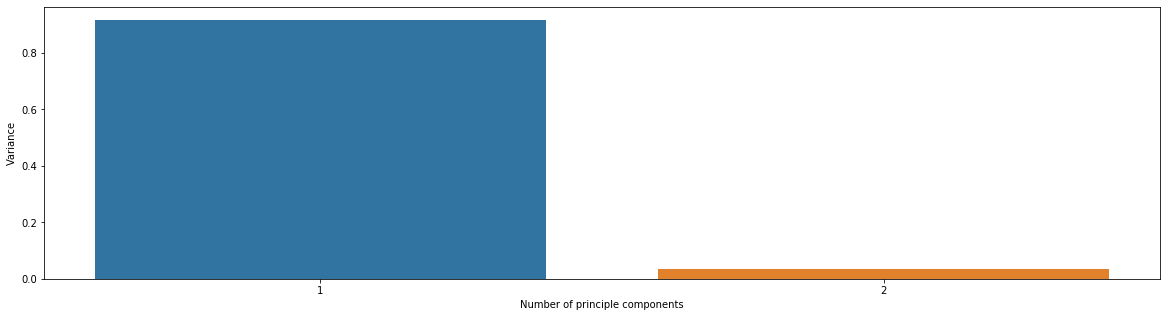

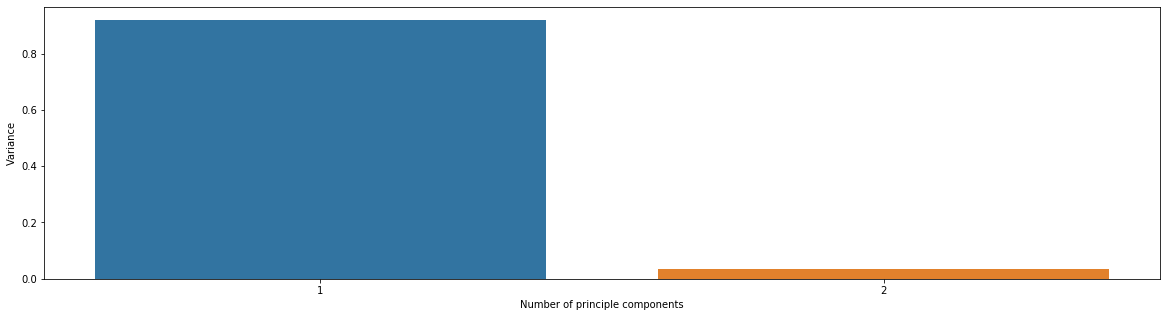

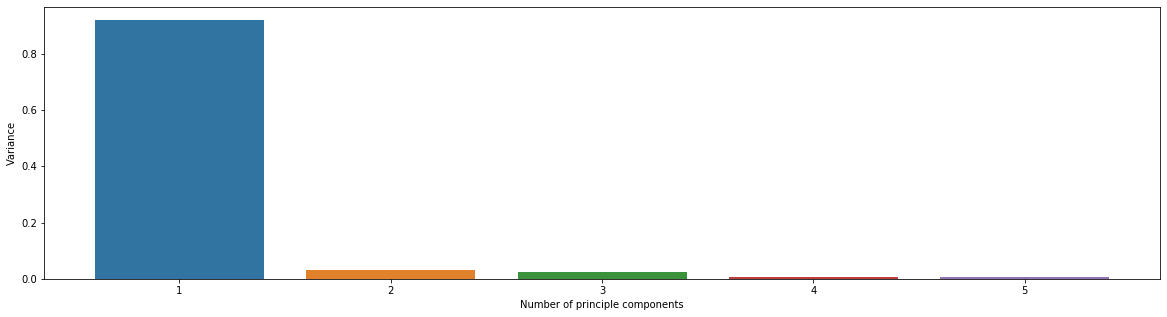

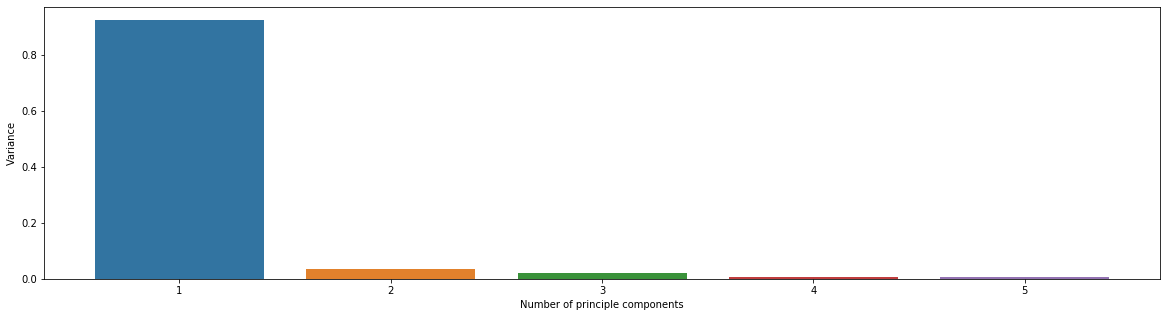

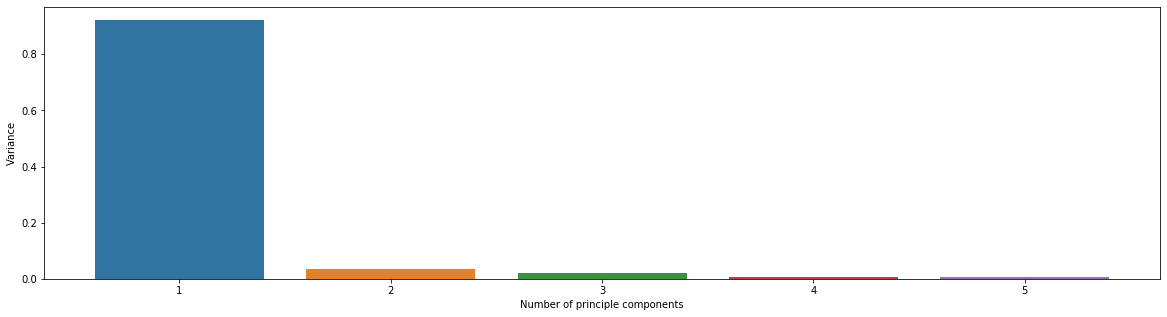

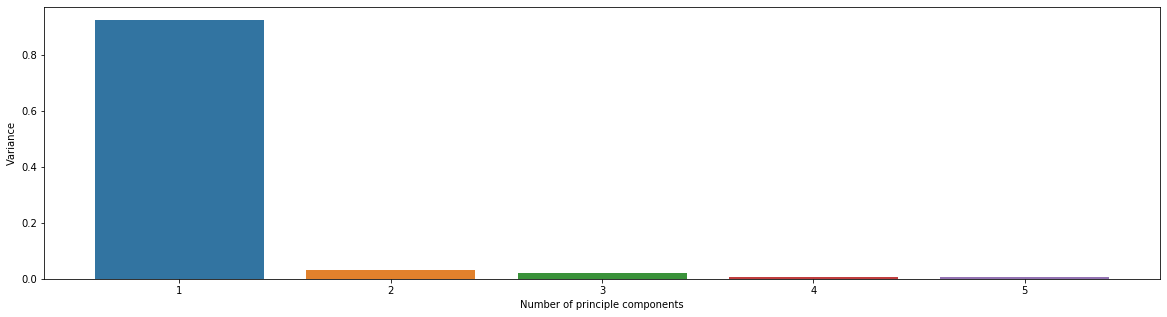

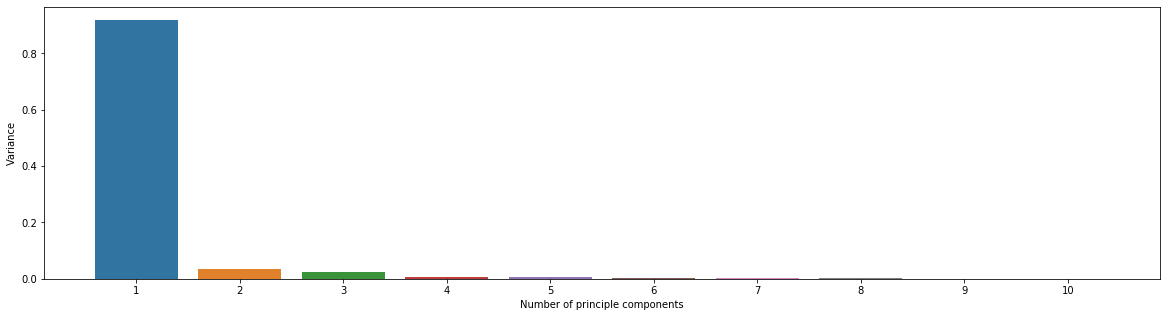

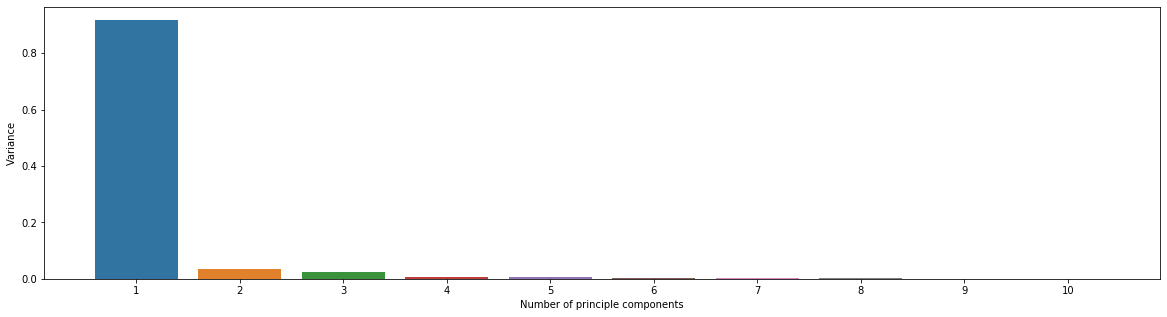

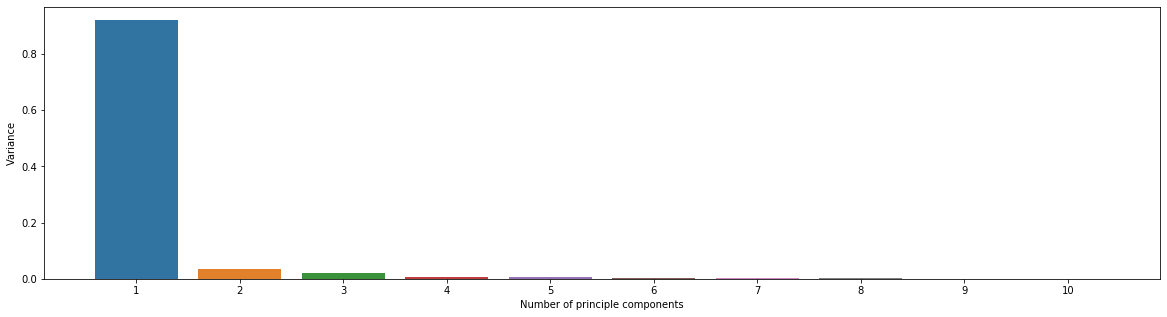

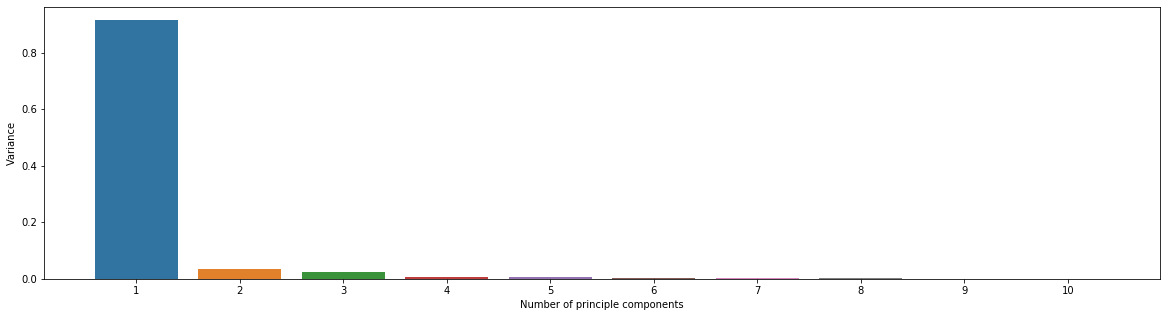

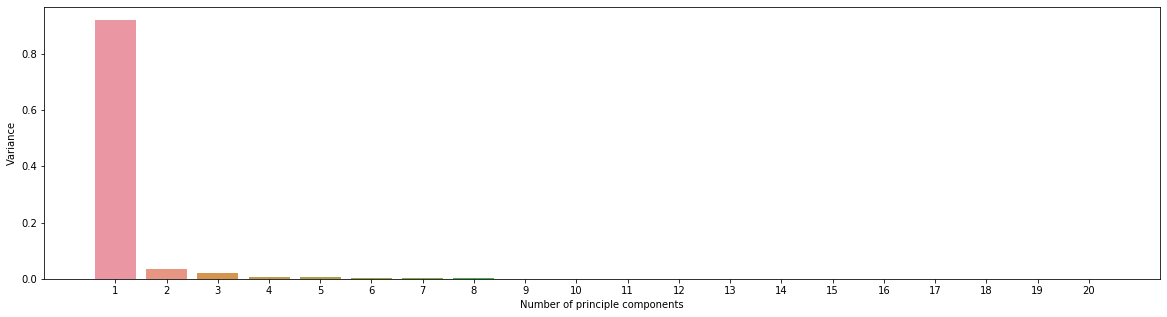

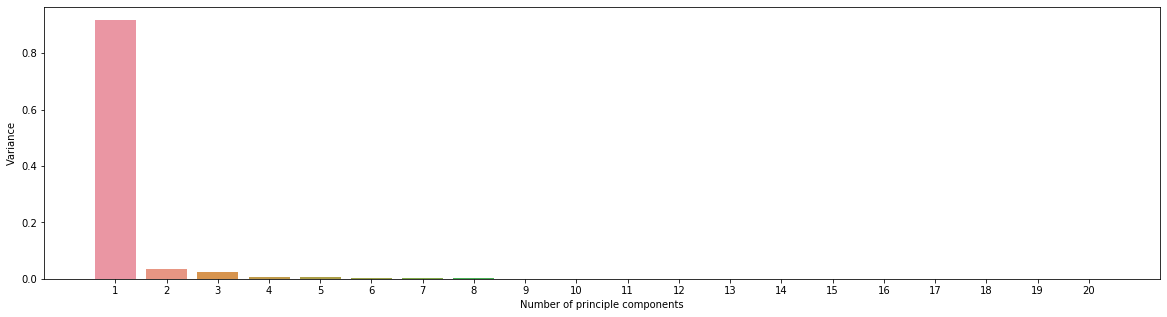

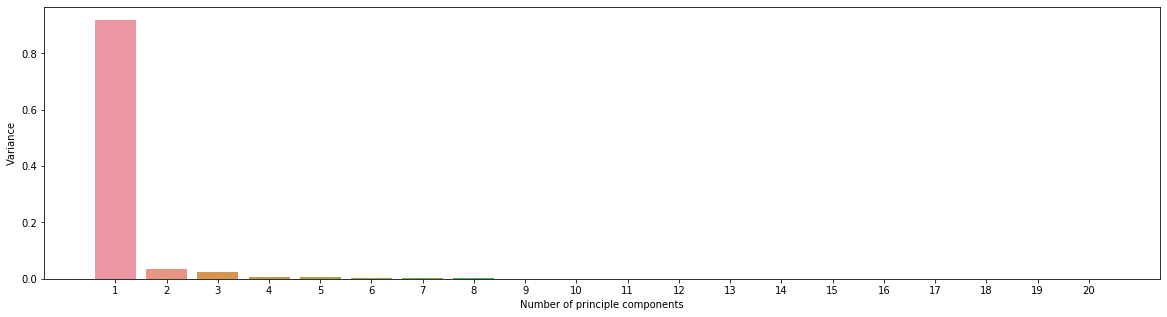

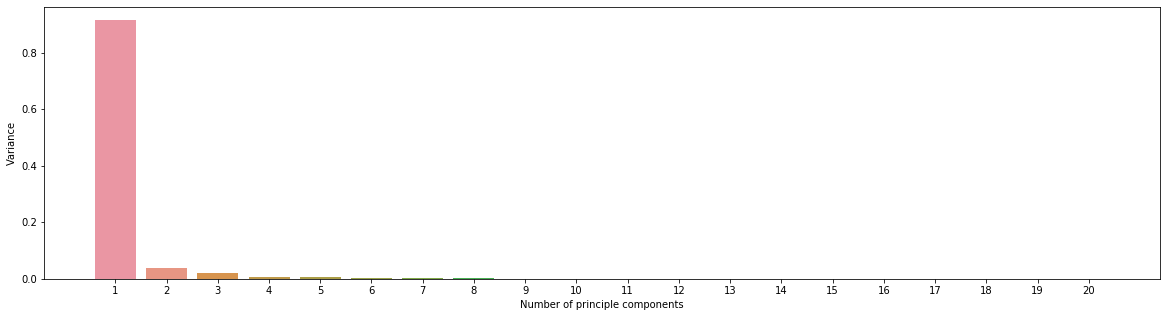

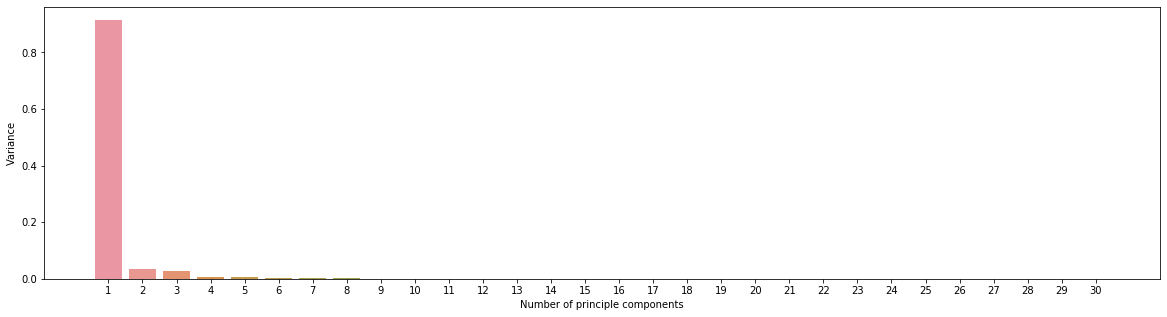

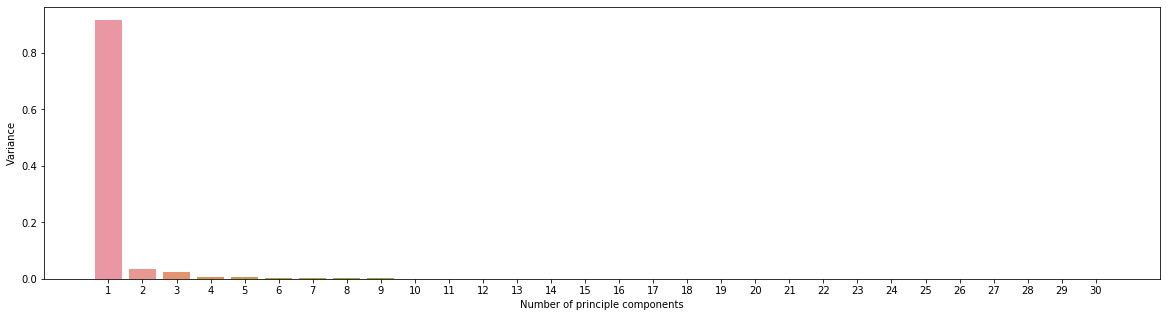

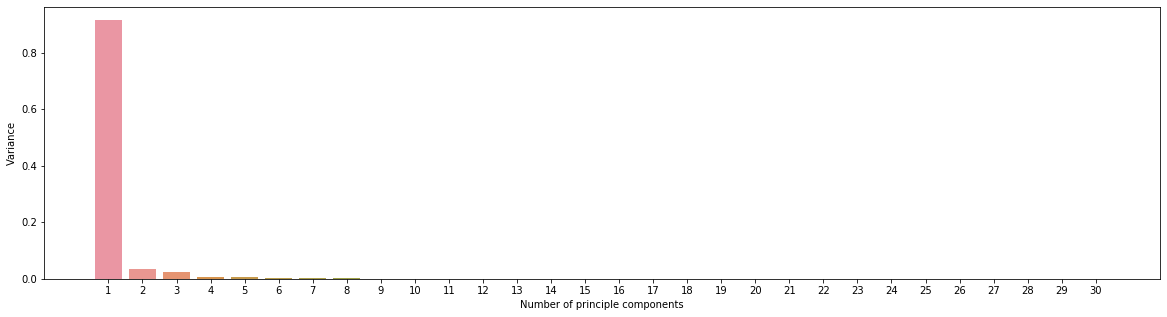

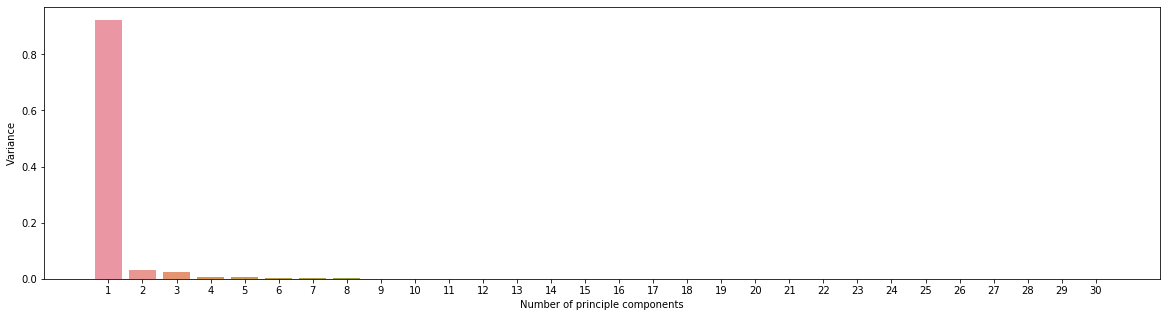

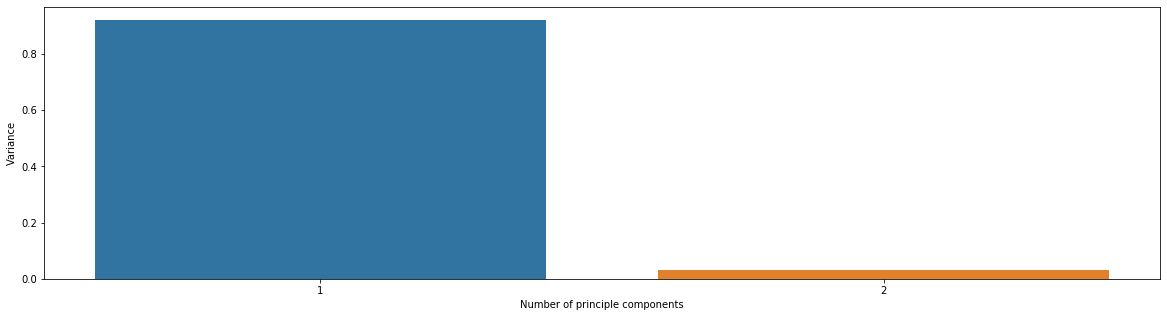

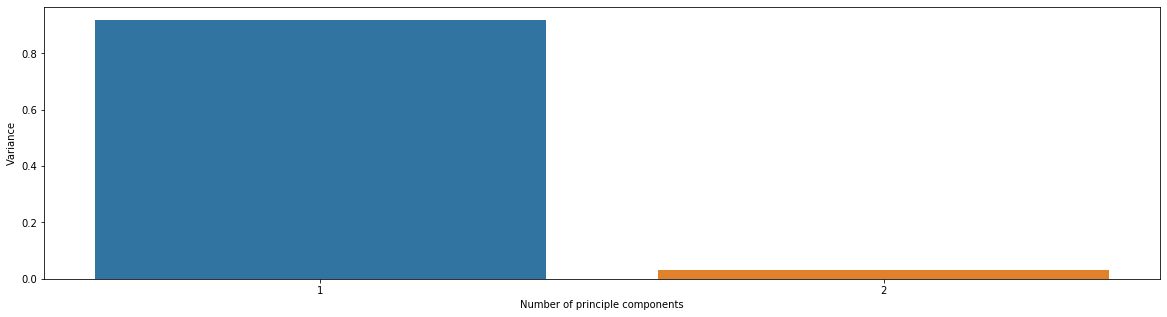

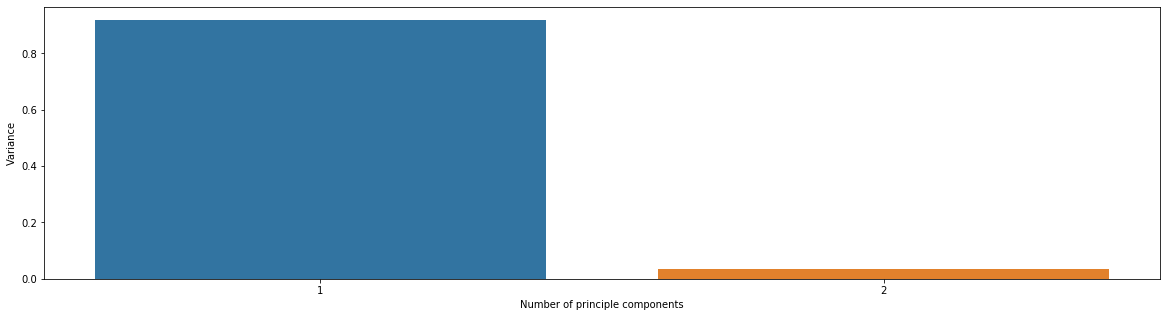

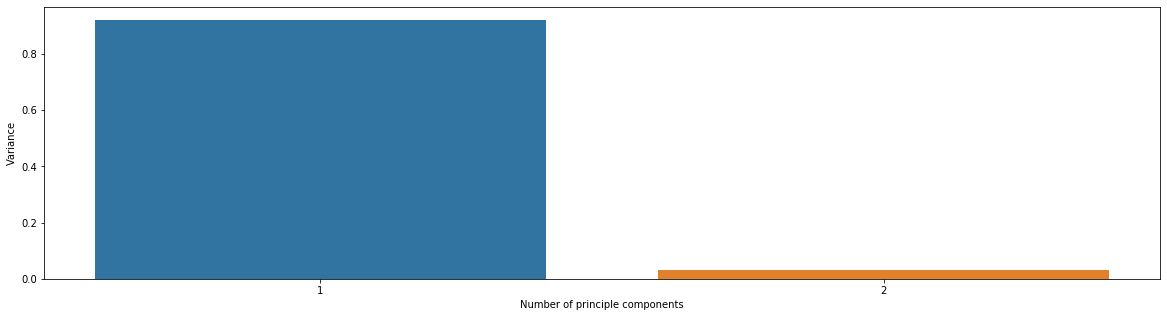

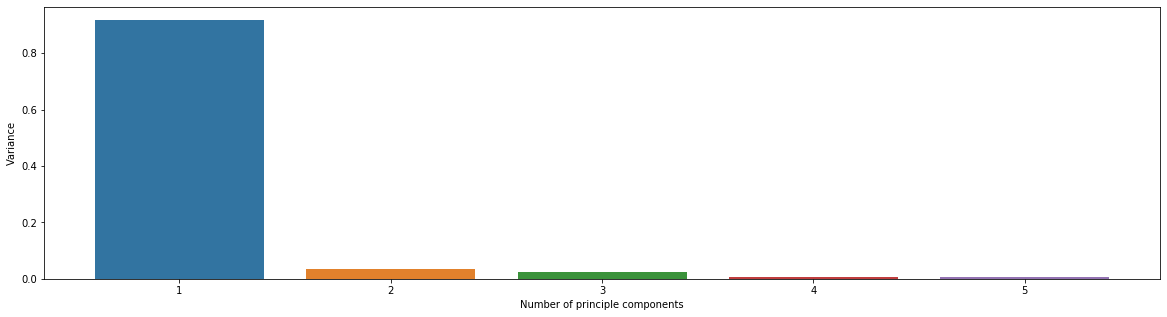

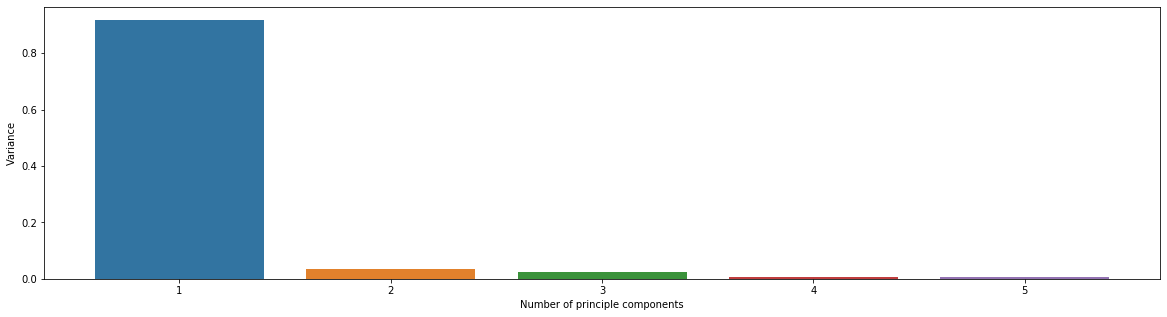

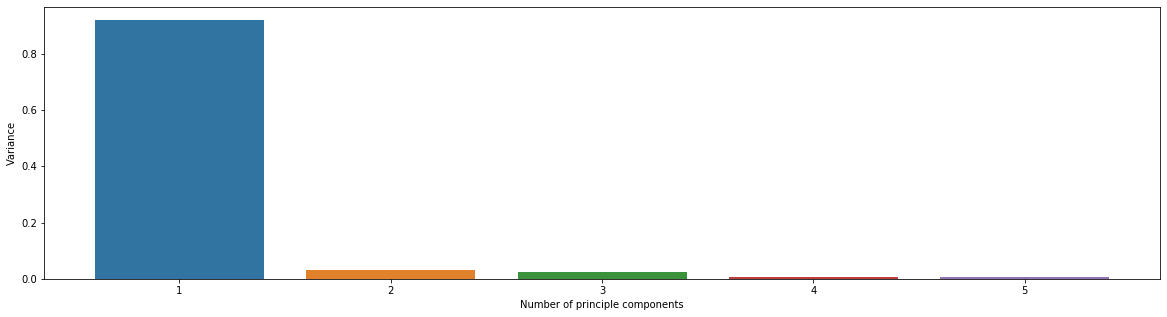

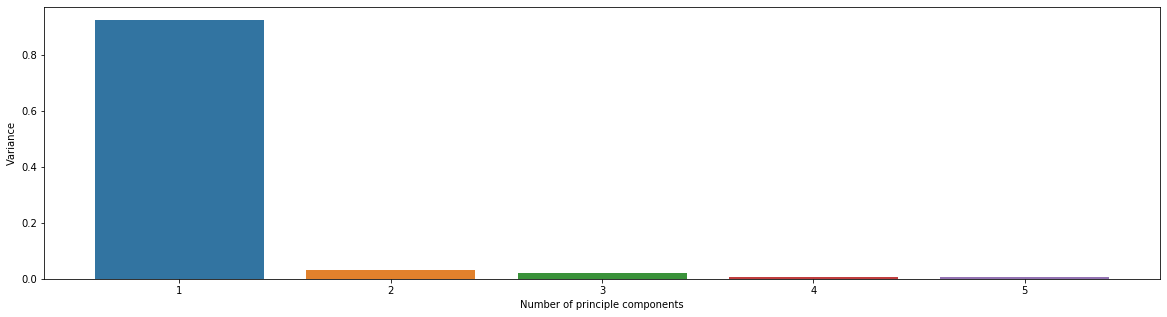

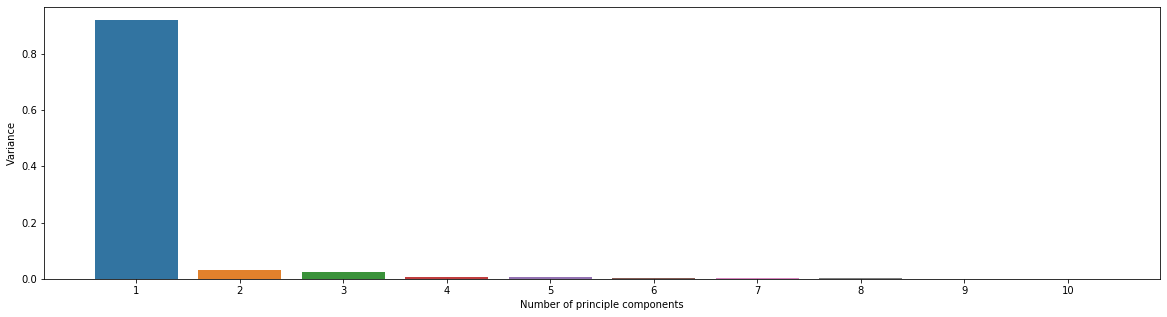

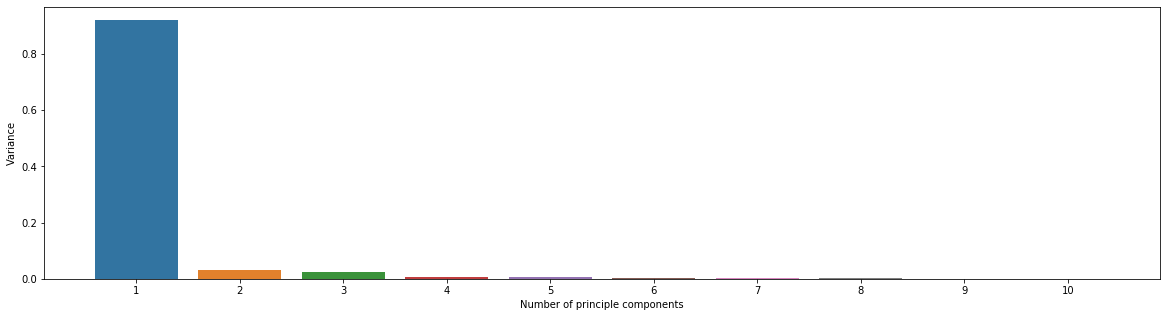

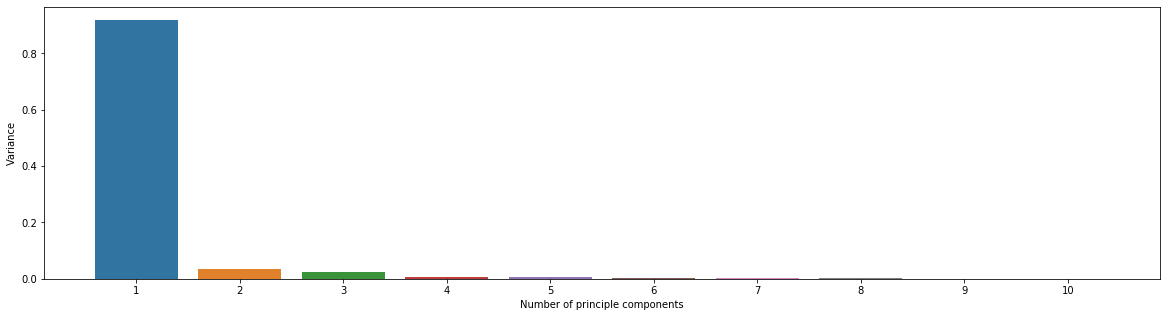

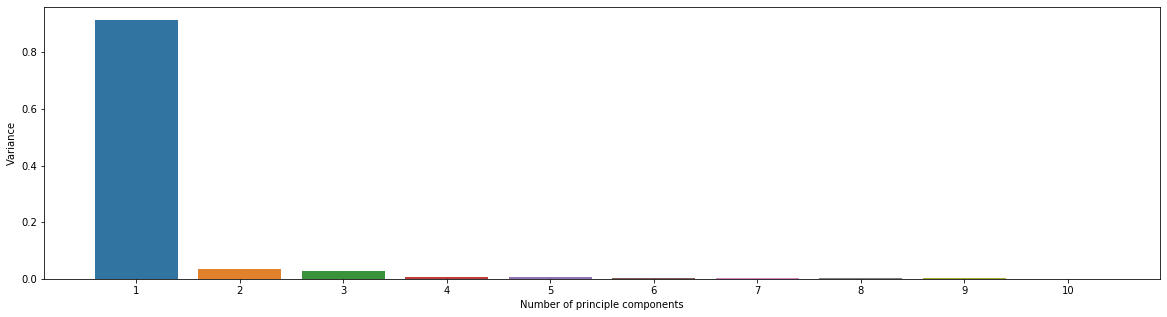

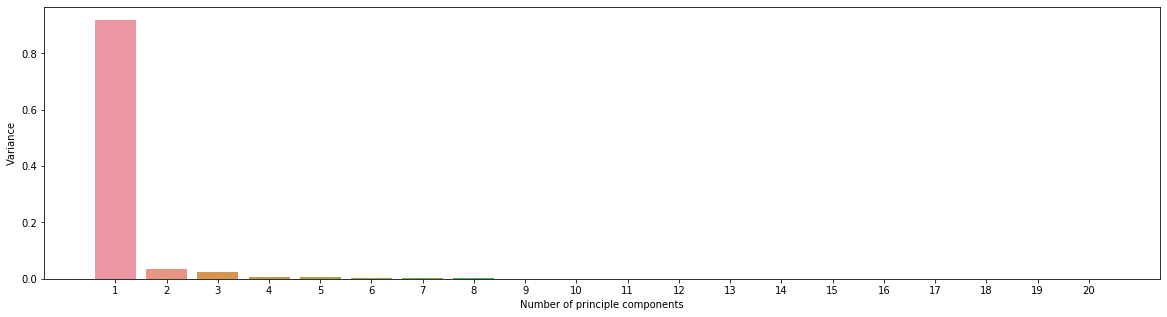

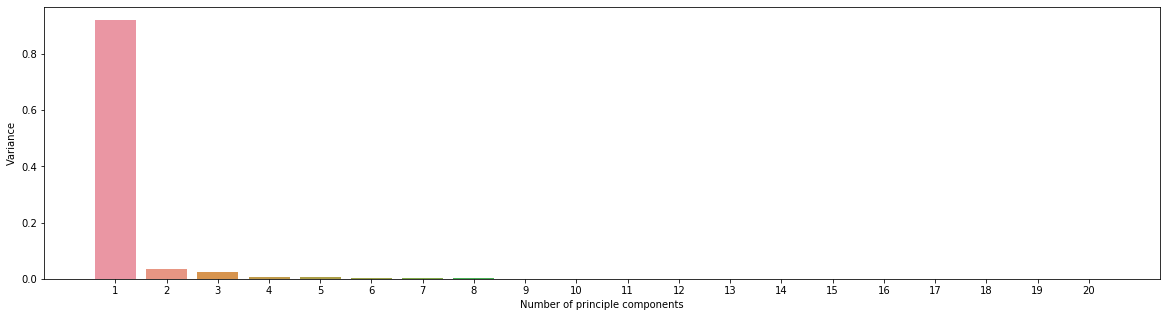

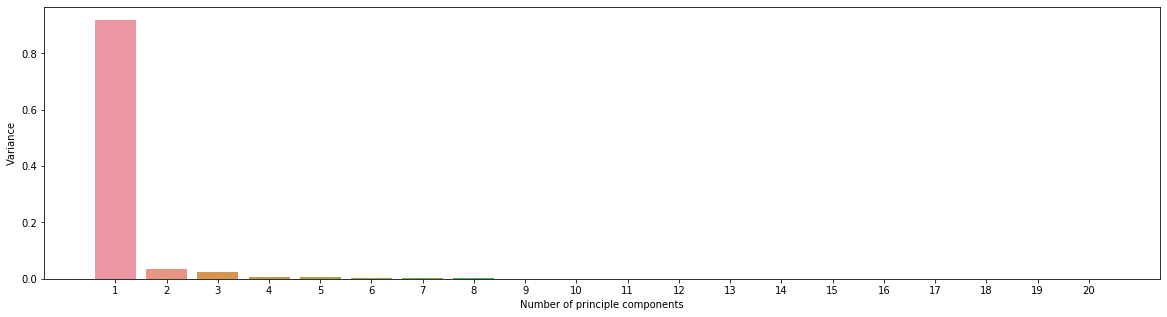

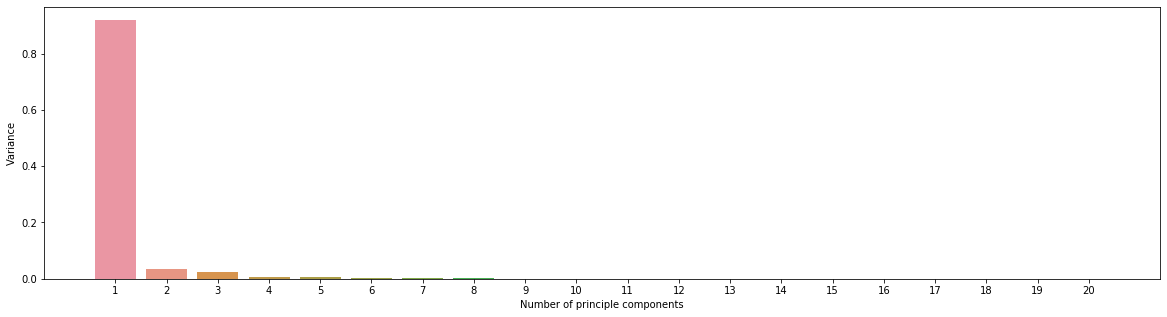

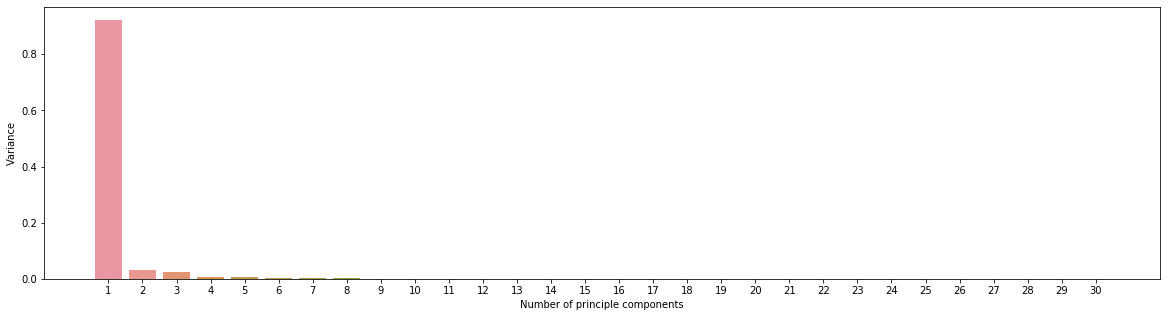

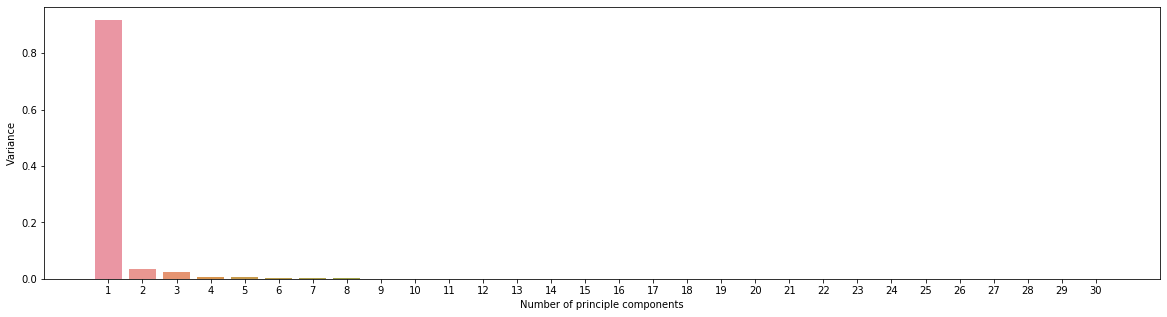

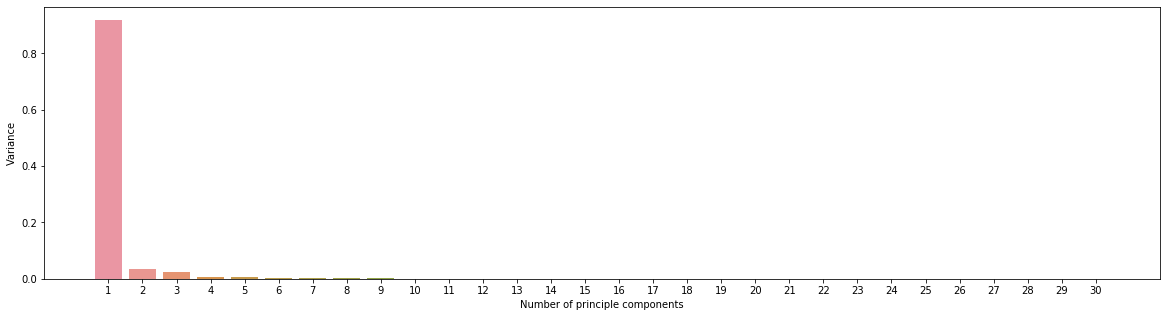

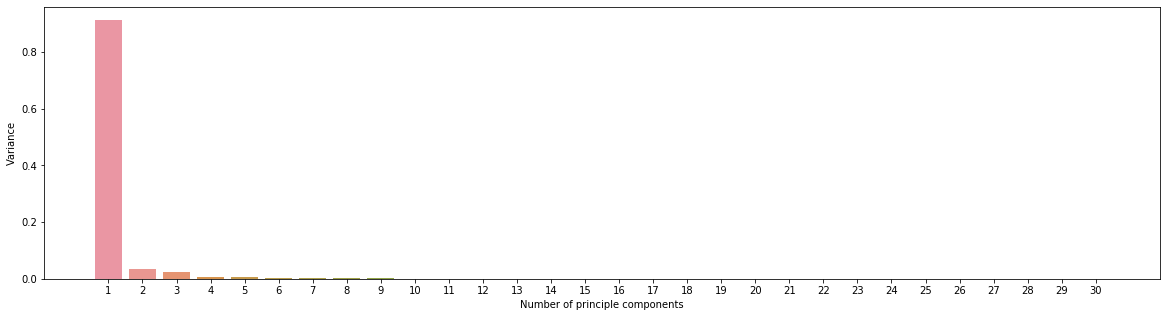

In [23]:
for i in range (0,3):
    for n in pcavalues:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
            X_train, X_test = preprocess_pca(X_train, X_test, n)
            print(X_train)   
            param_grid = {'n_neighbors': [3,5,10,15,50], 'n_jobs' : [-1],}
            KNN_GS = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, refit=True, verbose=0, scoring = score, n_jobs=-1)
            KNN_GS.fit(X_train,y_train)   
            y_pred = KNN_GS.predict(X_test)
            resultsKNN = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsKNN.insert(0,'KNN RUN ' + str(i+1) + " n_components = " + str(n) + " scoring = " + score + " ")
            resultsKNN.pop(4)
            resultsKNN.insert(4, KNN_GS.score(X_train, y_train))
            resultsKNN.insert(5, KNN_GS.score(X_test, y_test))


            KNN_dataframe = pd.DataFrame([resultsKNN], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([KNN_dataframe])
            print("The best estimator for RUN " + str(i+1) + " n_components = " + str(n) + " scoring = " + score + " " + str(KNN_GS.best_estimator_))
            print("The Confusion matrix for RUN" + str(i+1) + " n_components=" + str(n) + " scoring = " + score + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))

In [24]:
print('The parameters combination that would give best accuracy is : ')
print(KNN_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'n_jobs': -1, 'n_neighbors': 3}


In [25]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 n_components = 2 scoring = precision,0.478970,0.484402,0.424684,0.408935,0.413495
SVMLinear RUN 1 n_components = 2 scoring = recall,0.498307,0.498778,0.425312,0.789600,0.775578
SVMLinear RUN 1 n_components = 2 scoring = accuracy,0.508496,0.506450,0.442626,0.457426,0.457784
SVMLinear RUN 1 n_components = 2 scoring = f1,0.527576,0.518596,0.445982,0.539382,0.563656
SVMLinear RUN 1 n_components = 5 scoring = precision,0.550376,0.535935,0.468405,0.428876,0.438031
...,...,...,...,...,...
KNN RUN 3 n_components = 20 scoring = f1,0.563786,0.562934,0.563232,0.734188,0.467005
KNN RUN 3 n_components = 30 scoring = precision,0.579728,0.556305,0.541684,0.642984,0.536145
KNN RUN 3 n_components = 30 scoring = recall,0.580798,0.581160,0.580952,0.707829,0.515924


 # Naive Bayes

[[-6.58096785e+09 -4.79694087e+09]
 [-1.69806715e+09  1.39866078e+10]
 [-1.59022763e+10 -5.97806360e+08]
 ...
 [-1.26391518e+10  7.43765514e+08]
 [-4.33044741e+09 -3.31359510e+09]
 [-1.49984410e+10  2.43863882e+08]]
The best estimator for RUN 1 n_components = 2 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1 n_components = 2 scoring = precision is 

[[[ 21 278]
  [ 38 421]]

 [[421  38]
  [278  21]]]
None
[[-1.47275139e+10 -4.39127068e+08]
 [-1.51989833e+10 -6.44905429e+08]
 [ 3.05184300e+10 -5.32632991e+09]
 ...
 [-3.73327238e+09  7.36481453e+08]
 [-1.53229332e+10 -6.44736340e+08]
 [-1.02596375e+10  2.25854822e+09]]
The best estimator for RUN 1 n_components = 2 scoring = recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1 n_components = 2 scoring = recall is 

[[[ 27 277]
  [ 34 420]]

 [[420  34]
  [277  27]]]
None
[[-1.53613073e+10 -6.30386157e+08]
 [-1.53938358e+10 -7.28167820e+08]
 [-1.53345232e+10 -6.83796

C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best estimator for RUN 1 n_components = 2 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1 n_components = 2 scoring = f1 is 

[[[ 22 304]
  [ 12 420]]

 [[420  12]
  [304  22]]]
None
[[-7.67166492e+09  3.24315304e+09  1.97023664e+09 -9.94594621e+08
   9.61999716e+08]
 [-1.18380168e+10  9.29543726e+08 -5.93982460e+08 -9.28875541e+07
   4.79901133e+08]
 [-1.53594412e+10 -7.40242129e+08  1.00201579e+09 -1.80638543e+08
   1.57657099e+08]
 ...
 [-1.28115058e+09  1.50722096e+10 -5.28483611e+09 -7.92290452e+09
  -2.71685214e+09]
 [-1.53239205e+10 -9.17100135e+08  1.07642775e+09 -1.71992029e+08
   7.19032852e+07]
 [-3.49928361e+09  3.27485447e+09  8.11149496e+08  6.97114569e+06
   1.27836524e+09]]
The best estimator for RUN 1 n_components = 5 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1 n_components = 5 scoring = precision is 

[[[ 32 276]
  [ 48 402]]

 [[402  48]
  [276  32]]]
None
[[-1.56694674e+10 -8

C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best estimator for RUN 1 n_components = 5 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN1 n_components = 5 scoring = accuracy is 

[[[  0 306]
  [  0 452]]

 [[452   0]
  [306   0]]]
None
[[-1.25816453e+10 -2.60285657e+09 -3.61321996e+08 -9.58139219e+08
   4.80137860e+08]
 [-8.25330031e+09  9.61333718e+08 -7.34530513e+08  1.40262915e+08
  -6.73510509e+08]
 [-1.38239687e+10 -9.36819833e+08  9.59799920e+08  3.01093007e+08
  -3.45316921e+07]
 ...
 [-1.23982537e+10 -9.64657457e+07 -1.70066521e+07  3.22027075e+08
   1.02546338e+09]
 [-1.46631802e+10 -7.71944178e+08  1.60604876e+09 -1.43212977e+08
  -6.20026170e+08]
 [ 3.29329750e+08 -3.91342880e+09 -1.85813719e+09  4.05968521e+09
  -1.45321173e+09]]
The best estimator for RUN 1 n_components = 5 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1 n_components = 5 scoring = f1 is 

[[[ 16 294]
  [  6 442]]

 [[442   6]
  [294  16]]]
None
[[-1.54919228e+10 -7.01856

C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best estimator for RUN 1 n_components = 10 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1 n_components = 10 scoring = f1 is 

[[[239  61]
  [363  95]]

 [[ 95 363]
  [ 61 239]]]
None
[[-2.95513091e+08 -2.11723616e+09 -2.19539813e+09 ... -4.37318757e+08
  -2.70881194e+08 -3.41773933e+08]
 [-9.96868583e+09 -2.00435199e+09  1.62842946e+09 ... -5.60341578e+06
  -4.73320963e+06 -4.61142930e+07]
 [ 7.64167938e+09 -3.83796927e+09 -4.77332287e+09 ...  6.69758971e+08
   5.28607745e+08  2.69291460e+08]
 ...
 [-1.57844155e+10 -6.43240780e+08  1.24828144e+09 ...  1.48864442e+06
   1.18746965e+07 -5.27758311e+07]
 [-1.52026865e+10 -1.20105547e+08  9.24796709e+08 ... -9.54381642e+06
  -1.26066151e+07  5.29041766e+07]
 [-1.54677320e+10 -6.96293975e+08  1.18881787e+09 ...  7.73216261e+05
   7.18738730e+06 -5.12884148e+07]]
The best estimator for RUN 1 n_components = 20 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for R

C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best estimator for RUN 1 n_components = 20 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN1 n_components = 20 scoring = accuracy is 

[[[  0 311]
  [  0 447]]

 [[447   0]
  [311   0]]]
None
[[-1.10829017e+10  1.47065939e+09 -3.84415658e+08 ...  5.52109538e+07
  -2.03939094e+07 -3.67385753e+07]
 [-1.42376013e+10  5.37780632e+08  8.61106853e+08 ...  2.90650519e+07
   6.00790773e+07 -5.37776769e+07]
 [-3.98529812e+09 -1.96610873e+09 -8.52236368e+08 ... -2.78206305e+07
   1.02438902e+08 -2.98164494e+07]
 ...
 [-1.38171557e+10  4.13785758e+08  1.10049704e+09 ... -3.40145764e+07
   1.58635339e+07 -5.93150687e+06]
 [ 6.39708619e+08 -1.63855675e+09  3.90274220e+09 ... -3.02347922e+08
  -3.01385650e+08  8.84419889e+05]
 [-1.54460958e+10 -4.36183259e+08  1.20242584e+09 ...  5.41572929e+06
  -6.80736682e+06 -4.74824362e+07]]
The best estimator for RUN 1 n_components = 20 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for 

C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best estimator for RUN 1 n_components = 30 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN1 n_components = 30 scoring = accuracy is 

[[[  0 311]
  [  0 447]]

 [[447   0]
  [311   0]]]
None
[[-1.28579179e+10 -1.13670957e+09  1.36250391e+09 ... -9.15217741e+05
   1.26188235e+02 -3.13105371e+02]
 [-2.69304327e+09 -4.17884201e+09 -1.47614445e+09 ... -6.66032166e+06
  -1.93164833e+01  1.44843736e+00]
 [-1.53263742e+10 -6.01693512e+08  1.15571035e+09 ... -8.03046338e+05
  -5.07628328e+01  3.02312101e+01]
 ...
 [ 9.56330797e+10  3.02268415e+10  6.54609784e+10 ...  1.01361865e+07
   3.33931698e+01  3.65175534e+01]
 [-1.53107892e+10 -6.76703882e+08  1.24797174e+09 ... -6.18399321e+05
   3.00760438e+02 -3.23602395e+02]
 [-1.44254484e+10 -7.88548142e+07  5.61073296e+08 ... -2.94167395e+05
  -1.91730306e+01  2.28997089e+01]]
The best estimator for RUN 1 n_components = 30 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for 

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 2 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 n_components = 2 scoring = precision is 

[[[ 13 288]
  [ 14 443]]

 [[443  14]
  [288  13]]]
None
[[-1.54059746e+10 -6.12044788e+08]
 [ 3.02928496e+09  3.00492518e+08]
 [-1.39197233e+10 -7.14057291e+08]
 ...
 [-1.02694397e+10  1.53704329e+09]
 [-1.55342583e+10 -4.71146680e+08]
 [-1.20244094e+09  2.17542625e+10]]
The best estimator for RUN 2 n_components = 2 scoring = recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 n_components = 2 scoring = recall is 

[[[ 15 307]
  [ 12 424]]

 [[424  12]
  [307  15]]]
None
[[-3.06816524e+09 -2.71070507e+09]
 [-7.92537246e+09  2.58823373e+09]
 [-5.53225121e+09  2.90101804e+08]
 ...
 [-1.55621437e+10 -9.74802002e+08]
 [ 7.67381999e+09 -1.28291568e+09]
 [-4.99783728e+09  2.66106363e+09]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.ma

The best estimator for RUN 2 n_components = 2 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN2 n_components = 2 scoring = accuracy is 

[[[  0 326]
  [  0 432]]

 [[432   0]
  [326   0]]]
None
[[-7.72901085e+07  6.32947928e+09]
 [-1.57356391e+10 -7.24996414e+08]
 [-1.30097670e+10 -1.39801969e+09]
 ...
 [-1.52217574e+10 -2.25502024e+08]
 [-1.16963527e+10 -6.84876140e+08]
 [-6.95875060e+09  1.83725457e+09]]
The best estimator for RUN 2 n_components = 2 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 n_components = 2 scoring = f1 is 

[[[ 19 273]
  [ 33 433]]

 [[433  33]
  [273  19]]]
None
[[-3.26494828e+09  4.72748587e+09 -2.35807050e+09 -8.54494404e+08
   7.60796909e+08]
 [-9.61545291e+09  1.93019874e+09  2.54230264e+09 -4.30489107e+08
  -1.41931481e+09]
 [-1.51603858e+10 -1.05628663e+09  1.08874346e+09 -1.83718600e+08
  -1.44439834e+08]
 ...
 [-5.99937119e+09 -3.02027900e+09 -1.19520638e+09  3.15971066e+09


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 n_components = 5 scoring = precision is 

[[[ 17 292]
  [ 20 429]]

 [[429  20]
  [292  17]]]
None
[[-1.25013801e+10 -9.06583284e+08  5.44740403e+08  1.45873850e+08
  -2.18014859e+09]
 [-5.33638985e+09  8.24467300e+08 -8.28410567e+08 -5.37813861e+07
  -1.23098322e+09]
 [-6.04600711e+09 -2.74515616e+09  1.59430021e+09 -7.89914304e+08
   1.85588140e+08]
 ...
 [-1.30288327e+10 -7.93565478e+08  9.69278331e+08 -4.39424234e+08
  -8.84812245e+07]
 [-8.87960242e+07  4.59680769e+09  3.97139003e+09  4.52307305e+08
  -3.31881053e+09]
 [-1.51998804e+10 -7.24688804e+08  1.17252390e+09 -1.87642383e+08
  -1.24150926e+08]]
The best estimator for RUN 2 n_components = 5 scoring = recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 n_components = 5 scoring = recall is 

[[[ 21 282]
  [ 20 435]]

 [[435  20]
  [282  21]]]
None
[[-1.5759045

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.ma


The best estimator for RUN 2 n_components = 5 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN2 n_components = 5 scoring = accuracy is 

[[[  0 300]
  [  0 458]]

 [[458   0]
  [300   0]]]
None
[[-1.49297351e+10 -8.33309884e+08  1.14088826e+09 -2.53280202e+08
  -1.14716586e+08]
 [-8.72675342e+09 -1.35154293e+06  3.34789621e+08  1.82951679e+08
  -2.32777184e+08]
 [-1.52707148e+10 -6.67821168e+08  1.10086175e+09 -2.53442233e+08
  -1.39736283e+08]
 ...
 [-1.54046610e+10 -7.58205396e+08  1.20066450e+09 -2.13129139e+08
   1.40263096e+07]
 [ 1.70958474e+11  5.78254401e+09 -7.37228895e+09  2.38260742e+09
   1.36873955e+09]
 [ 4.25736138e+10  2.51045044e+10 -1.26213380e+10 -6.40085876e+09
   4.75791187e+09]]
The best estimator for RUN 2 n_components = 5 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 n_components = 5 scoring = f1 is 

[[[ 22 270]
  [ 19 447]]

 [[447  19]
  [270  22]]]
None
[[ 1.24930286e+10  4.5758

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[-1.45260702e+10 -5.96687041e+08  9.29128427e+08 ... -1.30531358e+08
   8.65961434e+07  6.87484424e+06]
 [-9.69309463e+09 -1.29190345e+09 -2.67592747e+07 ...  1.43301281e+08
  -2.68208742e+07  2.34347092e+08]
 [-8.07691676e+09 -2.09157943e+09  1.73781201e+09 ... -8.26731180e+07
   1.93132173e+07  3.77673713e+07]
 ...
 [-1.49046810e+10 -6.04853480e+08  1.02848837e+09 ...  3.00748159e+08
   2.93403101e+07  1.05692477e+07]
 [-1.46918641e+10 -7.48978723e+08  1.13648879e+09 ... -9.47883094e+07
   5.69737854e+07 -3.12994134e+07]
 [-1.32977988e+10  1.04969084e+09  7.18999280e+08 ... -5.25019246e+08
  -1.44729591e+08 -1.14084964e+08]]
The best estimator for RUN 2 n_components = 10 scoring = recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 n_components = 10 scoring = recall is 

[[[ 20 278]
  [ 35 425]]

 [[425  35]
  [278  20]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.ma

[[-1.54412608e+10 -5.17332409e+08  1.26977982e+09 ... -5.96280106e+07
   1.46781174e+08  1.36888592e+07]
 [ 1.14956924e+09  1.35292535e+09 -3.64117425e+09 ... -1.67431521e+08
   6.48099442e+07 -9.03353099e+07]
 [-7.36664803e+09  5.39595845e+08 -1.64887408e+09 ...  1.02225750e+08
   2.32821204e+08 -6.34860500e+07]
 ...
 [-1.26720183e+10 -6.58432472e+08  3.39971625e+08 ...  3.32725105e+07
   2.93167156e+07  4.25510144e+07]
 [-1.54471470e+10 -5.91623845e+08  1.31700845e+09 ...  9.66401565e+07
   6.99916150e+07  7.35518731e+07]
 [-5.49447078e+09 -9.44132784e+08  2.95905358e+08 ...  4.05901361e+08
  -2.71385090e+08  5.56316309e+07]]
The best estimator for RUN 2 n_components = 10 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN2 n_components = 10 scoring = accuracy is 

[[[  0 315]
  [  0 443]]

 [[443   0]
  [315   0]]]
None
[[ 3.11693936e+10 -5.36551792e+09 -8.87180128e+09 ...  3.07327960e+08
  -7.14632275e+08 -3.95883835e+08]
 [-1.55292731e+10 -4.589

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 n_components = 20 scoring = precision is 

[[[277  34]
  [361  86]]

 [[ 86 361]
  [ 34 277]]]
None
[[-1.39084881e+10 -6.12357240e+08  1.00017954e+09 ... -1.76346719e+07
  -1.87864343e+07  3.08559177e+07]
 [-1.52334799e+10 -4.66163582e+08  1.18180727e+09 ...  4.53935249e+06
  -2.58760893e+06  5.06670532e+07]
 [-5.87805128e+09 -1.47079549e+09  7.27908984e+08 ... -1.14169859e+07
  -1.01386209e+07  3.11822902e+07]
 ...
 [ 3.54770286e+10 -1.27497981e+10 -1.06263102e+10 ... -1.97214097e+08
   3.67574378e+07  2.78942002e+08]
 [-1.52603271e+10 -5.06671062e+08  1.24899703e+09 ... -4.15217732e+06
   8.96835714e+05  1.15021144e+07]
 [ 9.77128830e+10 -1.27369490e+10 -1.49748238e+10 ... -3.46143549e+08
  -9.35993705e+07 -1.49474065e+09]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20 scoring = recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 n_components = 20 scoring = recall is 

[[[259  48]
  [367  84]]

 [[ 84 367]
  [ 48 259]]]
None
[[-9.27857223e+09  3.08307524e+08  6.04694565e+08 ...  1.95868987e+07
  -9.67387664e+07  1.11814246e+08]
 [-1.53174242e+10 -6.37199826e+08  1.16292226e+09 ... -6.26779859e+06
  -1.72009045e+06 -4.48687085e+07]
 [-1.26599747e+10 -2.30716441e+08  7.00708738e+08 ... -4.39244053e+07
   3.41048959e+07 -2.84376080e+07]
 ...
 [ 6.36206002e+09 -4.96426722e+09 -3.69550851e+09 ...  2.32484988e+08
  -1.16943714e+08 -5.27852615e+06]
 [-1.52760500e+10 -6.62102458e+08  1.15936702e+09 ... -5.27803136e+06
  -3.25427476e+06 -4.92613579e+07]
 [-1.53366710e+10 -6.49832891e+08  1.18076583e+09 ... -8.62403111e+06
   1.86349463e+07  1.81578315e+07]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.ma

The best estimator for RUN 2 n_components = 20 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN2 n_components = 20 scoring = accuracy is 

[[[  0 320]
  [  0 438]]

 [[438   0]
  [320   0]]]
None
[[-1.53168675e+10 -5.95644455e+08  1.24211850e+09 ...  1.49499913e+06
  -9.29280832e+06 -4.32980438e+07]
 [-1.45178916e+10 -3.04390992e+08  8.70712216e+08 ... -1.10539905e+07
   8.91093735e+06 -1.01264498e+08]
 [-1.52145417e+10 -2.69777049e+08  9.16660481e+08 ... -8.23498266e+06
   2.66057167e+06  6.60004116e+06]
 ...
 [-1.56416700e+10 -5.08573078e+08  1.19472099e+09 ...  1.57116455e+05
  -3.99370983e+06 -4.42817028e+07]
 [-1.55293021e+10 -4.77122641e+08  1.16801181e+09 ...  1.93039939e+06
  -1.06080991e+07 -2.87780238e+07]
 [-1.44620769e+10 -7.35841458e+08  1.33132160e+09 ... -9.67209758e+06
  -6.00791132e+06 -4.33044670e+07]]
The best estimator for RUN 2 n_components = 20 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for 

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 n_components = 30 scoring = precision is 

[[[260  46]
  [380  72]]

 [[ 72 380]
  [ 46 260]]]
None
[[-1.46693650e+10  2.30748662e+08  6.11552790e+08 ... -1.06338320e+06
  -2.21942189e+01  3.14447381e+01]
 [-7.63708089e+09 -1.63251992e+09 -9.98854794e+08 ...  2.23989404e+06
  -5.35013287e+01 -4.33474614e+00]
 [-1.57647912e+10 -6.52986963e+08  1.17198503e+09 ... -5.21191553e+05
  -5.03144595e+01  2.99869411e+01]
 ...
 [-9.07721216e+09  1.77916411e+09 -4.70410001e+08 ... -2.55930482e+06
   2.71252550e+01  2.17197098e+00]
 [ 1.54555694e+11  1.68754877e+10  5.86552198e+09 ...  6.58792274e+06
  -2.47305593e+02 -1.12895251e+02]
 [-1.51006095e+10 -1.55744533e+08  1.02190626e+09 ... -1.31479303e+06
  -3.79566109e+01  2.99978881e+01]]


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30 scoring = recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 n_components = 30 scoring = recall is 

[[[254  60]
  [368  76]]

 [[ 76 368]
  [ 60 254]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[-1.40434587e+09  1.11639094e+10 -9.59275932e+09 ...  1.21845933e+07
  -8.62962860e+01 -1.58552933e+01]
 [-1.42535716e+10 -1.11571258e+09  1.13368549e+09 ... -1.30600096e+06
  -6.70415740e+00 -7.94514923e+01]
 [-1.46164366e+10 -6.53002836e+08  8.44651400e+08 ... -1.22740764e+06
  -2.70102784e+00  1.31166085e+01]
 ...
 [-1.40585803e+10  2.47967888e+08  3.50083984e+08 ... -1.67470950e+06
  -2.33961074e+01  3.25044345e+01]
 [-1.51914950e+10 -8.27428326e+08  1.11175899e+09 ... -1.29729271e+06
  -5.10187924e+01  2.95841210e+01]
 [-1.49884196e+10 -7.72607735e+08  1.09281383e+09 ... -6.35832388e+05
  -4.90658807e+01  2.82486190e+01]]
The best estimator for RUN 2 n_components = 30 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN2 n_components = 30 scoring = accuracy is 

[[[  0 309]
  [  0 449]]

 [[449   0]
  [309   0]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[-1.43241794e+10 -4.35125250e+08  7.96093325e+08 ... -1.16251924e+06
  -3.19417810e+01  2.42925929e+01]
 [-4.29812397e+09  2.06292417e+09 -2.55592019e+09 ... -4.75965064e+06
   4.10958904e+01 -3.39500548e+00]
 [ 2.89519410e+10 -5.68557560e+09  3.19231656e+08 ...  7.53764832e+06
  -4.67935453e+01 -3.20796339e+01]
 ...
 [-1.42830930e+10  1.75622754e+08  7.54106452e+08 ... -1.02563005e+06
  -3.15745560e+01  2.77425629e+01]
 [-1.45025863e+10 -1.72406959e+08  8.70884921e+08 ... -1.24527063e+06
   1.94428853e+01  1.66413299e+01]
 [-1.44959858e+10 -3.26987522e+08  1.27641757e+09 ... -6.63247193e+05
  -1.31188607e+01  2.70473958e+01]]
The best estimator for RUN 2 n_components = 30 scoring = f1GaussianNB(priors=None, var_smoothing=2e-09)
The Confusion matrix for RUN2 n_components = 30 scoring = f1 is 

[[[273  49]
  [345  91]]

 [[ 91 345]
  [ 49 273]]]
None
[[ 1.62604015e+11 -1.63391917e+10]
 [-1.57350376e+10 -5.64756982e+08]
 [ 1.64723437e+11 -1.05132492e+10]
 ...
 [ 1.69709844e+11  4.572028

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':



The best estimator for RUN 3 n_components = 2 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 2 scoring = precision is 

[[[ 19 299]
  [ 15 425]]

 [[425  15]
  [299  19]]]
None
[[-1.42447524e+10  3.67823129e+08]
 [-1.55494880e+10 -7.35839592e+08]
 [ 6.34633778e+08 -2.46092135e+09]
 ...
 [-1.55579635e+10 -7.45207905e+08]
 [-4.03644447e+09  3.33650625e+09]
 [-1.54932030e+10 -7.08760478e+08]]
The best estimator for RUN 3 n_components = 2 scoring = recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 2 scoring = recall is 

[[[ 15 290]
  [ 20 433]]

 [[433  20]
  [290  15]]]
None
[[-1.55016396e+10 -5.01109919e+08]
 [-1.53998134e+10 -4.44459303e+08]
 [-1.51503359e+10 -6.41328688e+08]
 ...
 [-1.55795100e+10 -5.31235715e+08]
 [-1.56002468e+10 -5.89816654e+08]
 [-4.45537805e+09  1.42631908e+09]]
The best estimator for RUN 3 n_components = 2 scoring = accuracyGaussianNB(priors=None, var_smo

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.ma

The best estimator for RUN 3 n_components = 2 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 2 scoring = f1 is 

[[[ 12 281]
  [ 13 452]]

 [[452  13]
  [281  12]]]
None
[[-1.56180181e+10 -5.23983051e+08  1.32574663e+09 -2.58789192e+08
   2.15589776e+07]
 [-1.29806457e+10 -3.73987057e+08  3.26768525e+08 -4.85442544e+08
   3.68053976e+07]
 [-1.54669118e+10 -3.85375572e+08  1.20949619e+09 -2.90643341e+08
  -2.59455156e+07]
 ...
 [-1.47172534e+10 -6.52944800e+08  1.24237568e+09  1.75494955e+08
   4.91948000e+08]
 [-1.34516898e+10  8.80813851e+08  3.46151752e+08 -6.20194202e+08
   1.07423175e+08]
 [-1.56641260e+10 -4.36998032e+08  1.30583869e+09 -2.88928946e+08
  -6.71885529e+07]]
The best estimator for RUN 3 n_components = 5 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 5 scoring = precision is 


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':



[[[ 19 295]
  [ 25 419]]

 [[419  25]
  [295  19]]]
None
[[ 1.05504956e+11 -2.12653935e+10 -3.17420785e+07 -9.99626709e+09
   1.80919890e+09]
 [ 1.68790822e+10 -1.34138651e+09 -8.32215025e+09  9.21936961e+09
   2.13443521e+09]
 [-7.23348231e+09 -2.03352941e+09 -1.80188884e+09  3.45468741e+09
   1.73582477e+09]
 ...
 [-1.13144129e+10 -1.70888219e+09  1.20527533e+09 -4.39415231e+08
   5.28484123e+06]
 [-1.14909523e+10  1.27735157e+09 -5.70663952e+08 -6.33088723e+08
   2.61897586e+08]
 [-1.45322737e+10 -1.95681040e+08  7.65462051e+08 -4.07134873e+08
   3.12776035e+07]]
The best estimator for RUN 3 n_components = 5 scoring = recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 5 scoring = recall is 

[[[ 17 306]
  [ 22 413]]

 [[413  22]
  [306  17]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[ 2.22212923e+10 -8.30352625e+09  4.58973401e+09 -1.53139849e+09
  -1.83866683e+09]
 [-1.39067828e+10  3.29888228e+07  2.70139557e+08 -2.56752845e+08
   7.89544497e+08]
 [-4.13282851e+09  4.29266156e+09 -1.42153065e+09 -7.17765919e+08
   2.15485206e+09]
 ...
 [ 3.28539688e+10  1.11085827e+10 -1.35040838e+10 -1.64423987e+08
   1.18791360e+09]
 [-1.49078254e+10 -1.47682387e+08  9.01053871e+08 -3.54990644e+08
  -3.12359478e+07]
 [-1.40620003e+10 -8.01286312e+08  1.39818088e+09 -2.92644058e+08
  -3.15550662e+07]]
The best estimator for RUN 3 n_components = 5 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN3 n_components = 5 scoring = accuracy is 

[[[  0 320]
  [  0 438]]

 [[438   0]
  [320   0]]]
None
[[-1.10663353e+09  6.90959590e+09 -1.20555103e+09 -2.76652388e+08
  -1.91683986e+09]
 [-1.45909350e+10 -7.10677468e+08  1.16919840e+09 -1.32477536e+08
  -2.56899637e+08]
 [-1.37660689e+10  9.17703574e+07  6.27698544e+08 -2.55186288e+08
  -5.70599585e+

C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.ma

The best estimator for RUN 3 n_components = 5 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 5 scoring = f1 is 

[[[ 15 295]
  [ 10 438]]

 [[438  10]
  [295  15]]]
None
[[-7.76292723e+09  6.97447319e+09 -6.30303309e+09 ... -4.04582919e+08
   1.17905633e+08 -1.28875094e+09]
 [ 2.11026317e+10  5.61988840e+09 -1.01207948e+10 ... -1.32774678e+09
   1.01194698e+09 -3.70396254e+08]
 [-4.04659333e+09 -2.98451472e+09  2.25770916e+09 ... -3.22100181e+08
  -5.44057634e+07 -1.14642026e+07]
 ...
 [ 4.47805886e+10 -5.01565353e+09 -7.54095886e+08 ...  1.96898129e+09
  -2.16481666e+07 -2.46353568e+09]
 [-1.54441798e+10 -4.74558117e+08  1.21385483e+09 ...  3.32993863e+07
   6.36187854e+07 -3.73034779e+07]
 [ 1.36108402e+09 -4.04210405e+09  2.34797242e+09 ... -6.25208849e+08
  -2.57786609e+08  1.52519499e+07]]
The best estimator for RUN 3 n_components = 10 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':



The Confusion matrix for RUN3 n_components = 10 scoring = precision is 

[[[ 25 283]
  [ 38 412]]

 [[412  38]
  [283  25]]]
None
[[-1.56811958e+10 -5.78964319e+08  1.22289209e+09 ... -7.54875274e+07
   1.62089155e+08  5.06261181e+07]
 [ 7.08190810e+09  2.76307733e+09 -3.95318439e+09 ...  9.18929694e+07
   3.42542511e+07  3.49205626e+08]
 [-1.49377104e+10 -1.47756748e+08  8.09048810e+08 ... -1.90246131e+08
   6.51992708e+07  6.75458605e+07]
 ...
 [-1.32509031e+10  9.15779956e+08 -1.70455706e+07 ...  2.59644484e+08
   1.22695878e+08  1.43257650e+08]
 [-1.39217503e+10  9.40231675e+08  9.43518798e+08 ... -8.49522021e+06
  -1.99857448e+08 -1.57870982e+08]
 [ 5.46973654e+10  2.47843023e+10 -2.65363403e+10 ...  1.75285285e+09
  -2.12491489e+09 -3.80819606e+09]]
The best estimator for RUN 3 n_components = 10 scoring = recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 10 scoring = recall is 

[[[ 25 272]
  [ 49 412]]

 [[412  49]
  [272  25]]]
Non

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best estimator for RUN 3 n_components = 10 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN3 n_components = 10 scoring = accuracy is 

[[[  0 311]
  [  0 447]]

 [[447   0]
  [311   0]]]
None
[[-1.23264015e+10 -9.72102783e+08  4.06058621e+08 ... -7.75413369e+08
  -6.99067020e+07  5.09181201e+07]
 [-1.43289062e+10 -4.10833268e+08  7.34511043e+08 ... -2.35142136e+07
   1.11515403e+08 -5.07997882e+07]
 [-7.20496478e+09  5.45031565e+08  1.49808499e+09 ...  2.11345261e+08
  -4.00721334e+08  2.86959955e+08]
 ...
 [-1.44751098e+10 -9.16186240e+08  1.11612965e+09 ... -1.40778138e+08
   1.48595256e+08  4.47296238e+07]
 [-1.48925060e+10 -7.72119329e+08  1.04695078e+09 ... -2.14179716e+07
   1.07879696e+08  1.06139114e+08]
 [-9.90186391e+09  7.98197098e+08 -5.58061766e+08 ...  4.97327144e+08
   1.35090150e+08 -2.63577599e+08]]
The best estimator for RUN 3 n_components = 10 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for 

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[-2.85957202e+09  3.82476785e+09 -2.22013800e+09 ... -1.12550355e+09
   3.78360416e+08  3.58248145e+08]
 [-1.13692778e+10 -1.67426038e+09  3.72908674e+08 ...  4.36871888e+08
   1.98169127e+08  8.23238768e+07]
 [-1.28737849e+10  1.33752205e+09 -1.00079614e+09 ... -9.63347834e+06
   1.57012794e+06 -4.58981613e+07]
 ...
 [ 1.96326554e+10 -8.03111119e+09  5.74556034e+08 ... -4.27335389e+08
  -6.67161904e+07 -9.11293191e+07]
 [-1.55603259e+10 -3.80282004e+08  1.13240096e+09 ...  7.46057576e+06
  -1.87534870e+07 -4.98581896e+07]
 [ 1.43393215e+10  1.12710267e+10 -9.53055055e+09 ... -6.46350630e+08
  -3.79124564e+07  5.66302727e+08]]
The best estimator for RUN 3 n_components = 20 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 20 scoring = precision is 

[[[266  44]
  [370  78]]

 [[ 78 370]
  [ 44 266]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[ 9.70676167e+09 -5.53158684e+09 -9.50680914e+09 ...  2.88735072e+07
   1.28988157e+08 -5.41827818e+08]
 [-7.34969237e+09 -2.70575029e+09  1.45638275e+09 ...  1.62649316e+06
   2.31600519e+07  2.18651515e+07]
 [-1.07804231e+10  2.28347157e+09  7.60485066e+08 ...  3.70827368e+07
  -1.46148718e+07  3.44682561e+07]
 ...
 [-1.36825943e+10 -6.96345016e+08  8.44006007e+08 ... -4.96661151e+07
   1.44671315e+08 -4.66851027e+07]
 [-8.45002836e+09 -2.28396547e+09 -1.73426067e+08 ... -1.33541310e+08
  -4.09410185e+07  2.23737106e+07]
 [-1.53287000e+10 -8.35598455e+08  1.14570074e+09 ... -1.00207993e+07
   4.60037363e+06 -1.72004174e+07]]
The best estimator for RUN 3 n_components = 20 scoring = recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 20 scoring = recall is 

[[[274  29]
  [373  82]]

 [[ 82 373]
  [ 29 274]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[-1.56338029e+10 -6.54855612e+08  1.21087317e+09 ...  2.38245195e+06
  -7.62207052e+06 -4.88606034e+07]
 [-1.16032174e+09 -1.34425670e+10 -9.57570800e+09 ...  3.87574441e+08
  -3.28612988e+08  1.00148023e+08]
 [-1.21539077e+10 -3.93633061e+09 -1.32550435e+09 ...  4.41600462e+07
  -7.26881630e+07 -9.05781550e+06]
 ...
 [-1.56348997e+10 -6.78369296e+08  1.22075807e+09 ... -4.48616819e+06
  -5.02173607e+06  1.40369134e+07]
 [-1.55566689e+10 -6.49230924e+08  1.26411269e+09 ... -2.28110071e+07
   6.25955042e+06  4.14854046e+07]
 [-1.56373723e+10 -7.99632637e+08  1.32577822e+09 ... -2.03769002e+07
  -4.32876838e+06  1.93558995e+07]]
The best estimator for RUN 3 n_components = 20 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN3 n_components = 20 scoring = accuracy is 

[[[  0 294]
  [  0 464]]

 [[464   0]
  [294   0]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[-1.14609377e+10  1.14633694e+09 -1.45955100e+09 ...  1.24776956e+07
  -3.44017082e+07 -6.38746059e+07]
 [-1.29484643e+10 -1.01480456e+09  3.48336815e+08 ...  6.19192465e+07
   2.76566879e+07 -6.71333554e+06]
 [-1.56267375e+10 -7.80752958e+08  1.19465547e+09 ...  2.20137733e+06
  -1.79970531e+07 -4.17193896e+07]
 ...
 [-4.84524121e+09 -3.76604859e+08  3.35895739e+08 ...  1.32617099e+08
  -8.80298268e+08 -9.73173754e+06]
 [-1.02547552e+10 -1.06798546e+09  2.06351916e+09 ... -2.27701522e+07
   1.91282927e+07 -5.09328730e+06]
 [ 1.70627980e+11  5.54311212e+09 -8.15778938e+09 ...  4.07791853e+08
  -2.49631664e+08 -1.40655391e+09]]
The best estimator for RUN 3 n_components = 20 scoring = f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 20 scoring = f1 is 

[[[279  41]
  [351  87]]

 [[ 87 351]
  [ 41 279]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[-1.42330082e+10 -8.68634958e+08  1.28391187e+09 ... -1.03052437e+06
  -5.65679257e-01 -9.92951330e+01]
 [-1.49419056e+10 -3.36458962e+08  1.06044307e+09 ... -1.38981017e+06
  -4.13884729e+01  2.71483849e+01]
 [-1.53994071e+10 -6.09228575e+08  1.22734933e+09 ... -1.22876625e+06
   2.87681186e+02 -3.32641384e+02]
 ...
 [-1.32145911e+10  7.35205086e+08  1.77683571e+07 ... -1.63869645e+06
  -2.16854815e+01  1.74446520e+01]
 [-3.94353266e+09 -1.17530444e+10 -6.65164058e+09 ...  2.79319865e+06
   3.03341141e+00  1.34801474e+01]
 [-6.91334453e+09  5.14737921e+08  2.16837513e+09 ... -5.08826783e+06
  -2.19747056e+01  1.43676288e+01]]
The best estimator for RUN 3 n_components = 30 scoring = precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 30 scoring = precision is 

[[[258  50]
  [355  95]]

 [[ 95 355]
  [ 50 258]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[-8.46537741e+09  3.55004109e+09 -4.70387903e+08 ...  3.32695291e+06
  -3.53648309e+01  4.96653467e+00]
 [-1.16384529e+10  3.62942488e+08  7.95700021e+07 ... -1.07808945e+06
  -2.89310844e+01  2.24326883e+01]
 [-1.55111463e+10 -6.08942806e+08  1.20222294e+09 ... -1.09894602e+06
  -4.95009200e+01  3.35348435e+01]
 ...
 [-1.51524798e+10 -4.33166125e+08  1.16322760e+09 ... -9.00829018e+05
  -4.34893105e+01  2.75305276e+01]
 [ 3.67141089e+10 -1.77938786e+10  1.93421535e+09 ... -2.69210488e+06
   7.73836777e+01 -2.15978619e+02]
 [-1.07323945e+10 -1.28520230e+09  6.23161234e+08 ... -2.20735550e+06
  -2.75721033e+01 -7.24163844e+00]]
The best estimator for RUN 3 n_components = 30 scoring = recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 n_components = 30 scoring = recall is 

[[[261  56]
  [360  81]]

 [[ 81 360]
  [ 56 261]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[ 9.54594326e+10  3.16200045e+10  6.43779101e+10 ...  1.35298677e+07
   4.99792592e+01  2.45002363e+01]
 [-1.28493610e+10 -1.34845280e+09  6.70589720e+08 ...  7.32703965e+06
  -1.61212045e+01 -1.76428531e+01]
 [-8.19744420e+09 -2.97260554e+09 -2.14733507e+09 ... -2.24899761e+05
  -2.42852756e+00  2.35419144e+01]
 ...
 [-1.33704069e+10 -1.10545832e+09  1.46096617e+09 ...  4.32219893e+05
   4.65516892e+00 -1.05752439e+02]
 [-1.22603517e+10 -1.22264382e+08  5.13361225e+08 ... -2.62942543e+06
  -1.62486941e+01  1.12466548e+01]
 [ 1.10288502e+10 -3.27993627e+09 -1.52027080e+08 ... -2.24010363e+06
   1.18922702e+02 -1.90413004e+02]]
The best estimator for RUN 3 n_components = 30 scoring = accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN3 n_components = 30 scoring = accuracy is 

[[[  0 329]
  [  0 429]]

 [[429   0]
  [329   0]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[[-1.13466535e+10  1.46545485e+09 -3.32838213e+08 ... -2.21034799e+06
  -8.03600743e+00  1.73877555e+01]
 [ 5.08305003e+09  5.35537906e+08 -3.09170949e+09 ... -2.96494418e+06
  -6.00574716e+01 -2.01651559e+01]
 [ 2.11660508e+10 -2.99240708e+09  1.50031348e+09 ...  4.91677004e+06
   6.83769682e+00  1.68733100e+01]
 ...
 [-1.57861117e+10 -5.84370573e+08  1.28079373e+09 ... -1.04190820e+06
   2.91630986e+02 -3.33051707e+02]
 [ 5.01077830e+09  8.36901655e+09 -6.88374779e+09 ... -9.05254399e+06
  -1.68040895e+01 -1.63915685e+01]
 [-1.58409203e+10 -5.94404136e+08  1.28218422e+09 ... -7.99705615e+05
  -5.35209603e+01  3.08546108e+01]]
The best estimator for RUN 3 n_components = 30 scoring = f1GaussianNB(priors=None, var_smoothing=2e-09)
The Confusion matrix for RUN3 n_components = 30 scoring = f1 is 

[[[267  51]
  [357  83]]

 [[ 83 357]
  [ 51 267]]]
None


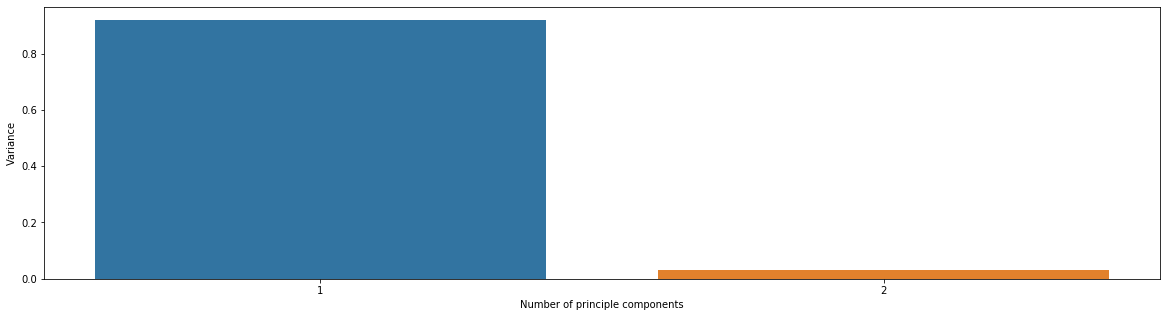

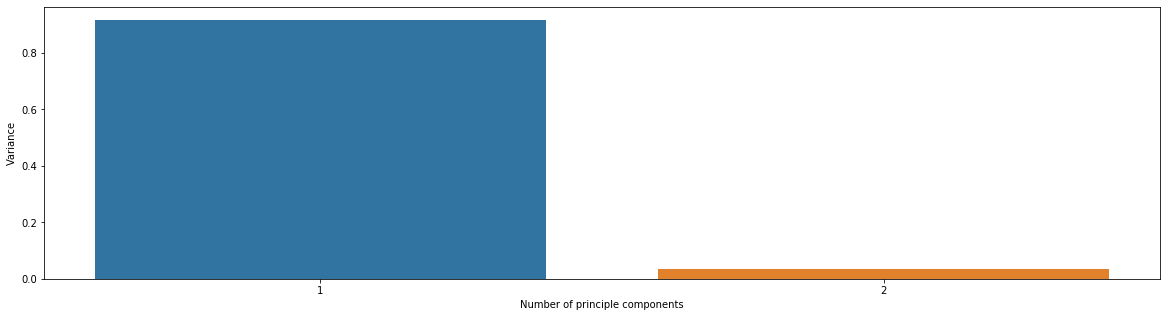

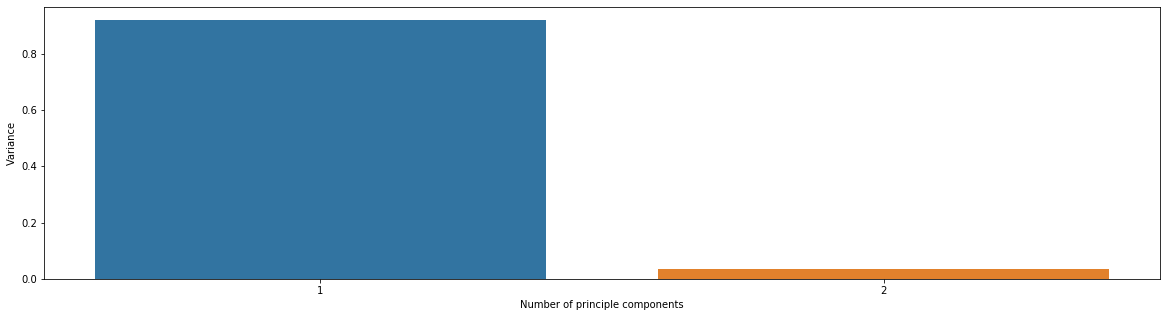

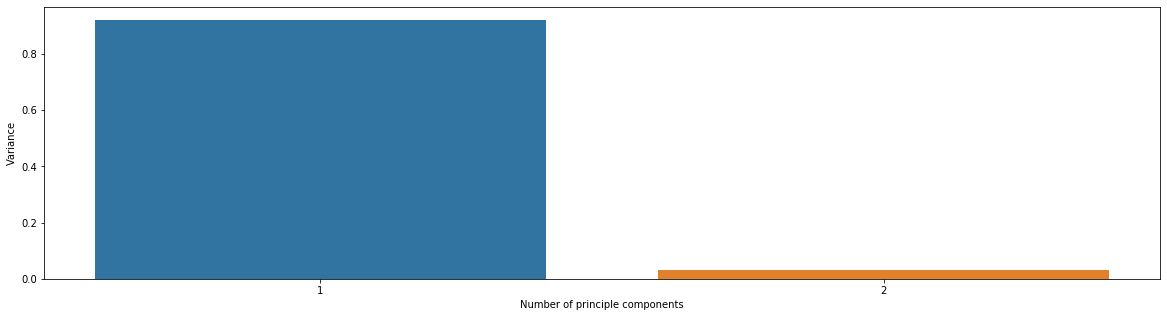

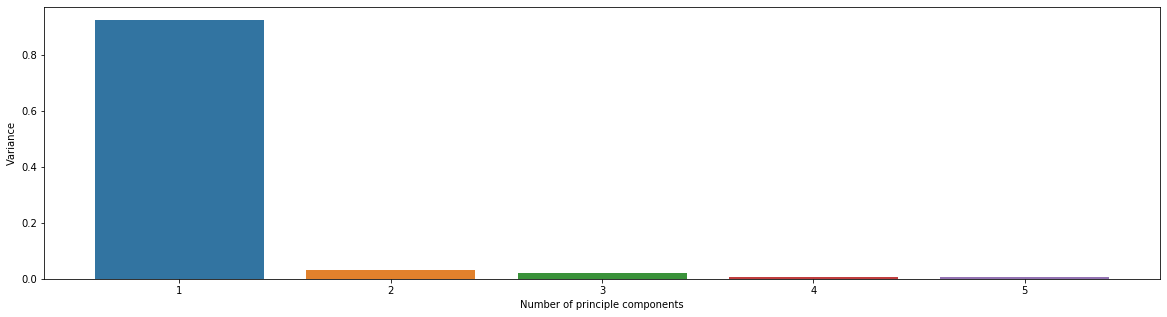

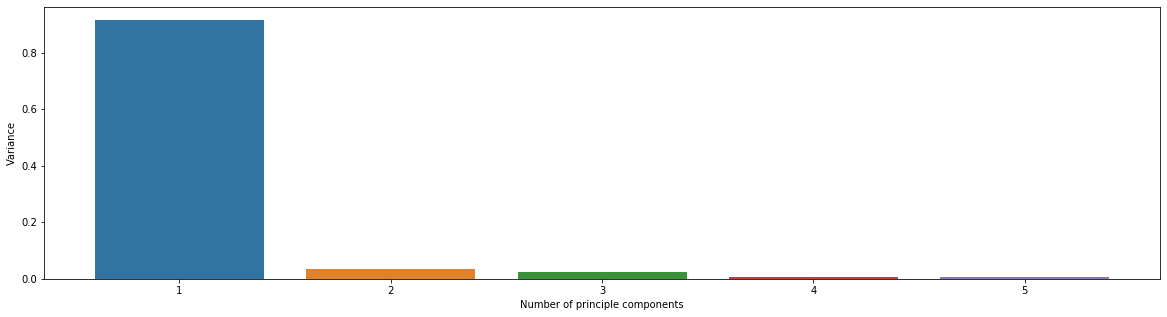

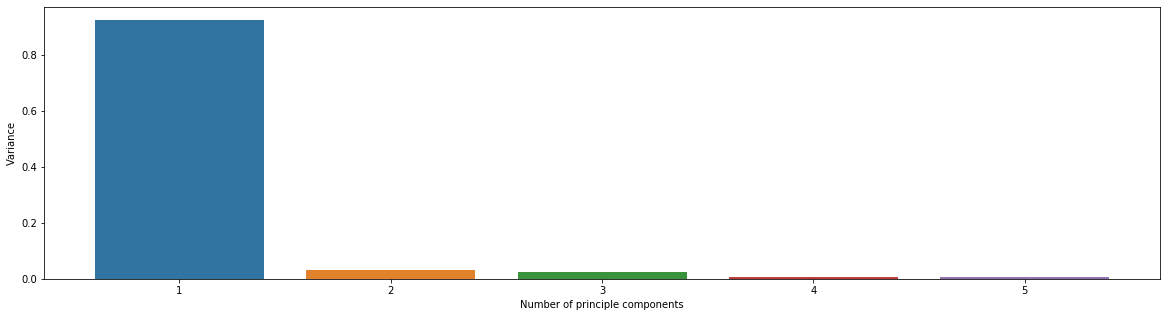

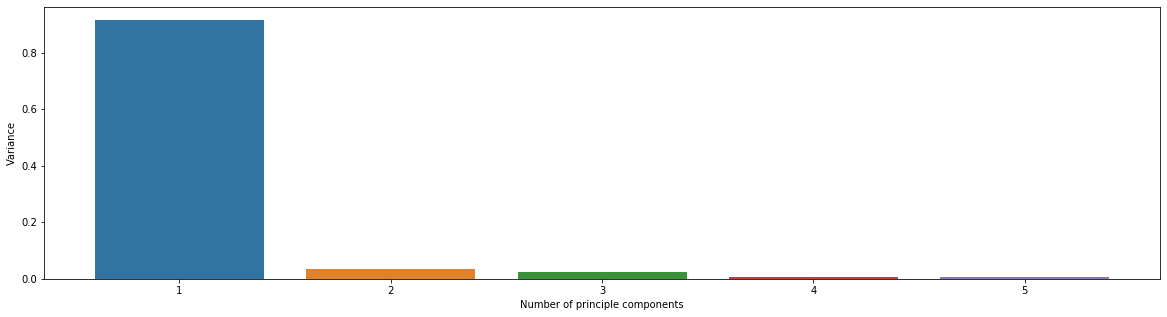

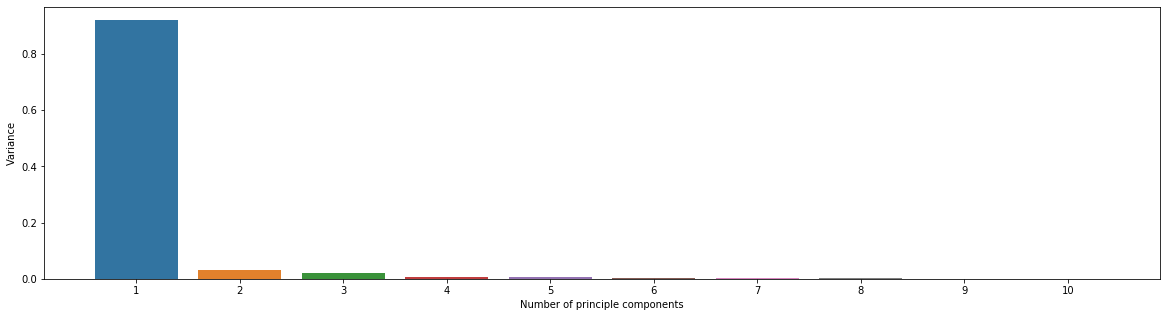

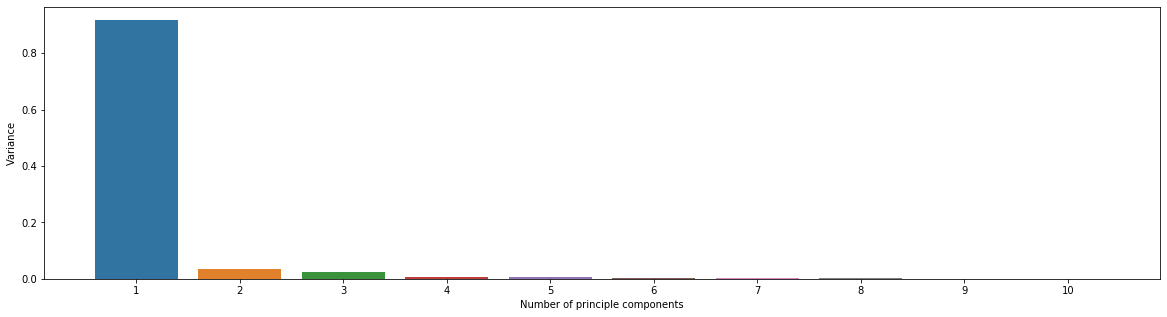

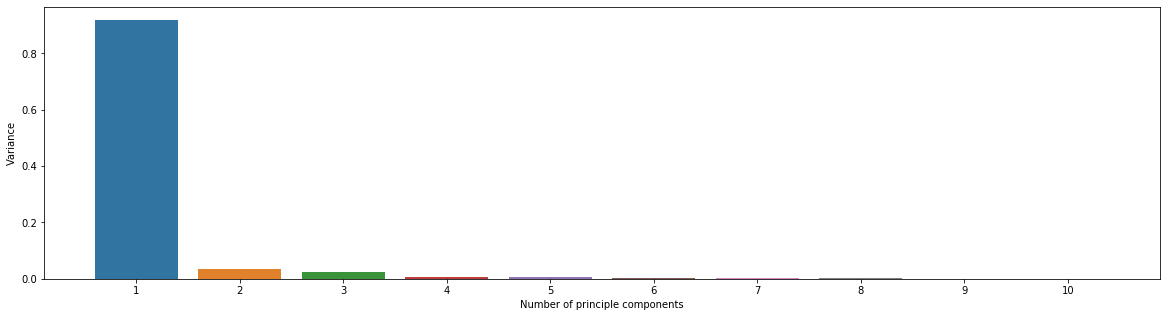

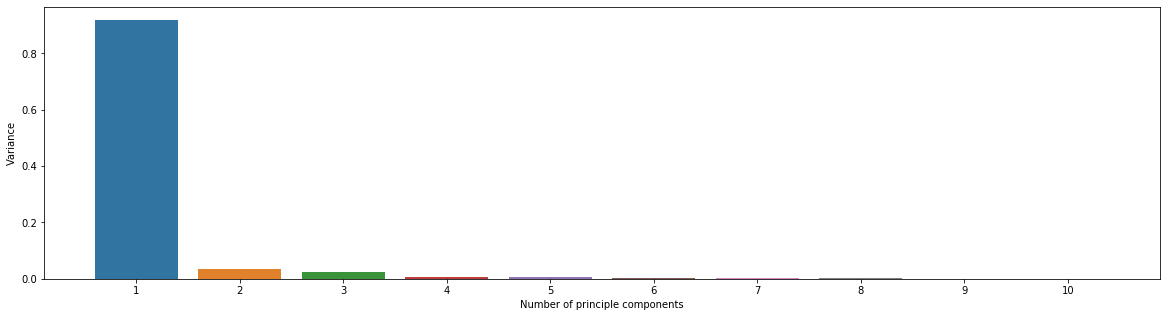

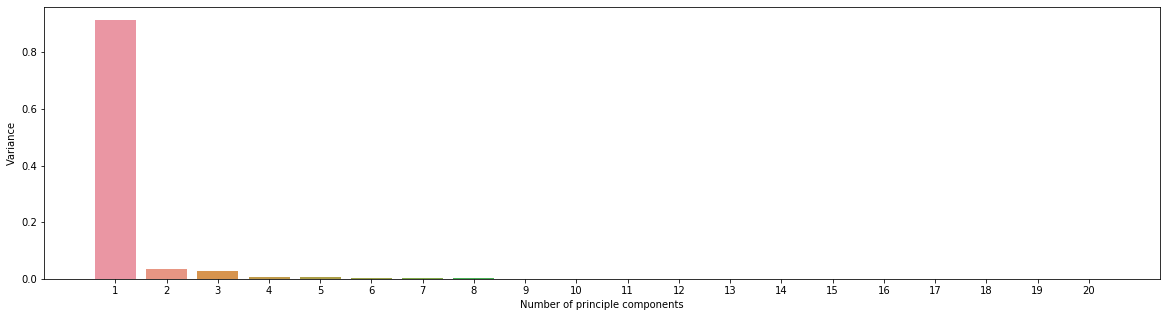

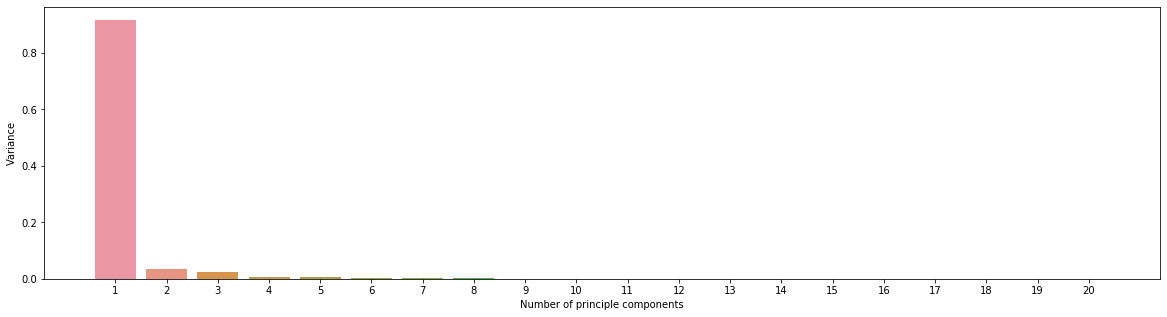

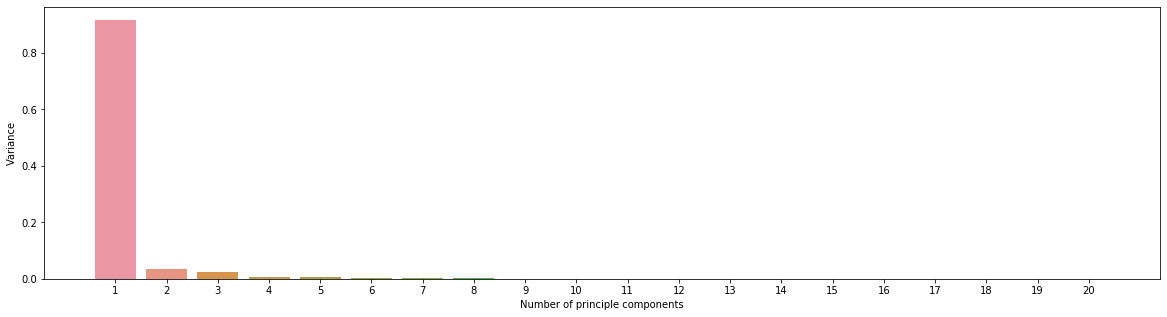

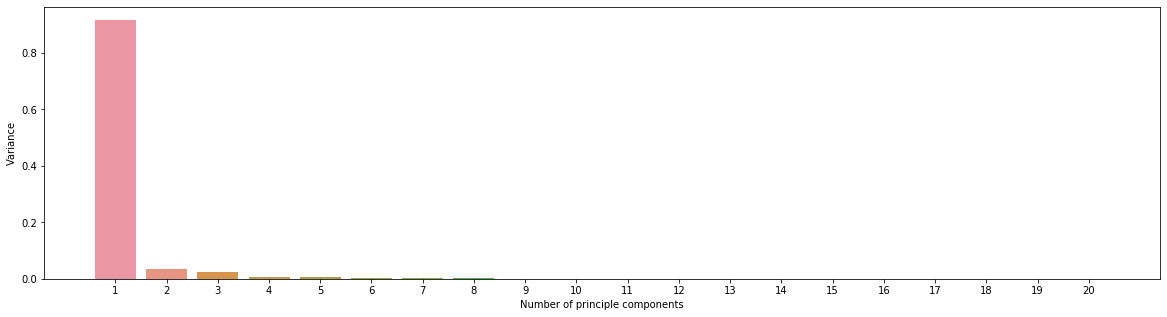

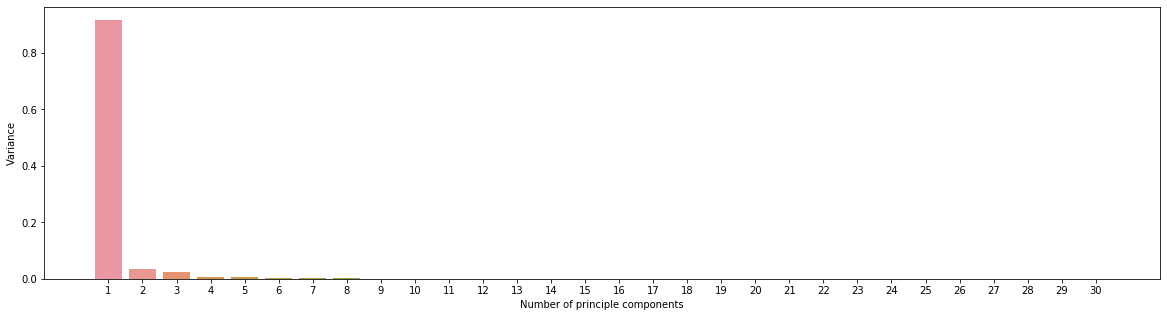

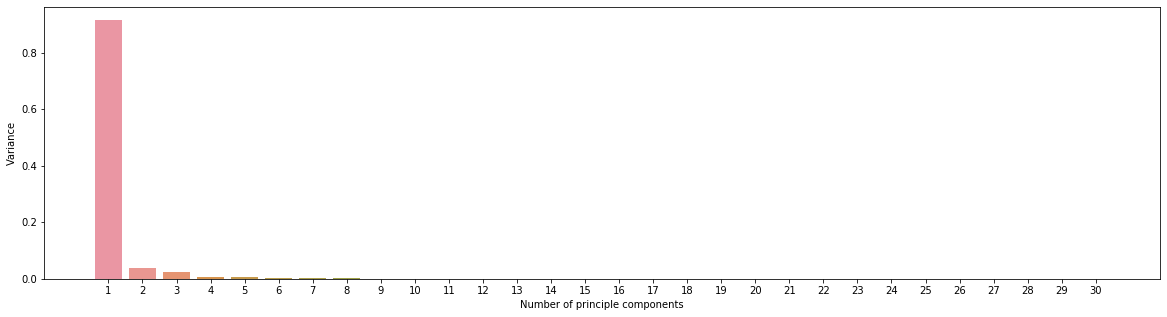

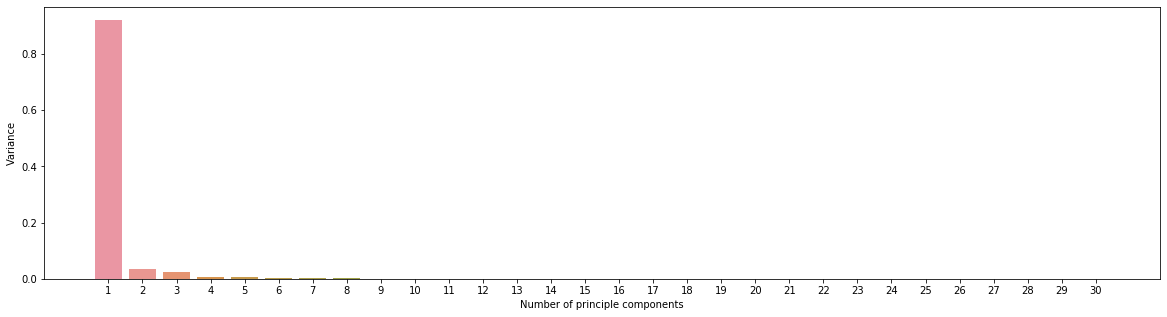

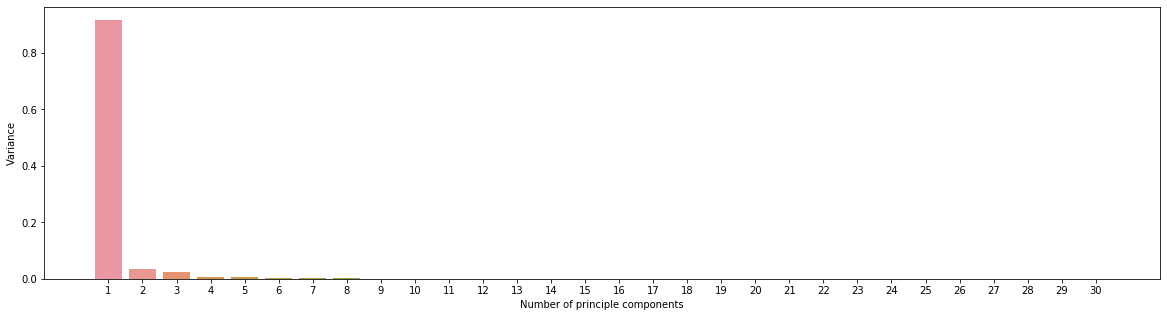

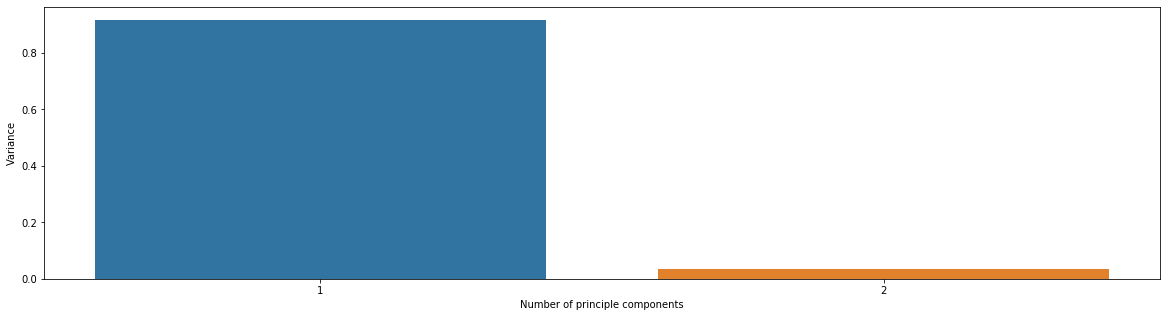

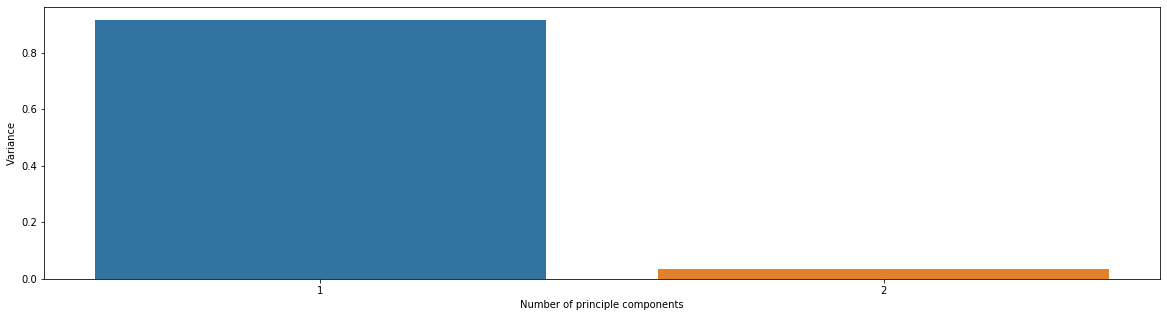

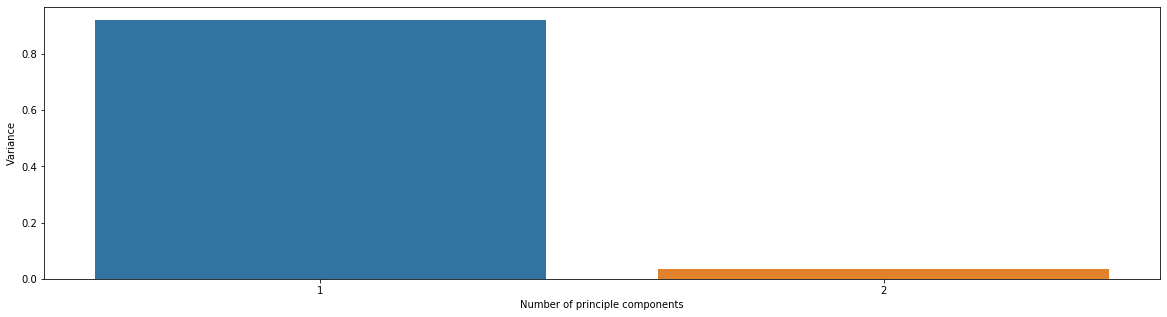

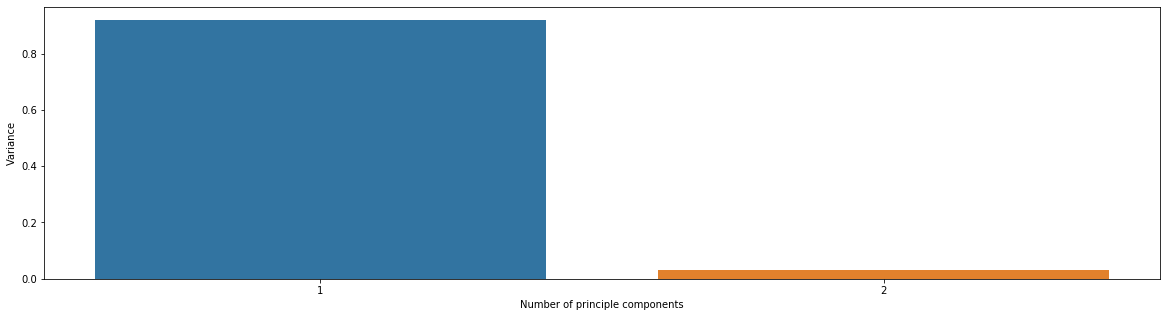

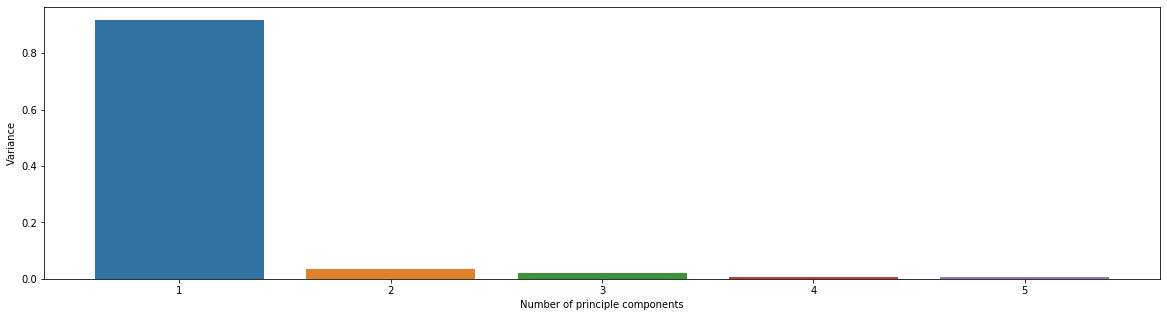

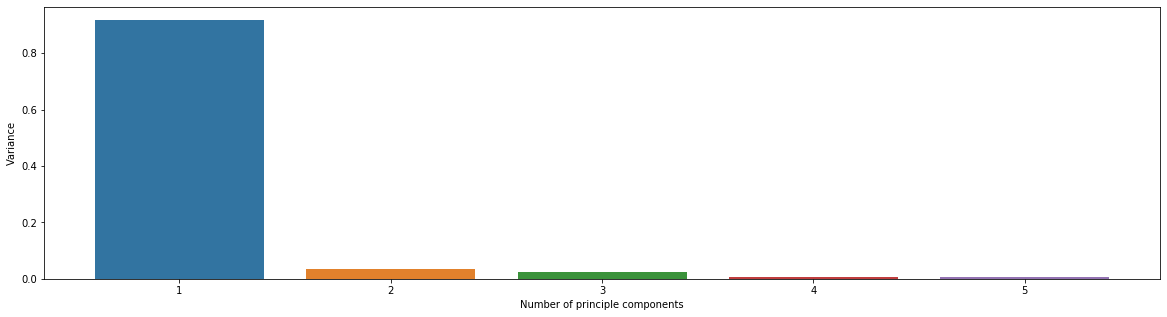

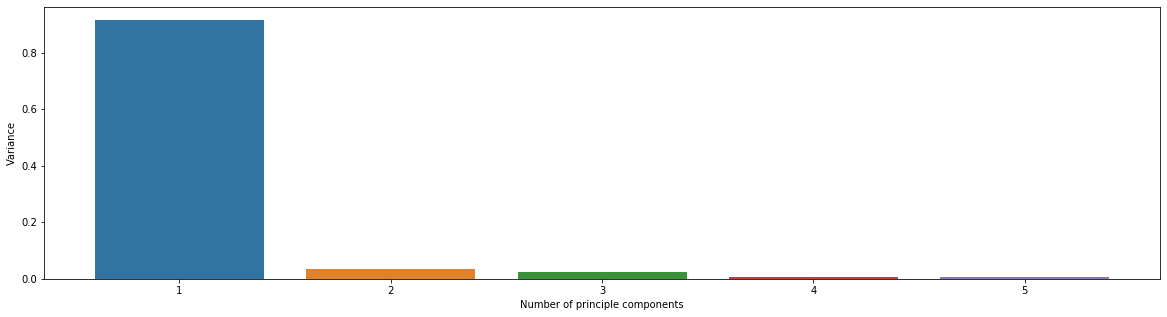

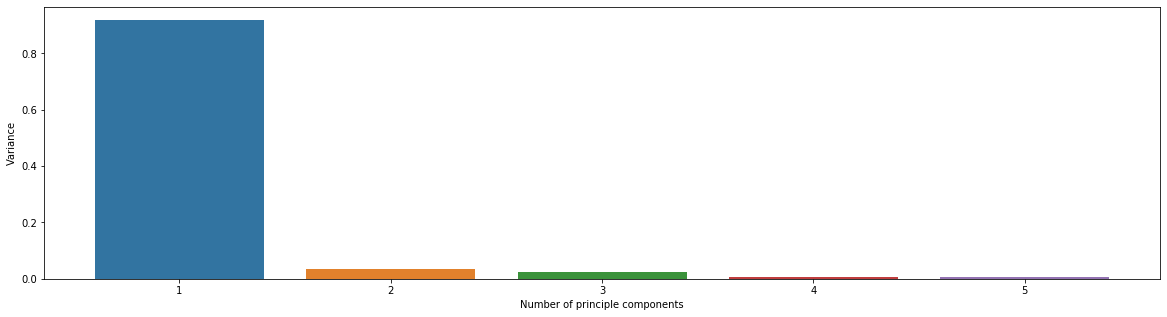

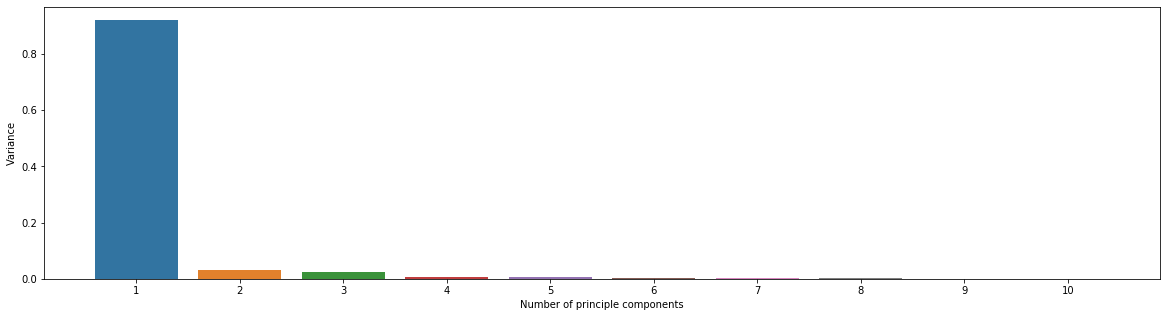

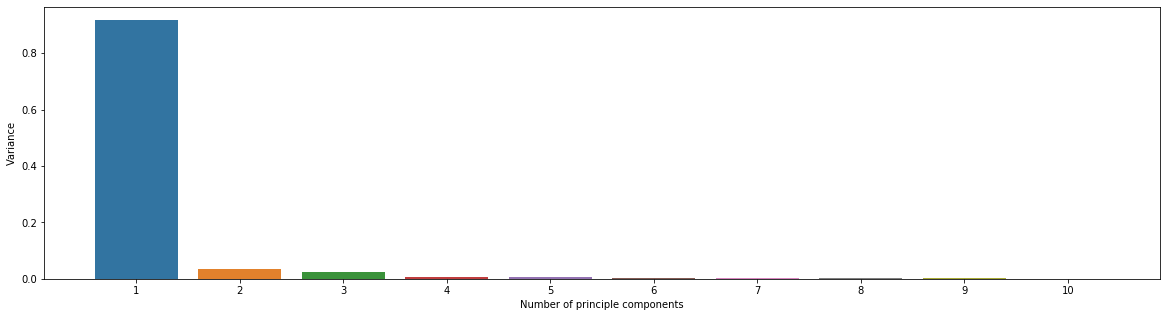

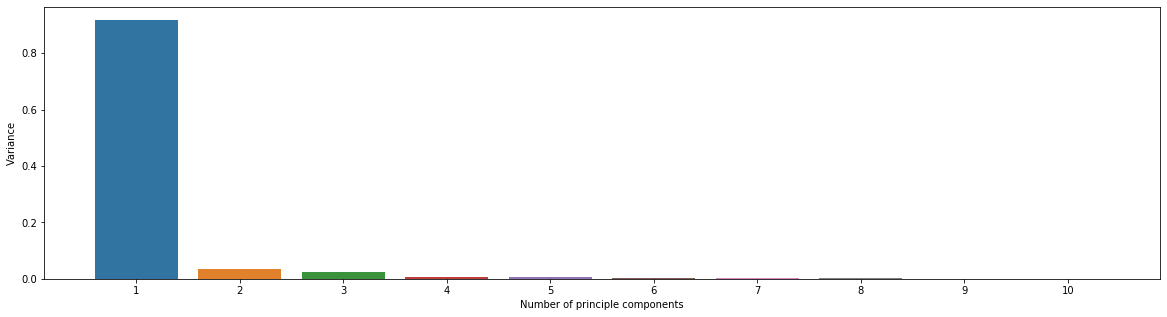

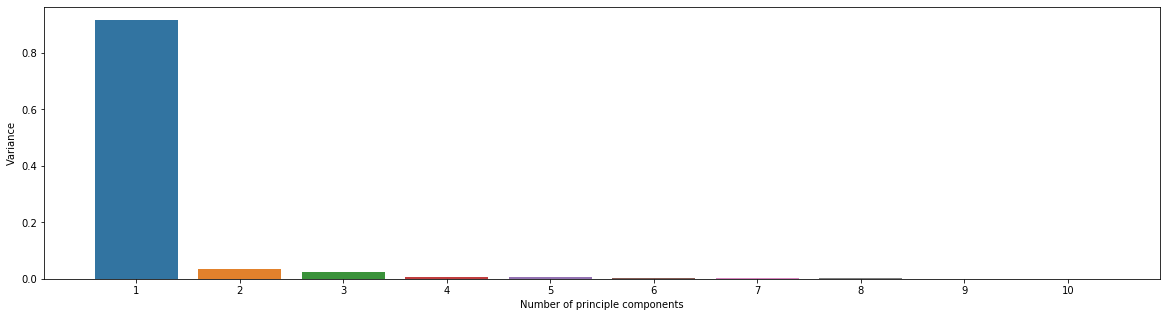

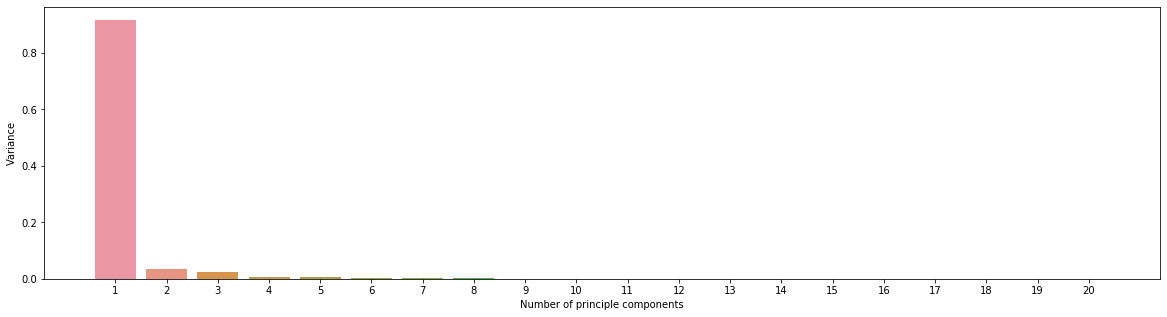

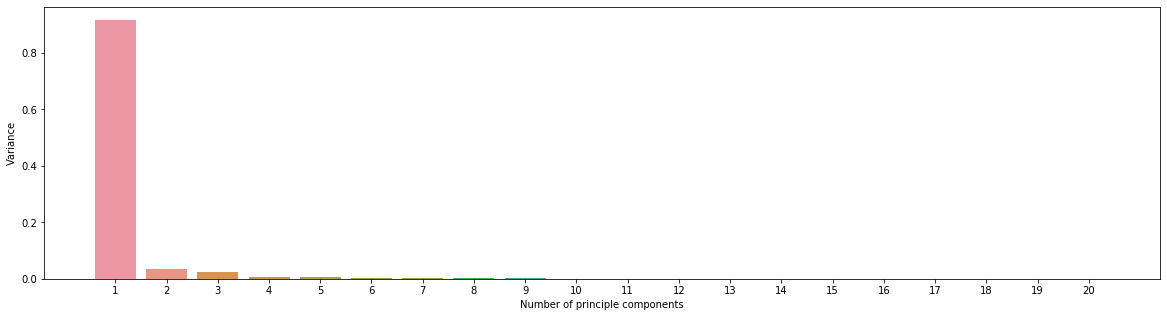

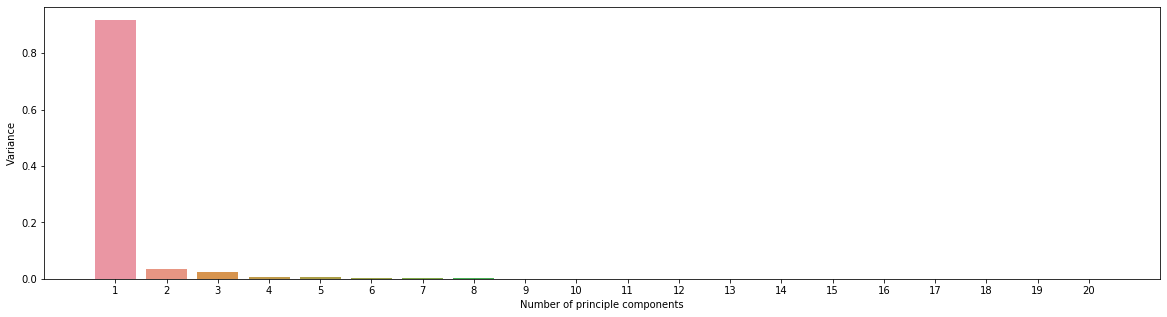

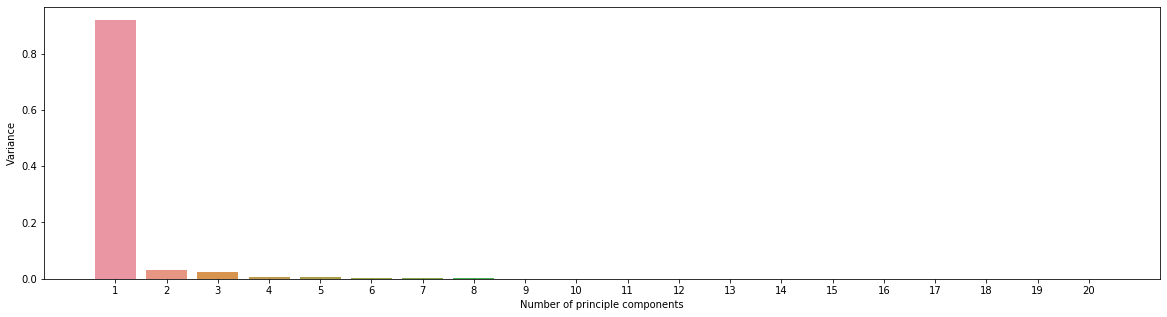

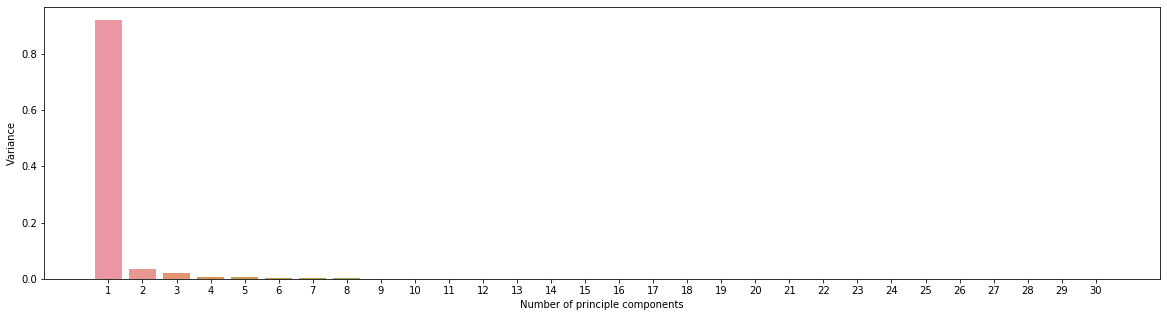

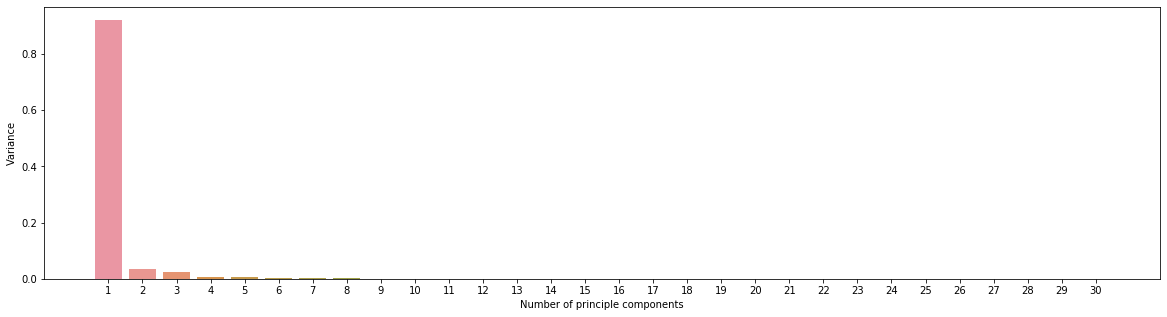

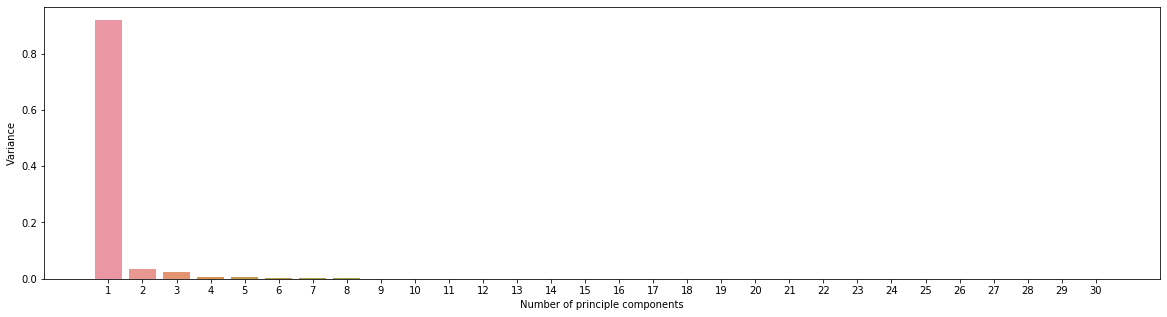

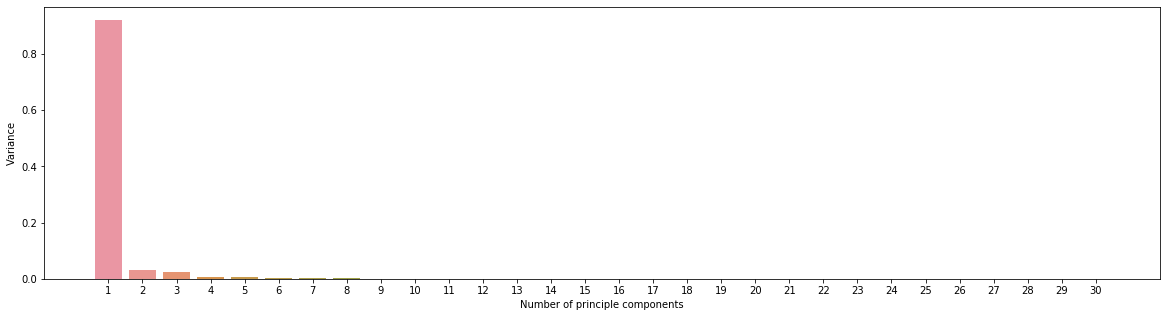

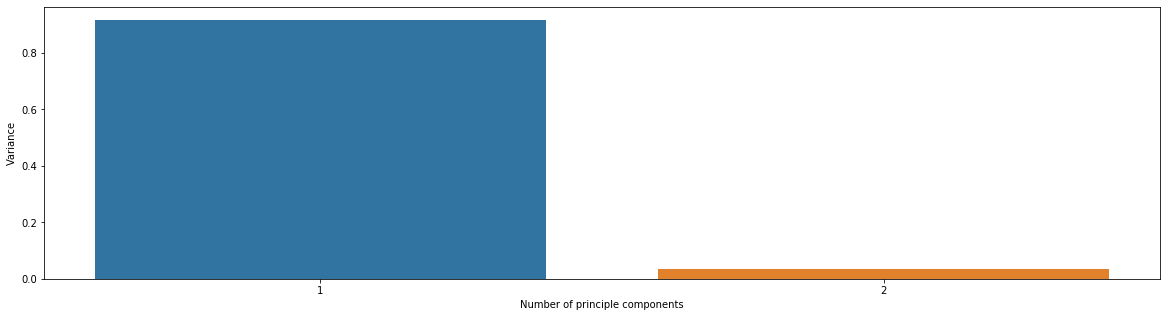

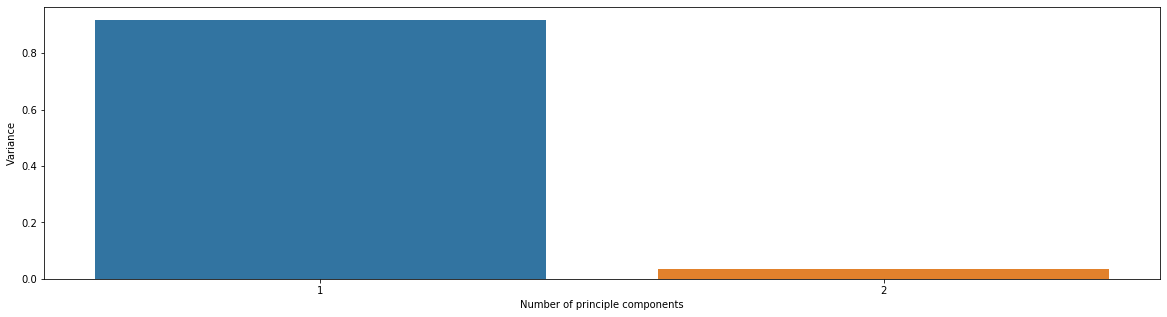

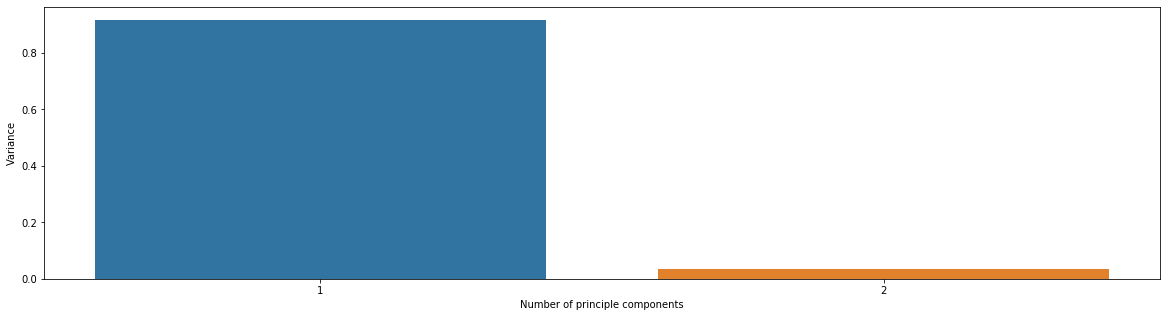

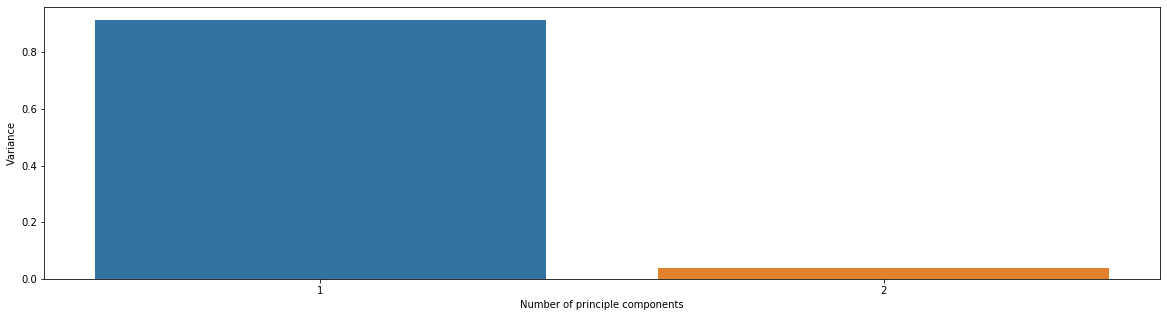

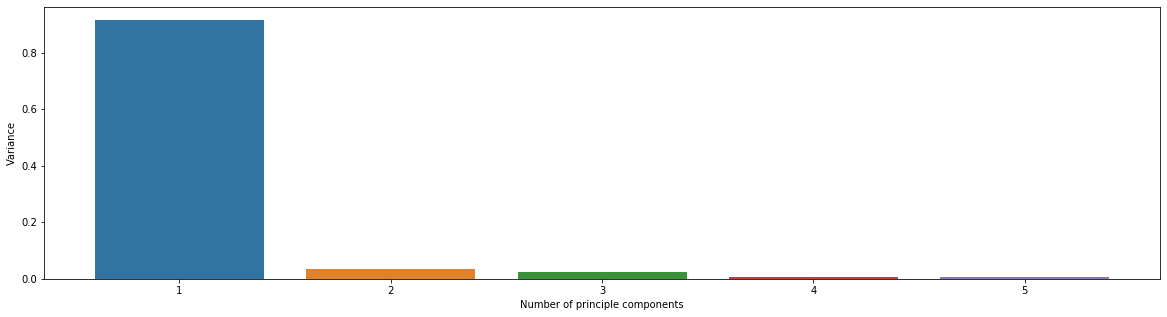

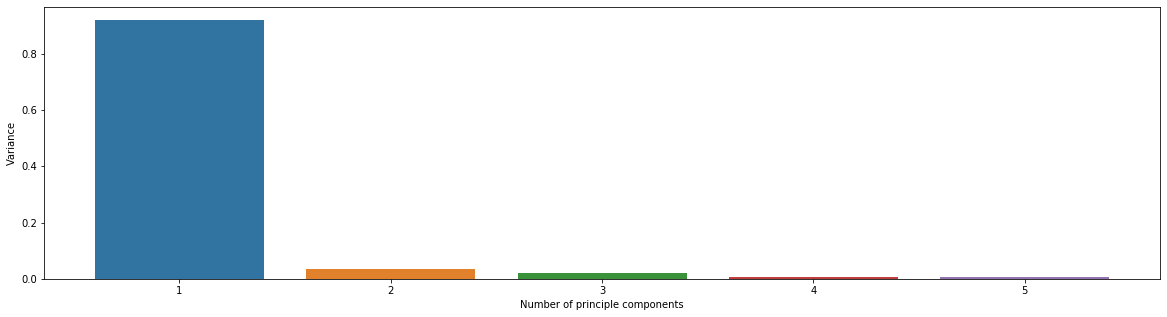

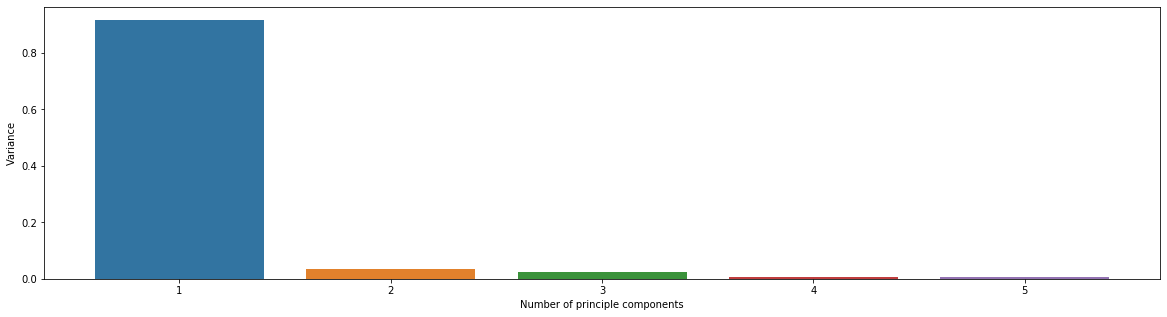

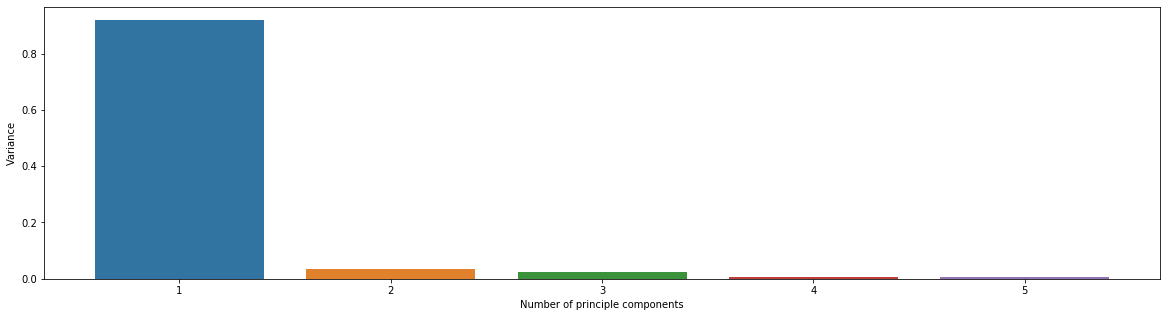

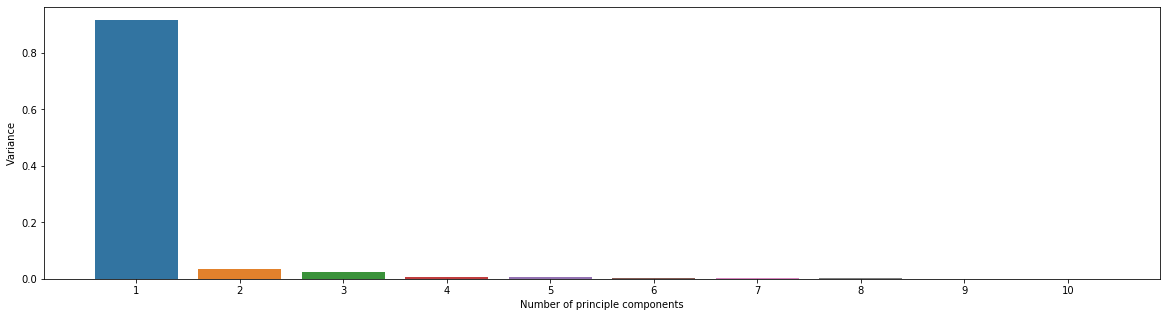

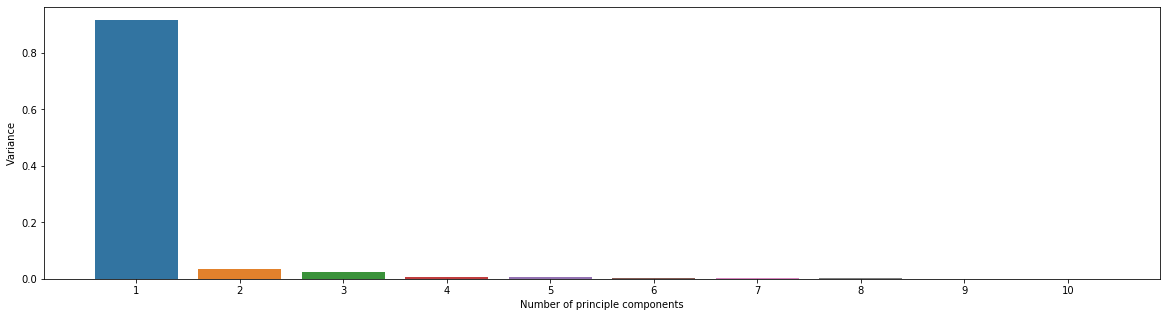

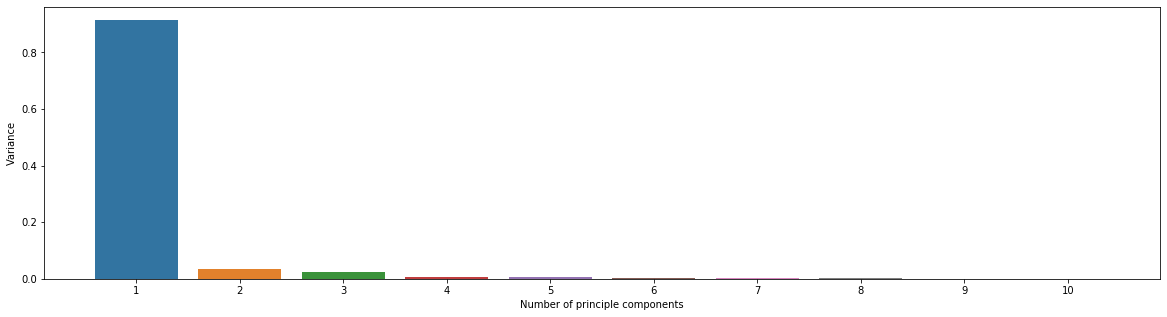

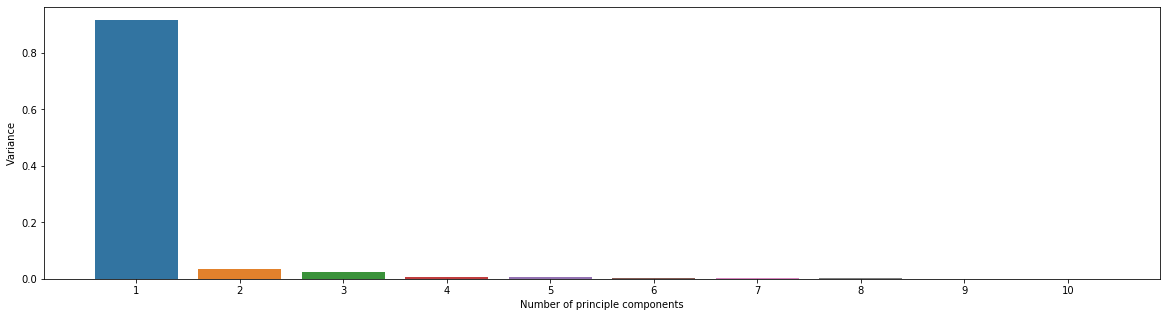

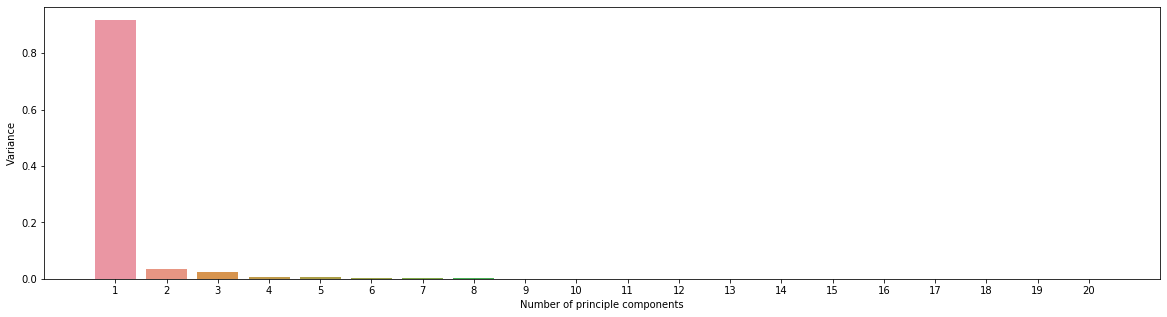

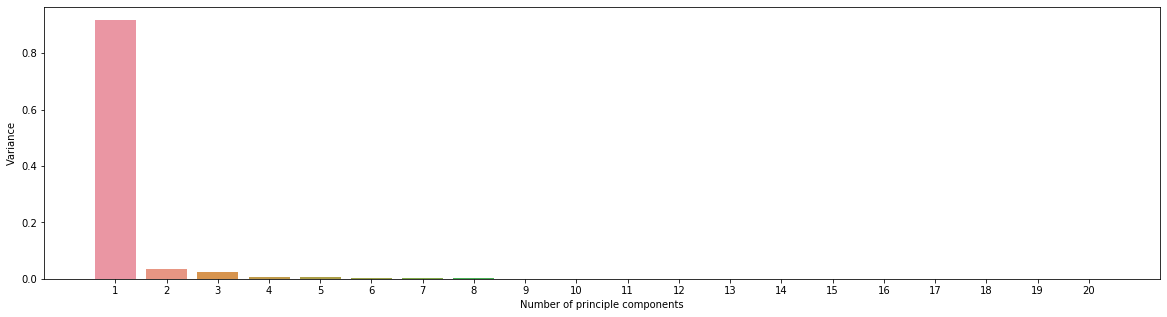

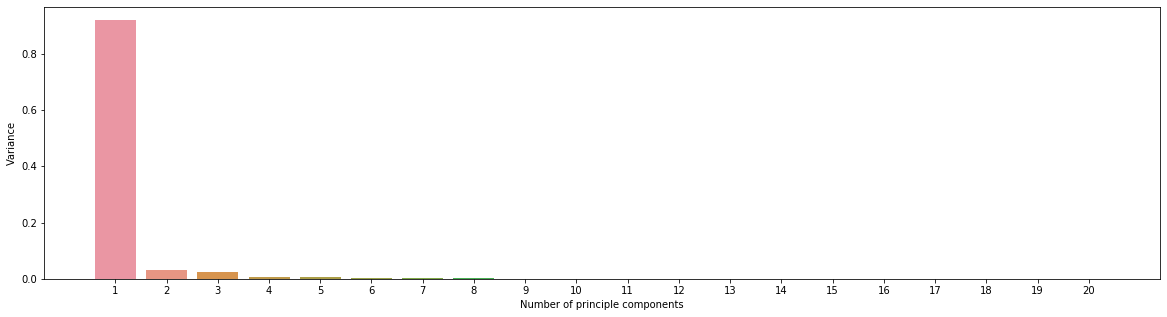

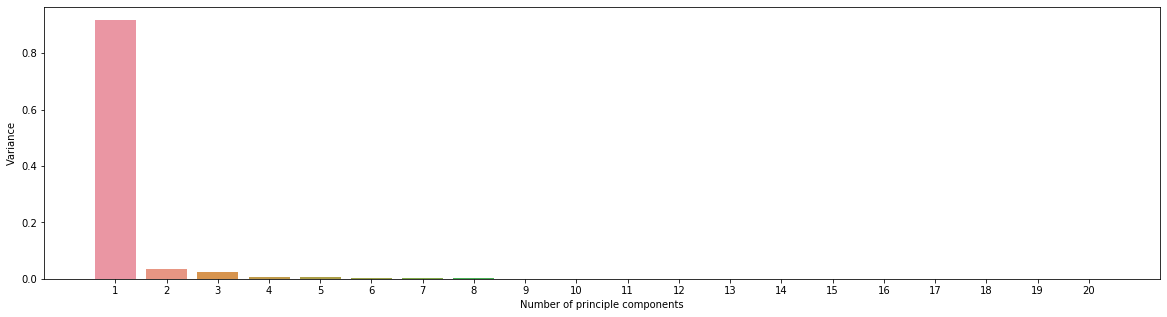

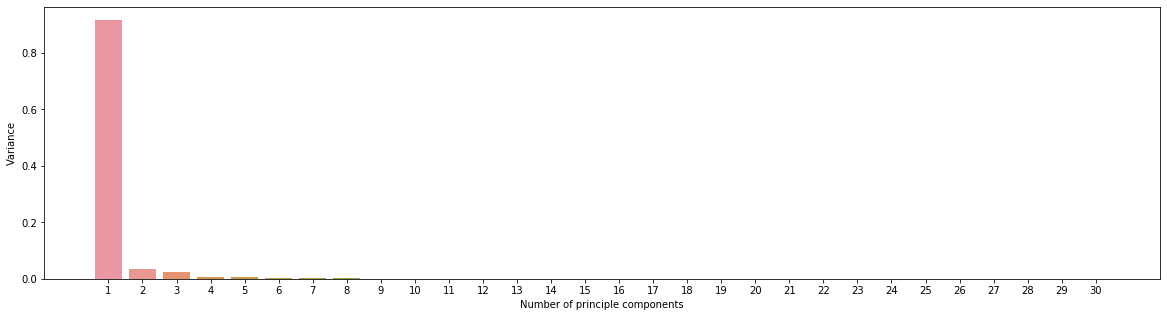

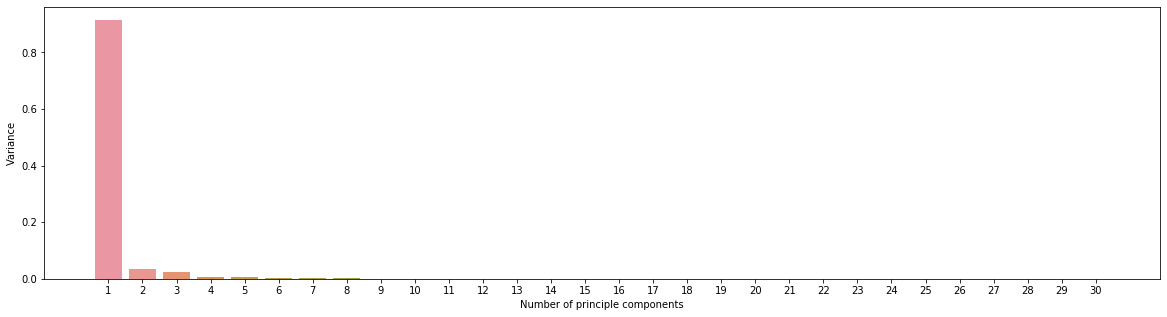

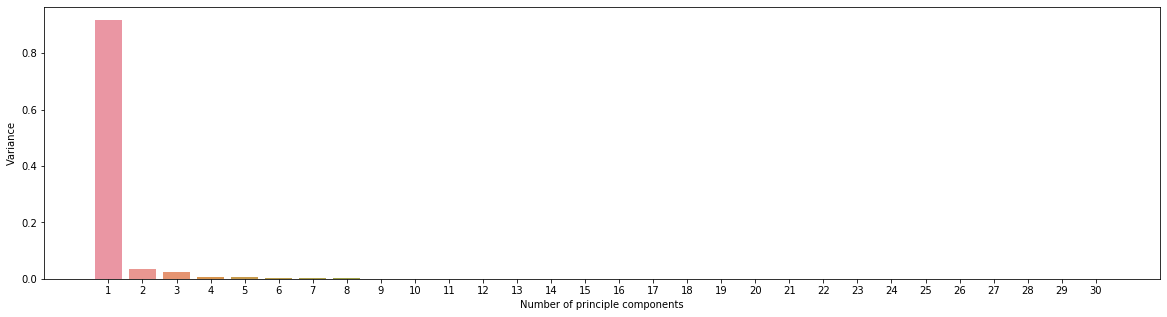

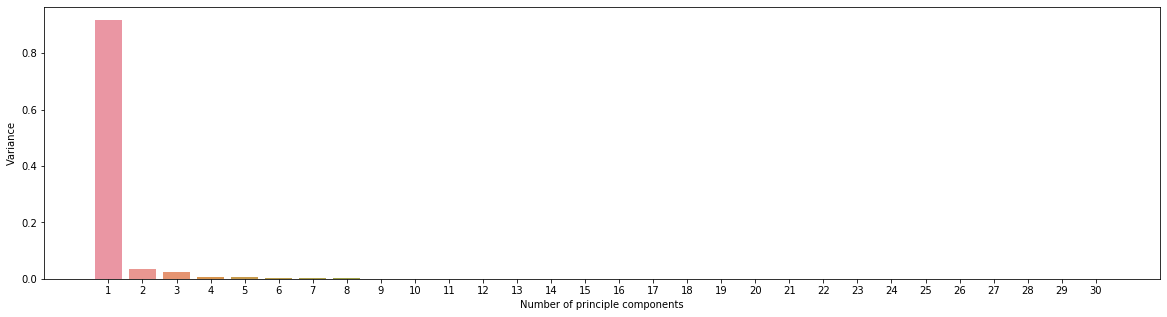

In [26]:
for i in range (0,3):
    for n in pcavalues:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
            X_train, X_test = preprocess_pca(X_train, X_test, n)
            print(X_train)   
            param_grid = {'var_smoothing': [1e-9, 2e-9, 3e-9, 1e-10,1]}
            GNB_GS = GridSearchCV(GaussianNB(), param_grid, cv = 10, refit=True, verbose=0, scoring = score, n_jobs=-1)
            GNB_GS.fit(X_train,y_train)   
            y_pred = GNB_GS.predict(X_test)
            resultsGNB = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsGNB.insert(0,'Gaussian Naive Bayes RUN' + " n_components = " + str(n) + " scoring = " + score + " ")
            resultsGNB.pop(4)
            resultsGNB.insert(4, GNB_GS.score(X_train, y_train))
            resultsGNB.insert(5, GNB_GS.score(X_test, y_test))


            GNB_dataframe = pd.DataFrame([resultsGNB], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([GNB_dataframe])
            print("The best estimator for RUN " + str(i+1) + " n_components = " + str(n) + " scoring = " + score + str(GNB_GS.best_estimator_))
            print("The Confusion matrix for RUN" + str(i+1) + " n_components = " + str(n) + " scoring = " + score + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))

   

In [27]:
print('The parameters combination that would give best accuracy is : ')
print(GNB_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'var_smoothing': 2e-09}


In [28]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 n_components = 2 scoring = precision,0.478970,0.484402,0.424684,0.408935,0.413495
SVMLinear RUN 1 n_components = 2 scoring = recall,0.498307,0.498778,0.425312,0.789600,0.775578
SVMLinear RUN 1 n_components = 2 scoring = accuracy,0.508496,0.506450,0.442626,0.457426,0.457784
SVMLinear RUN 1 n_components = 2 scoring = f1,0.527576,0.518596,0.445982,0.539382,0.563656
SVMLinear RUN 1 n_components = 5 scoring = precision,0.550376,0.535935,0.468405,0.428876,0.438031
...,...,...,...,...,...
Gaussian Naive Bayes RUN n_components = 20 scoring = f1,0.561272,0.535253,0.447394,0.564700,0.587368
Gaussian Naive Bayes RUN n_components = 30 scoring = precision,0.538027,0.524387,0.439794,0.425651,0.420881
Gaussian Naive Bayes RUN n_components = 30 scoring = recall,0.505765,0.503509,0.418390,0.851133,0.823344


# Decision Tree Classifier

The best estimator for RUN 1 n_components = 2 scoring = precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1 n_components = 2 scoring = precision is 

[[[ 40 263]
  [ 38 417]]

 [[417  38]
  [263  40]]]
None
The best estimator for RUN 1 n_components = 2 scoring = recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weigh

The best estimator for RUN 1 n_components = 20 scoring = accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1 n_components = 20 scoring = accuracy is 

[[[ 55 251]
  [ 28 424]]

 [[424  28]
  [251  55]]]
None
The best estimator for RUN 1 n_components = 20 scoring = f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weigh

C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 2 scoring = precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 2 scoring = precision is 

[[[  8 312]
  [  4 434]]

 [[434   4]
  [312   8]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 2 scoring = recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 2 scoring = recall is 

[[[ 38 278]
  [ 26 416]]

 [[416  26]
  [278  38]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 2 scoring = accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 2 scoring = accuracy is 

[[[ 40 266]
  [ 30 422]]

 [[422  30]
  [266  40]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 2 scoring = f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 2 scoring = f1 is 

[[[ 77 232]
  [ 63 386]]

 [[386  63]
  [232  77]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5 scoring = precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 5 scoring = precision is 

[[[ 48 268]
  [ 17 425]]

 [[425  17]
  [268  48]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5 scoring = recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 5 scoring = recall is 

[[[109 198]
  [ 81 370]]

 [[370  81]
  [198 109]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5 scoring = accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 5 scoring = accuracy is 

[[[ 61 259]
  [ 26 412]]

 [[412  26]
  [259  61]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 5 scoring = f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 5 scoring = f1 is 

[[[ 88 239]
  [ 67 364]]

 [[364  67]
  [239  88]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10 scoring = precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 10 scoring = precision is 

[[[ 35 263]
  [ 11 449]]

 [[449  11]
  [263  35]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10 scoring = recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 10 scoring = recall is 

[[[106 187]
  [ 94 371]]

 [[371  94]
  [187 106]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10 scoring = accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 10 scoring = accuracy is 

[[[ 51 279]
  [  6 422]]

 [[422   6]
  [279  51]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 10 scoring = f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 10 scoring = f1 is 

[[[118 180]
  [124 336]]

 [[336 124]
  [180 118]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20 scoring = precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 20 scoring = precision is 

[[[ 46 273]
  [ 11 428]]

 [[428  11]
  [273  46]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20 scoring = recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 20 scoring = recall is 

[[[118 209]
  [105 326]]

 [[326 105]
  [209 118]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20 scoring = accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 20 scoring = accuracy is 

[[[ 48 266]
  [ 16 428]]

 [[428  16]
  [266  48]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 20 scoring = f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 20 scoring = f1 is 

[[[112 191]
  [ 91 364]]

 [[364  91]
  [191 112]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30 scoring = precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 30 scoring = precision is 

[[[ 51 258]
  [ 20 429]]

 [[429  20]
  [258  51]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30 scoring = recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 30 scoring = recall is 

[[[114 178]
  [107 359]]

 [[359 107]
  [178 114]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30 scoring = accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=11,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 30 scoring = accuracy is 

[[[ 97 247]
  [ 47 367]]

 [[367  47]
  [247  97]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 2 n_components = 30 scoring = f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 n_components = 30 scoring = f1 is 

[[[124 187]
  [100 347]]

 [[347 100]
  [187 124]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 2 scoring = precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 2 scoring = precision is 

[[[  9 296]
  [  9 444]]

 [[444   9]
  [296   9]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 2 scoring = recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 2 scoring = recall is 

[[[ 77 214]
  [ 87 380]]

 [[380  87]
  [214  77]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 2 scoring = accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 2 scoring = accuracy is 

[[[102 230]
  [ 84 342]]

 [[342  84]
  [230 102]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 2 scoring = f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 2 scoring = f1 is 

[[[ 97 219]
  [ 93 349]]

 [[349  93]
  [219  97]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5 scoring = precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 5 scoring = precision is 

[[[ 57 261]
  [ 15 425]]

 [[425  15]
  [261  57]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5 scoring = recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 5 scoring = recall is 

[[[111 198]
  [105 344]]

 [[344 105]
  [198 111]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5 scoring = accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 5 scoring = accuracy is 

[[[ 55 249]
  [ 27 427]]

 [[427  27]
  [249  55]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 5 scoring = f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 5 scoring = f1 is 

[[[ 98 220]
  [ 98 342]]

 [[342  98]
  [220  98]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10 scoring = precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 10 scoring = precision is 

[[[ 49 269]
  [  6 434]]

 [[434   6]
  [269  49]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10 scoring = recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 10 scoring = recall is 

[[[117 176]
  [117 348]]

 [[348 117]
  [176 117]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10 scoring = accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 10 scoring = accuracy is 

[[[ 37 274]
  [ 12 435]]

 [[435  12]
  [274  37]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 10 scoring = f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 10 scoring = f1 is 

[[[ 96 178]
  [136 348]]

 [[348 136]
  [178  96]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20 scoring = precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 20 scoring = precision is 

[[[ 44 269]
  [ 13 432]]

 [[432  13]
  [269  44]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20 scoring = recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 20 scoring = recall is 

[[[114 214]
  [102 328]]

 [[328 102]
  [214 114]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20 scoring = accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 20 scoring = accuracy is 

[[[ 63 239]
  [ 30 426]]

 [[426  30]
  [239  63]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 20 scoring = f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 20 scoring = f1 is 

[[[108 218]
  [ 82 350]]

 [[350  82]
  [218 108]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30 scoring = precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 30 scoring = precision is 

[[[ 58 268]
  [ 21 411]]

 [[411  21]
  [268  58]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30 scoring = recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 30 scoring = recall is 

[[[131 168]
  [135 324]]

 [[324 135]
  [168 131]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30 scoring = accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=11,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 30 scoring = accuracy is 

[[[ 71 233]
  [ 35 419]]

 [[419  35]
  [233  71]]]
None


C:\Users\shava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The best estimator for RUN 3 n_components = 30 scoring = f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 n_components = 30 scoring = f1 is 

[[[114 196]
  [ 93 355]]

 [[355  93]
  [196 114]]]
None


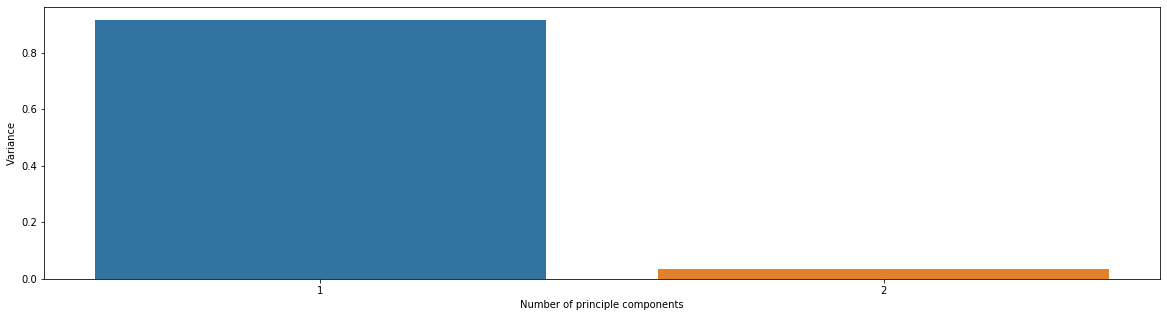

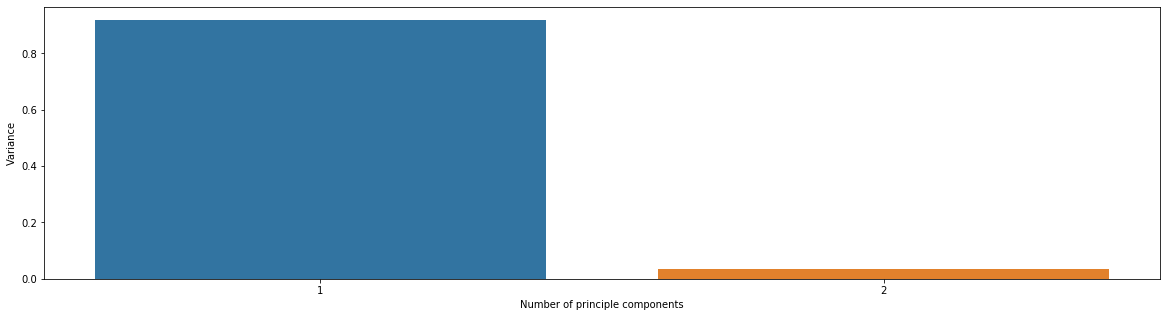

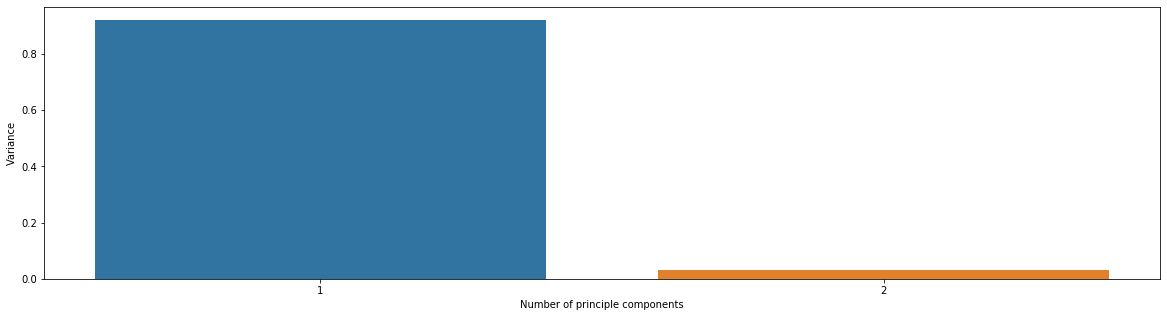

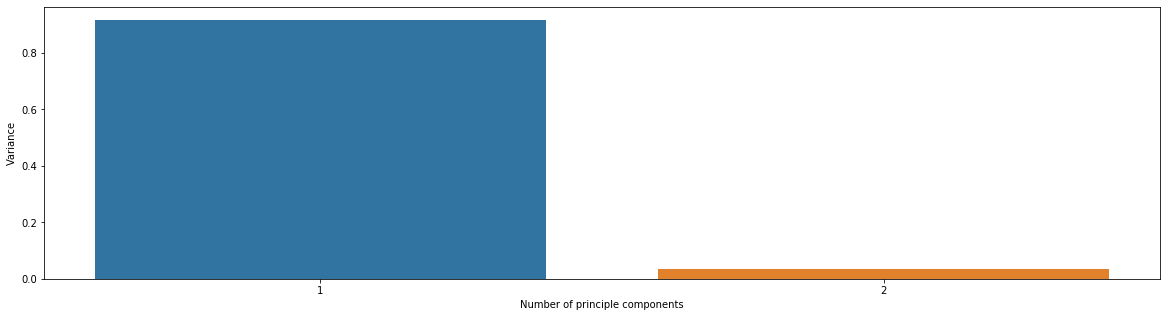

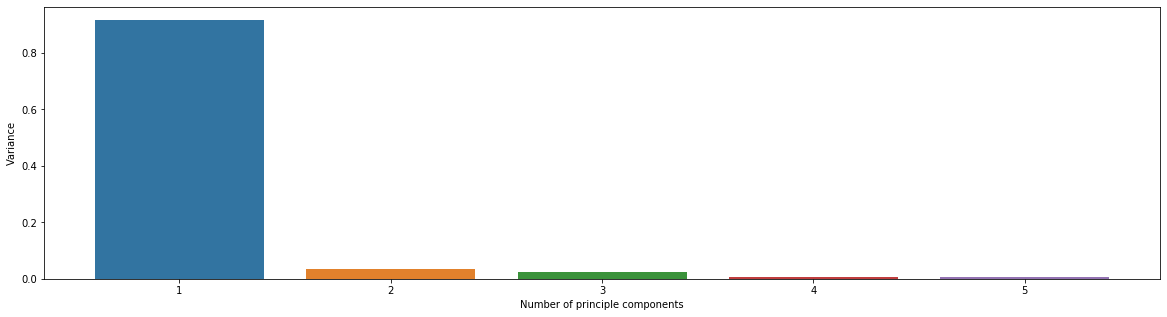

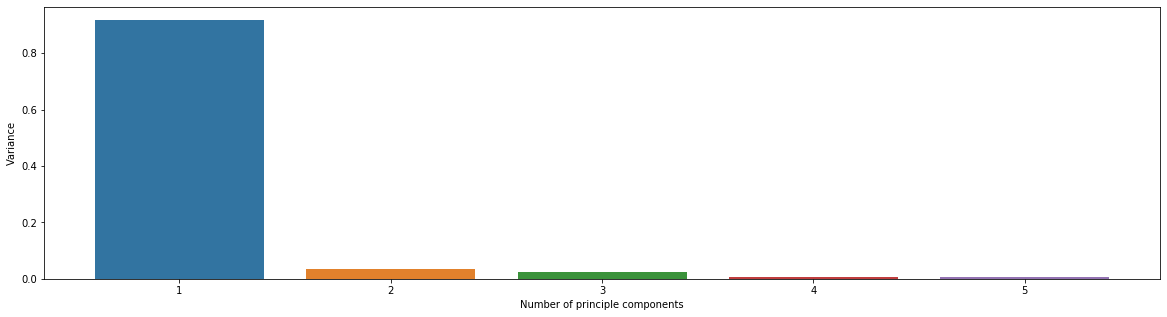

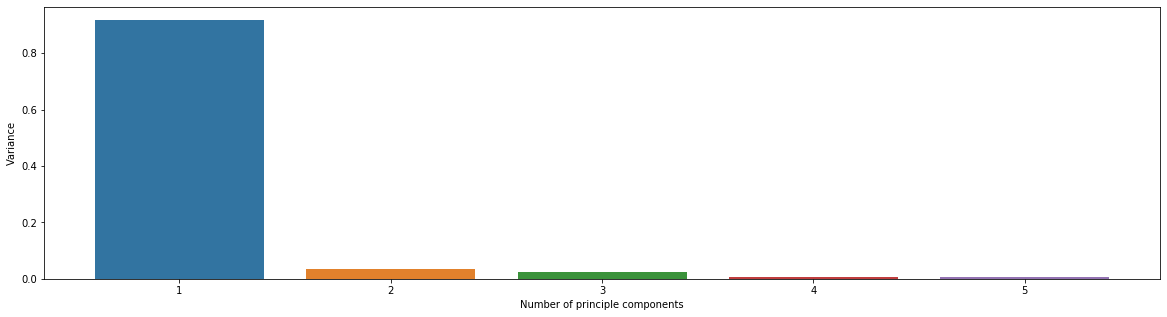

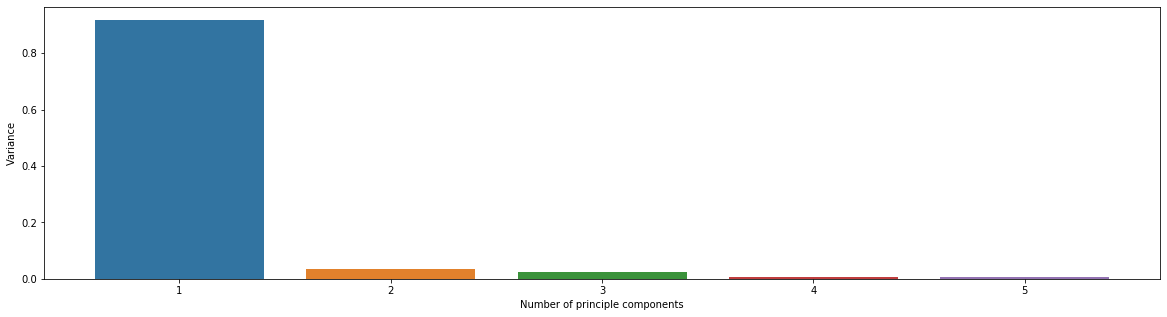

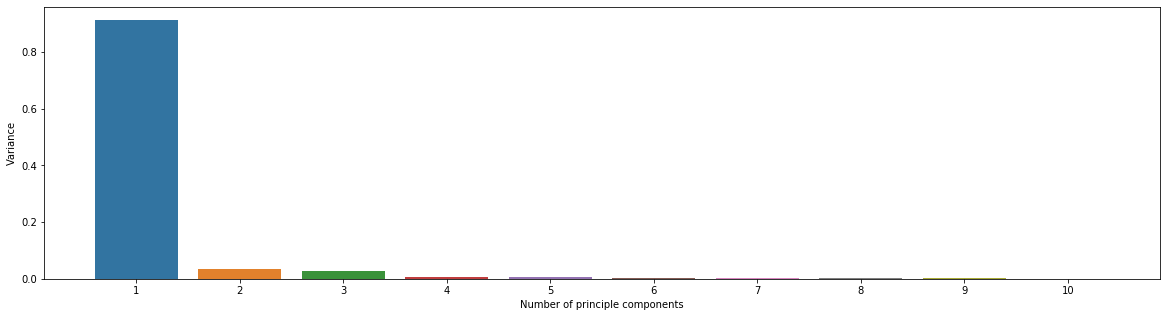

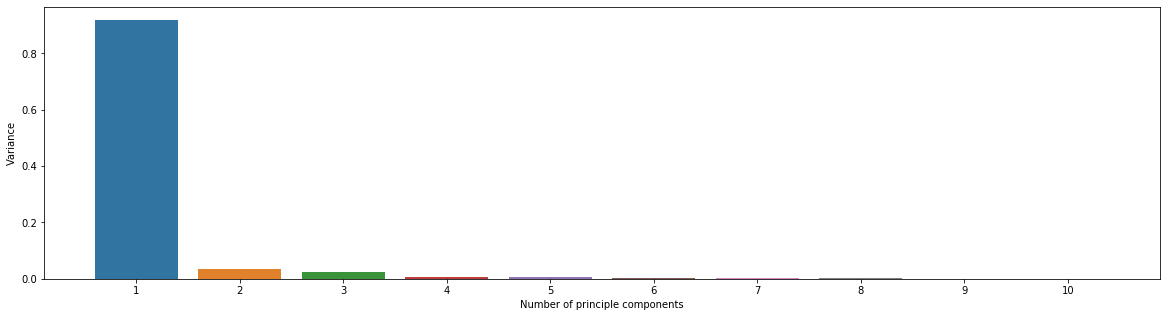

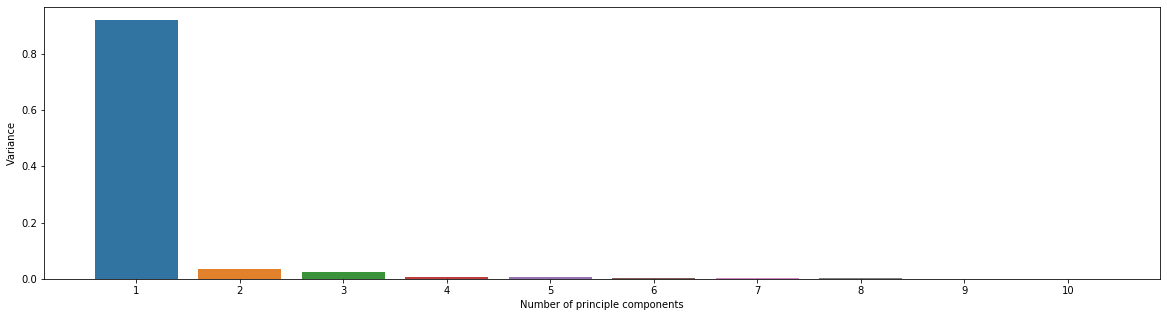

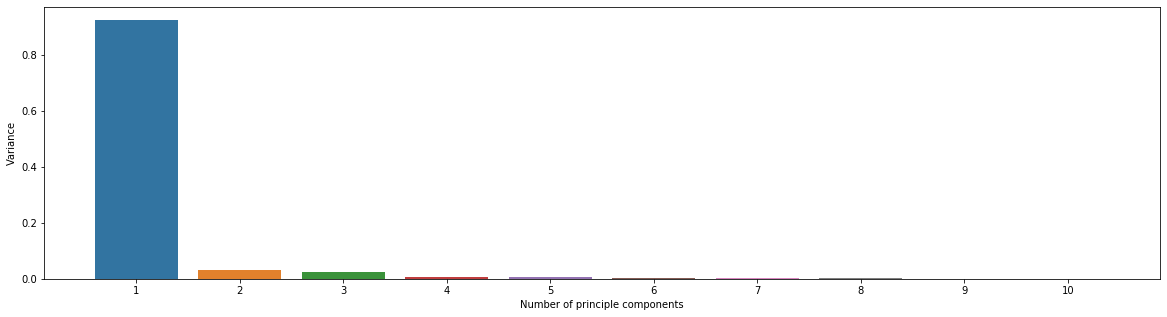

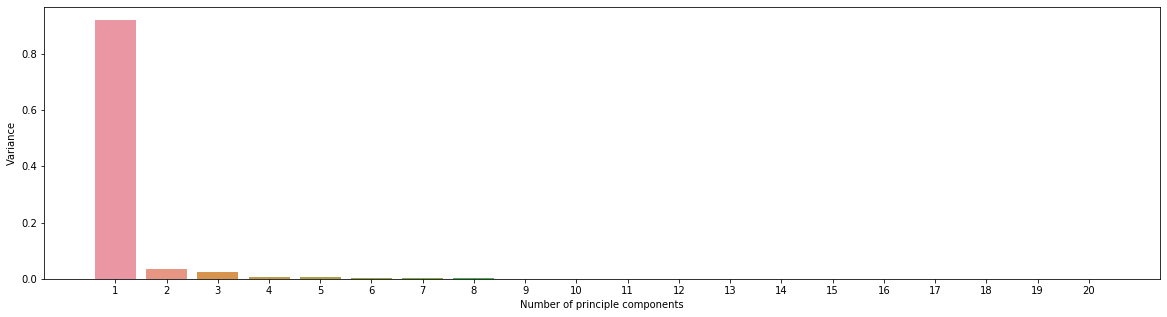

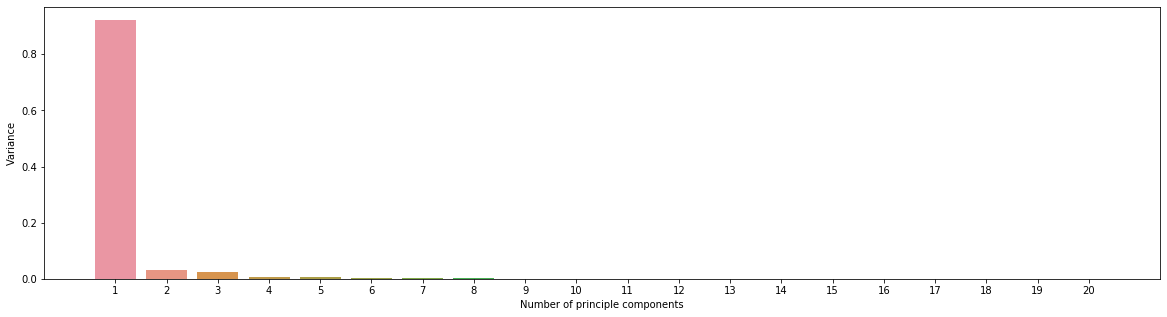

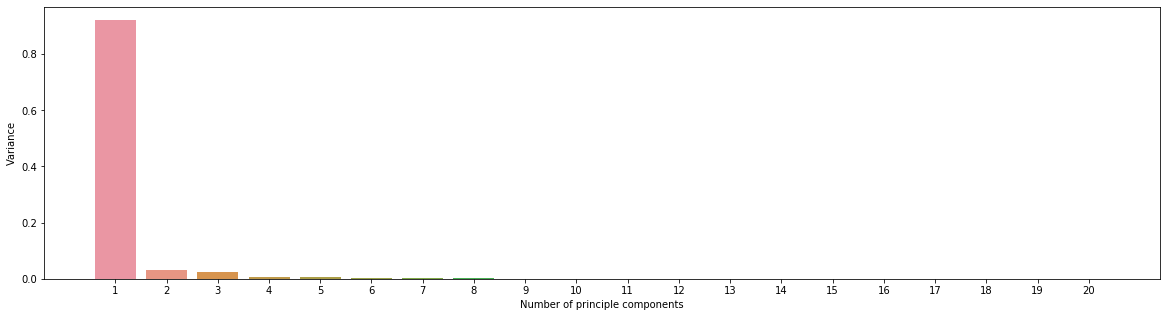

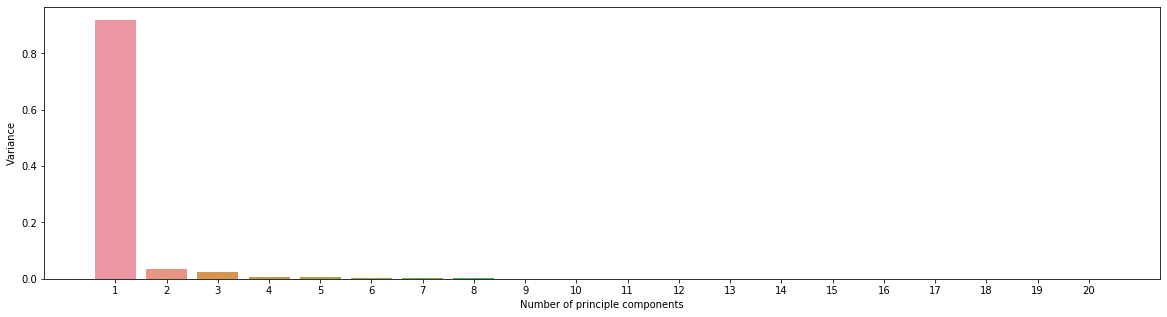

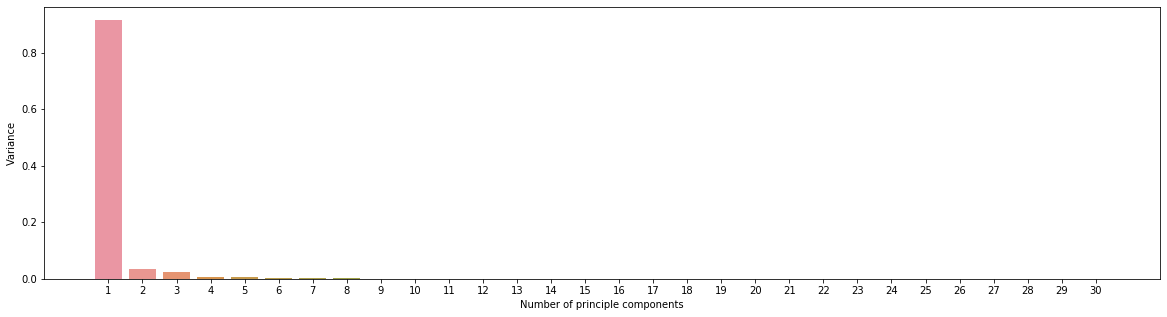

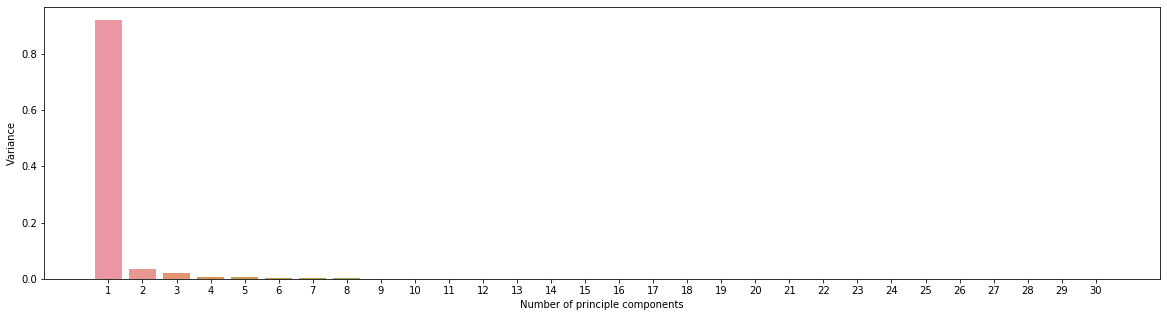

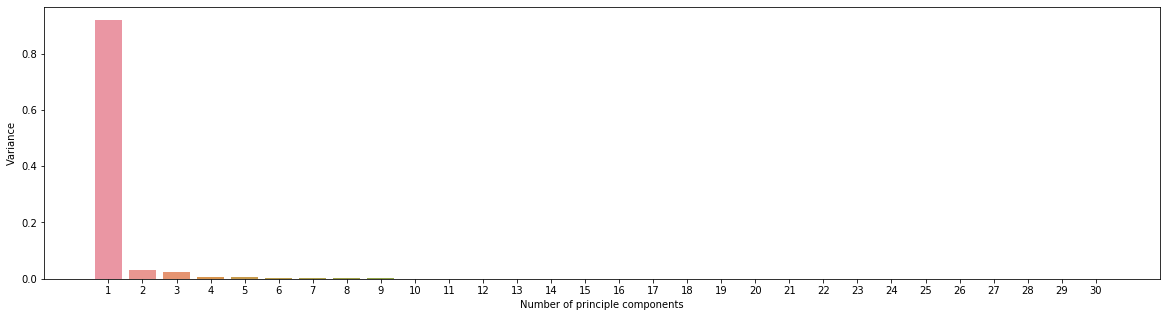

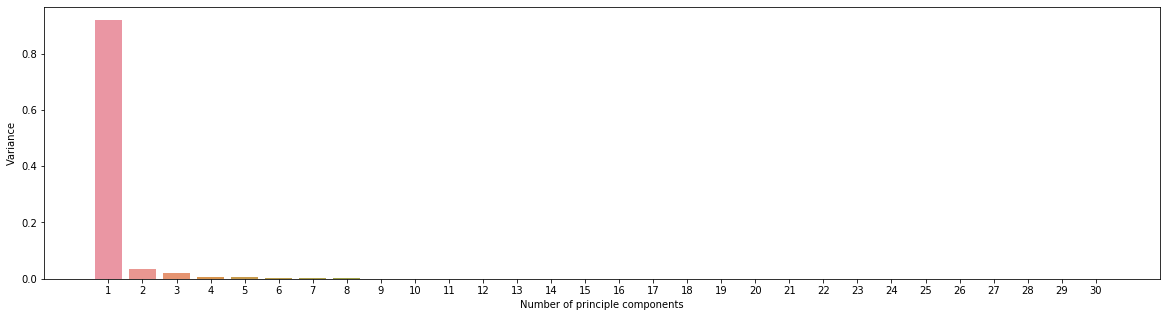

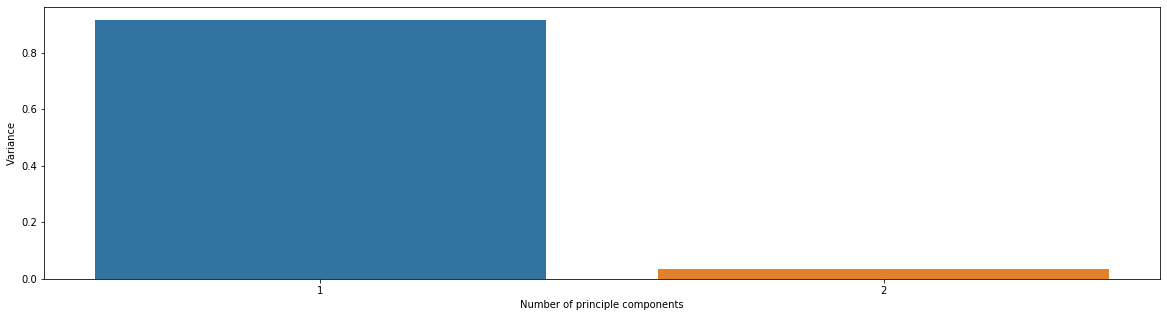

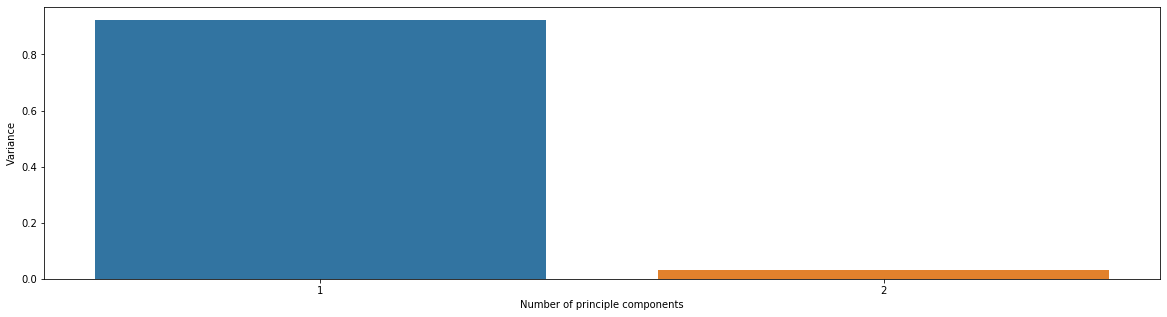

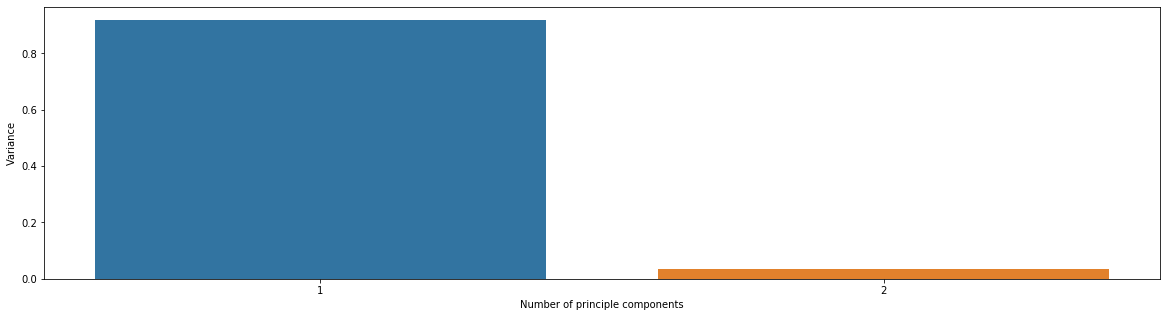

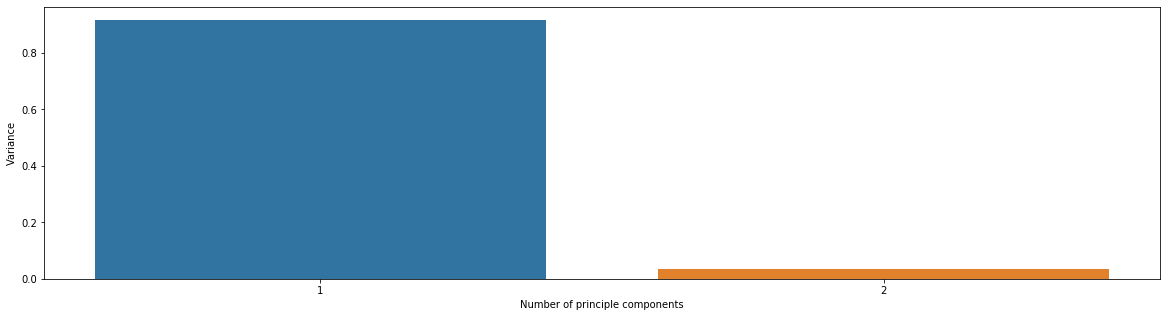

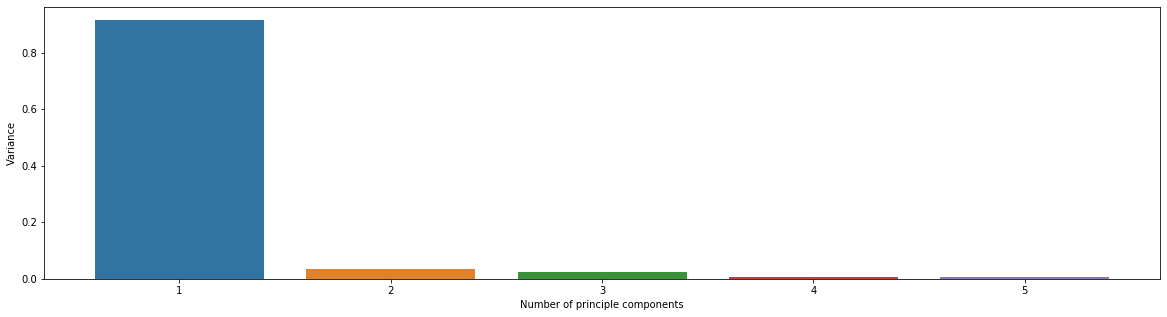

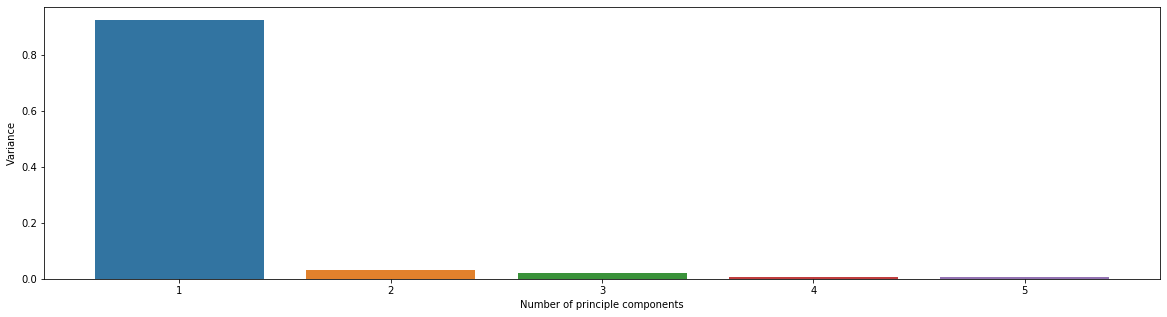

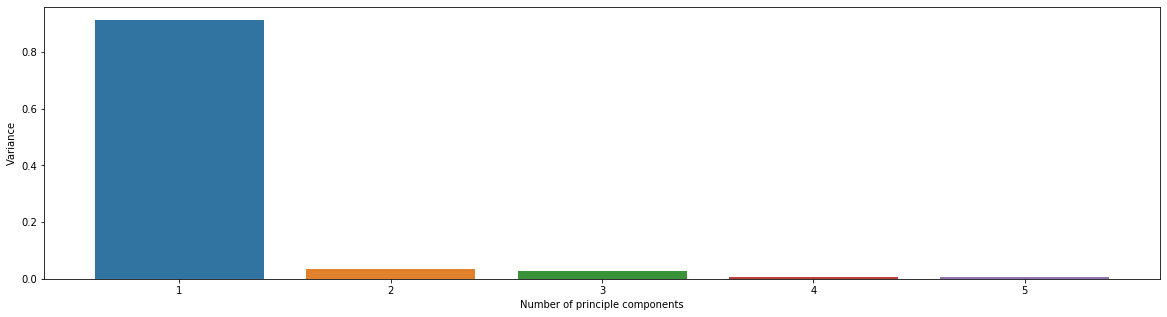

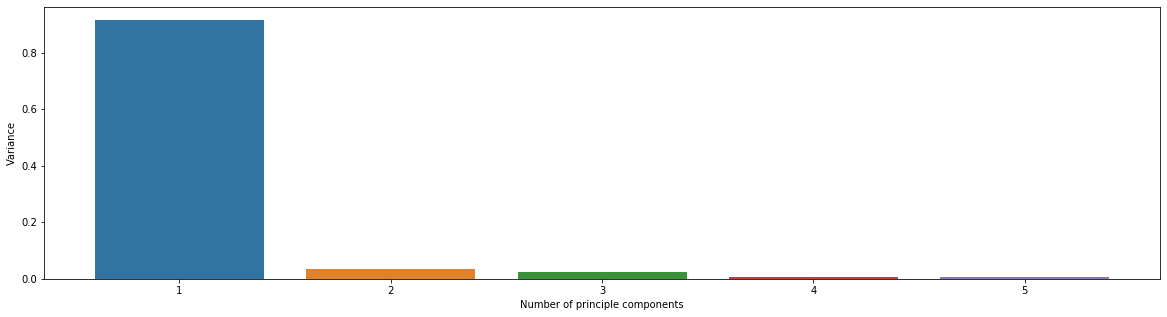

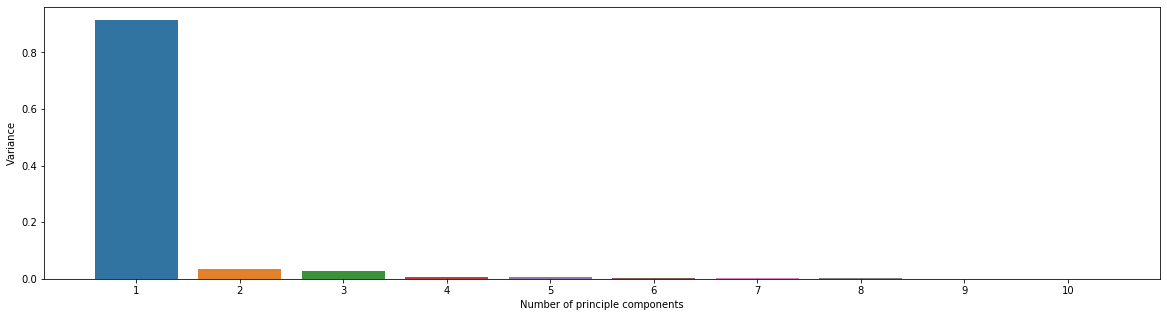

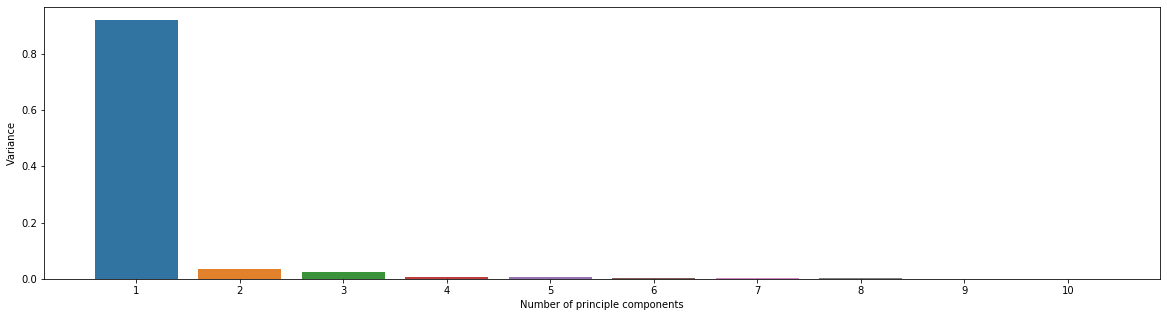

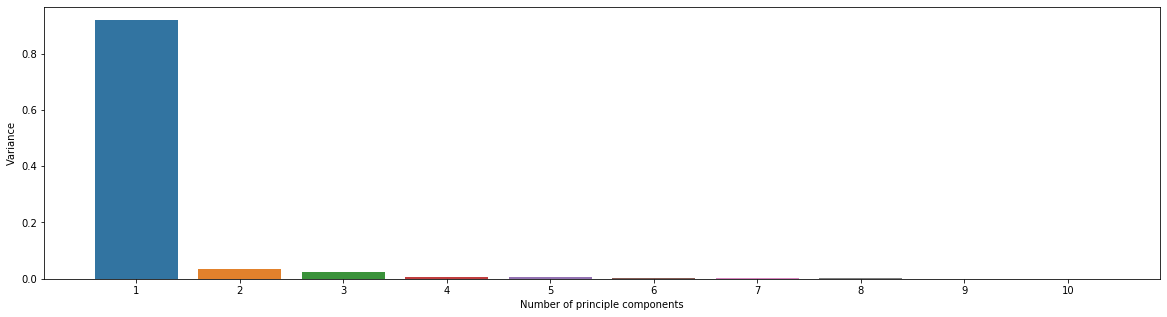

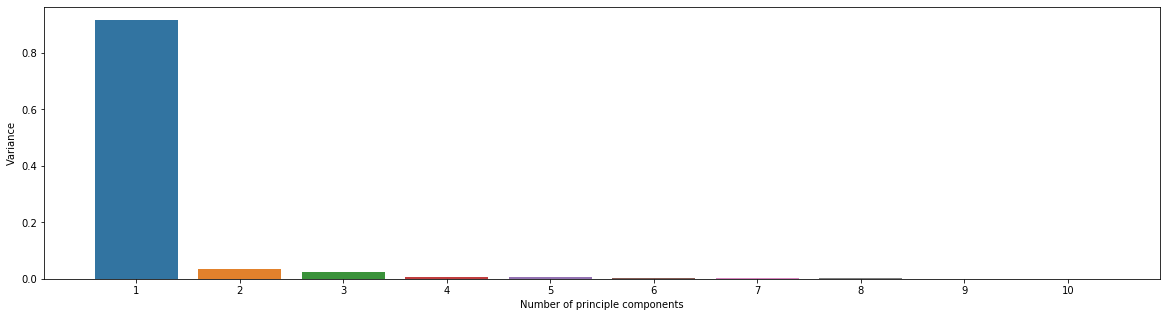

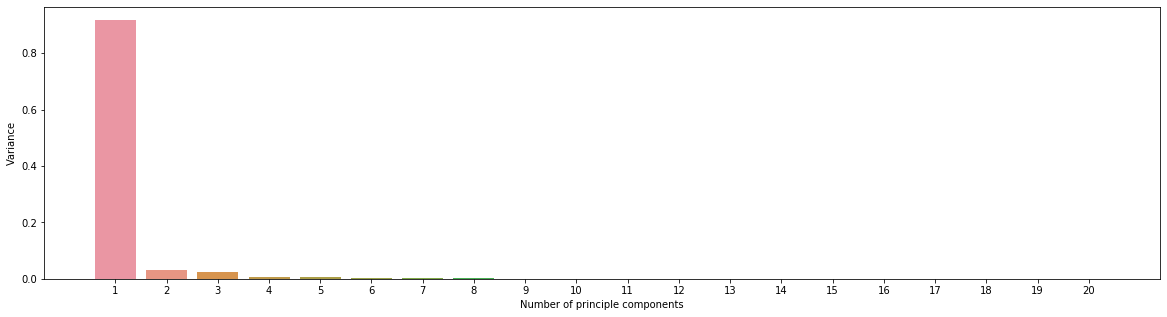

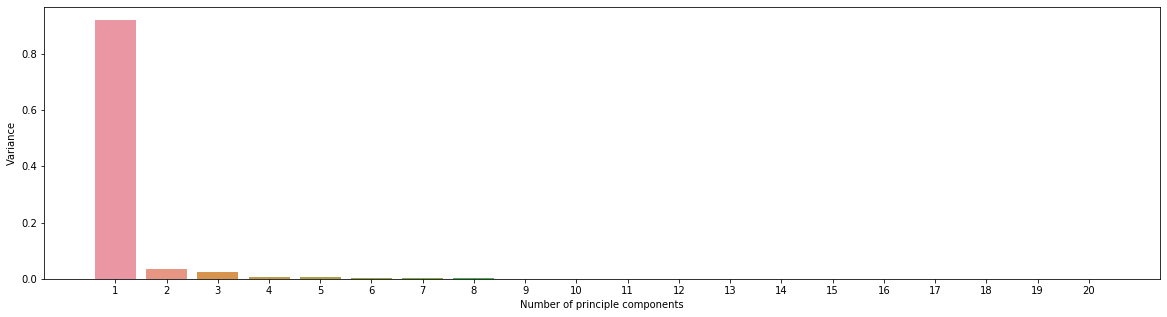

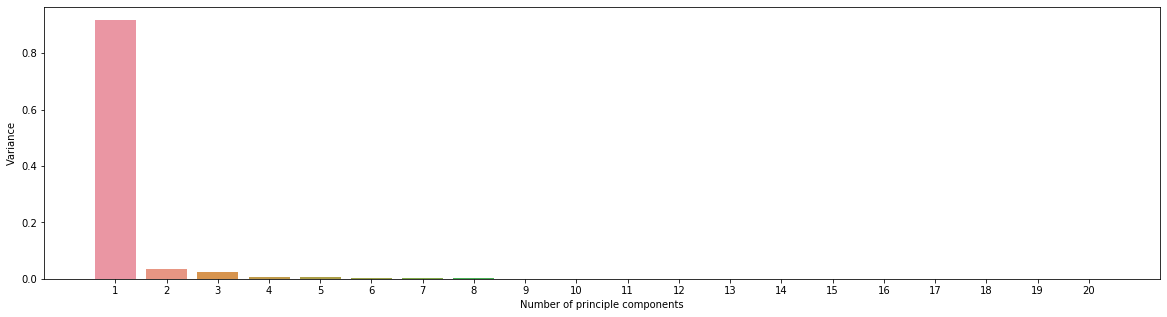

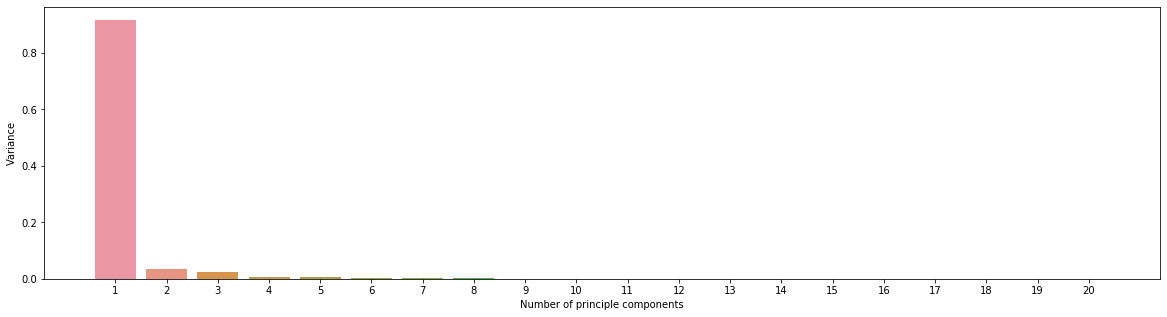

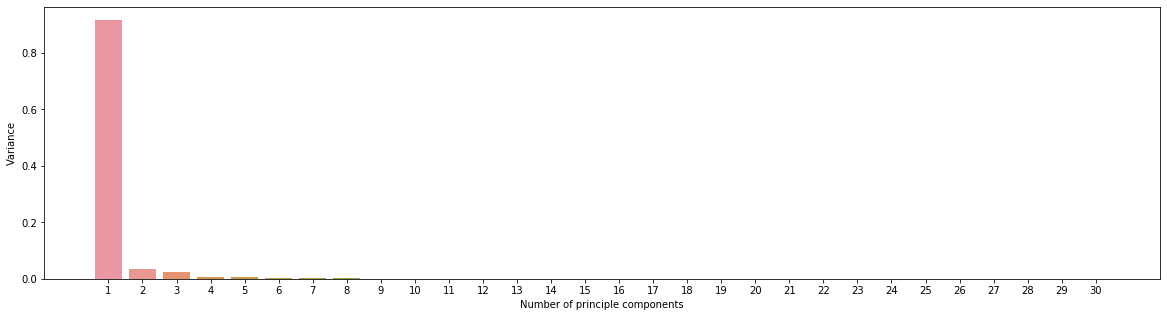

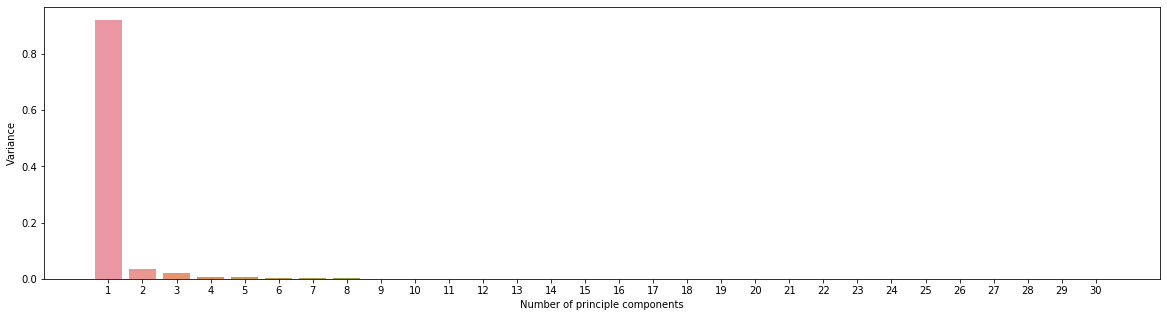

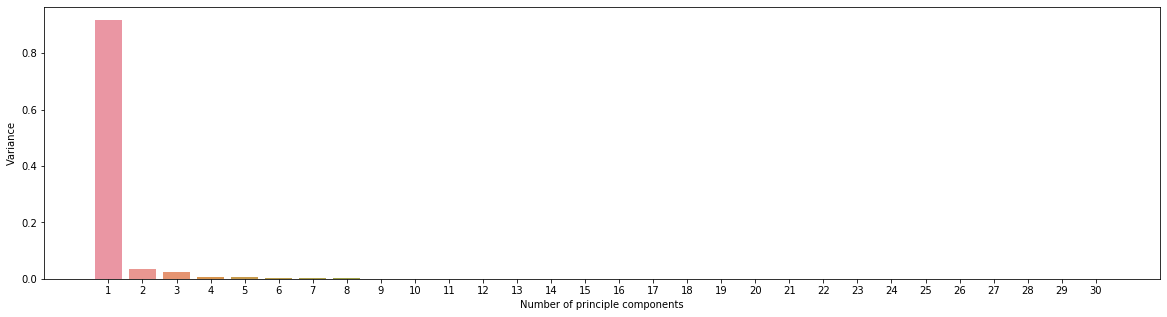

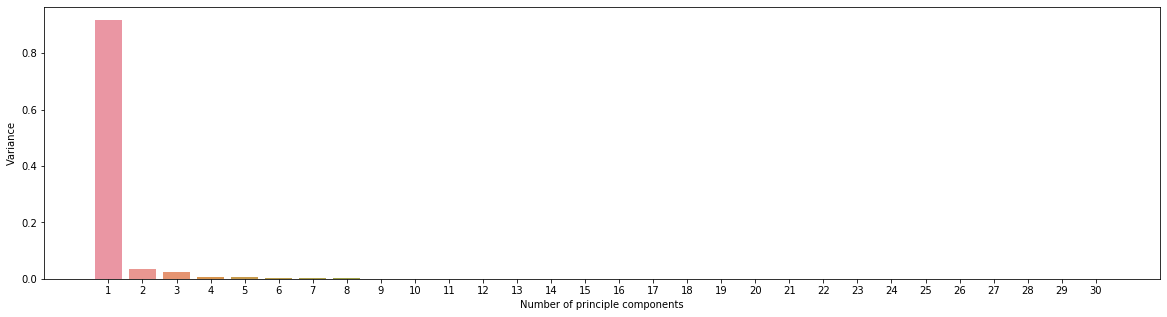

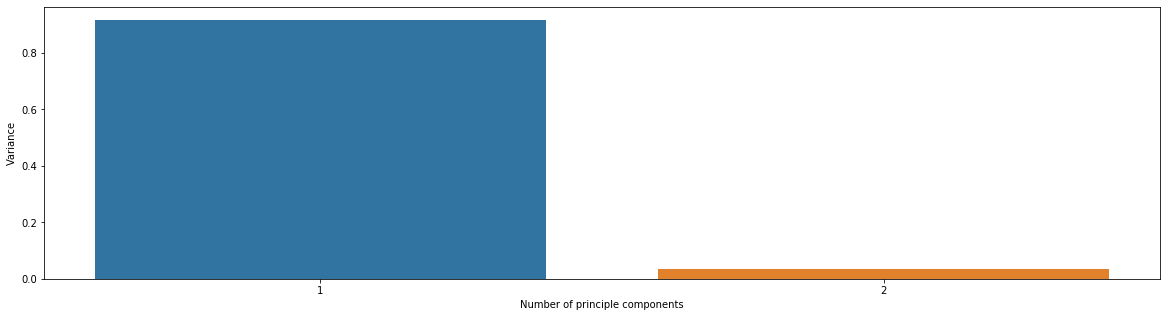

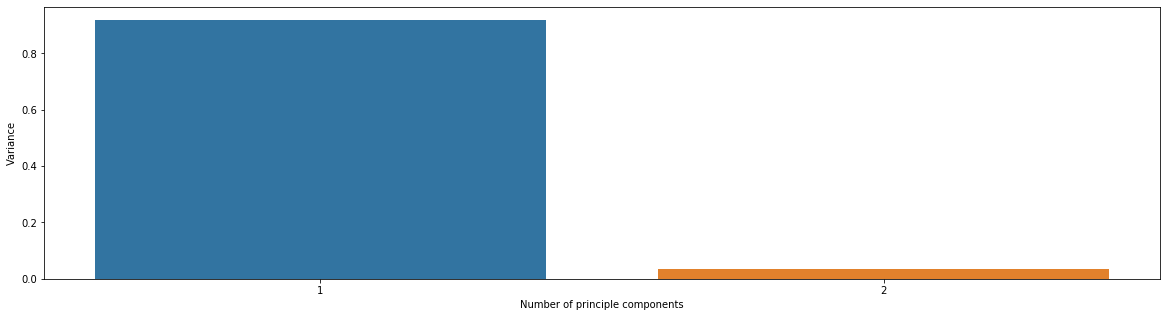

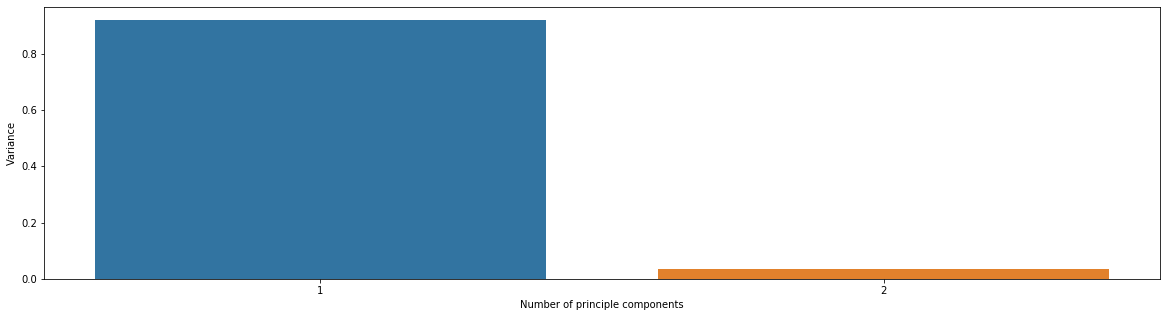

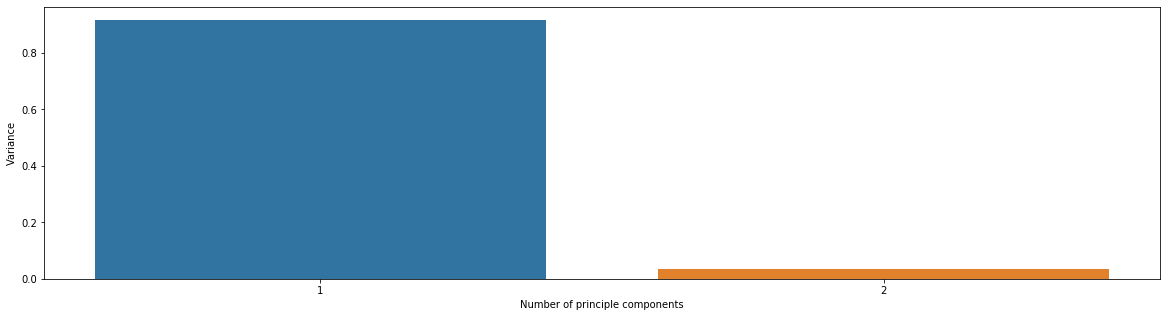

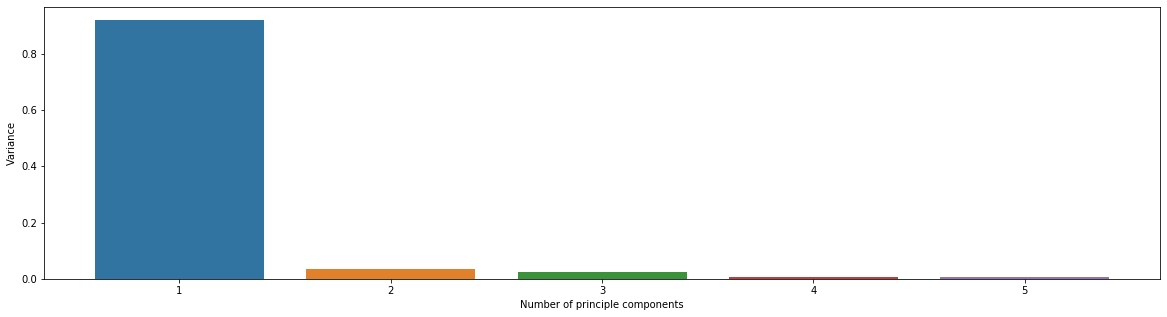

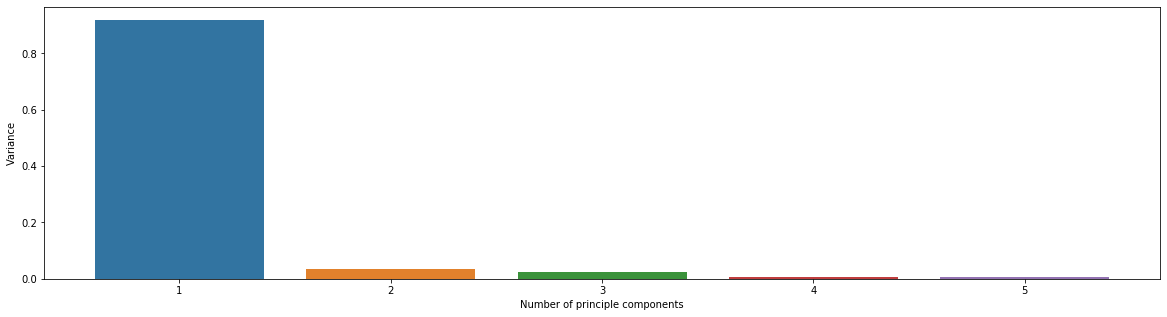

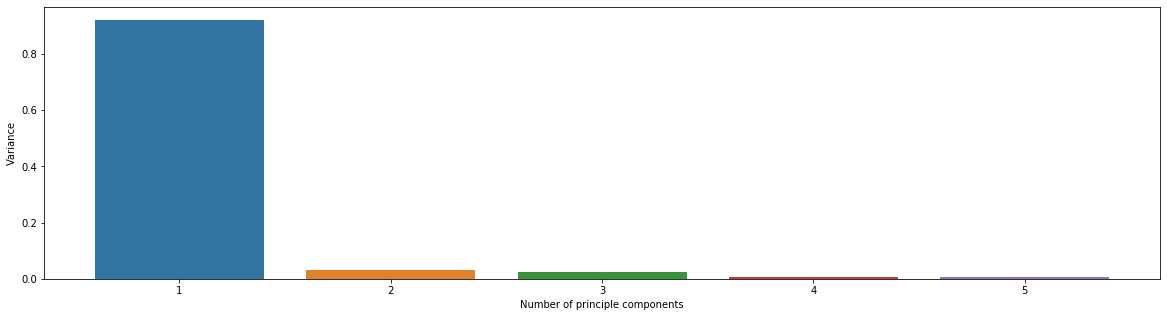

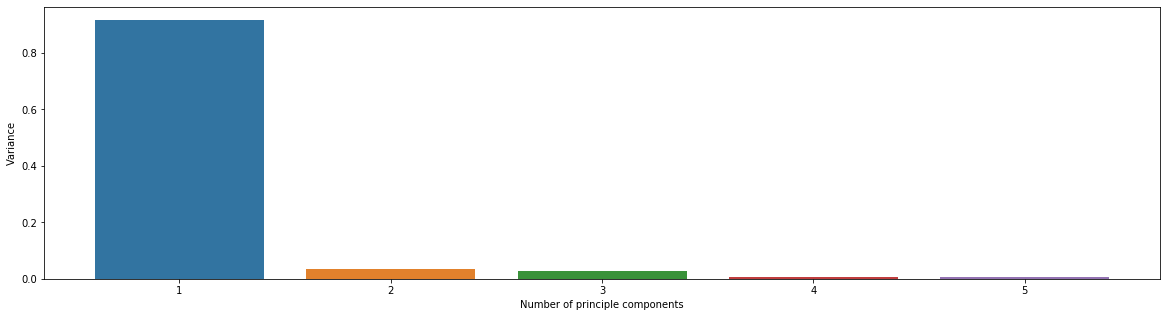

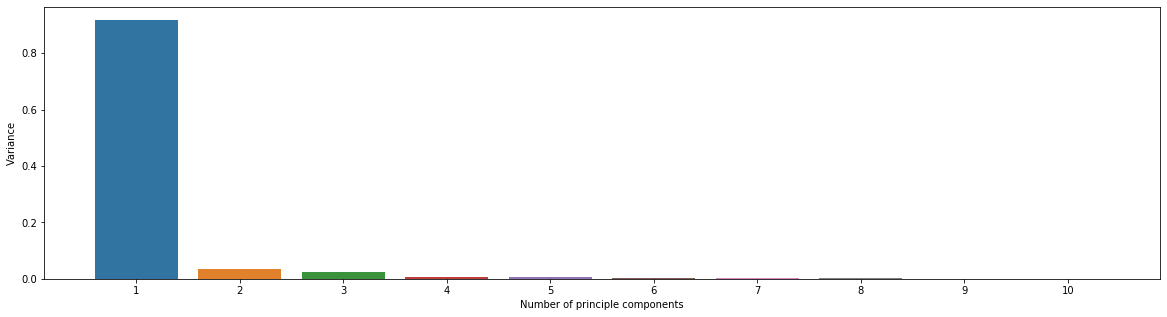

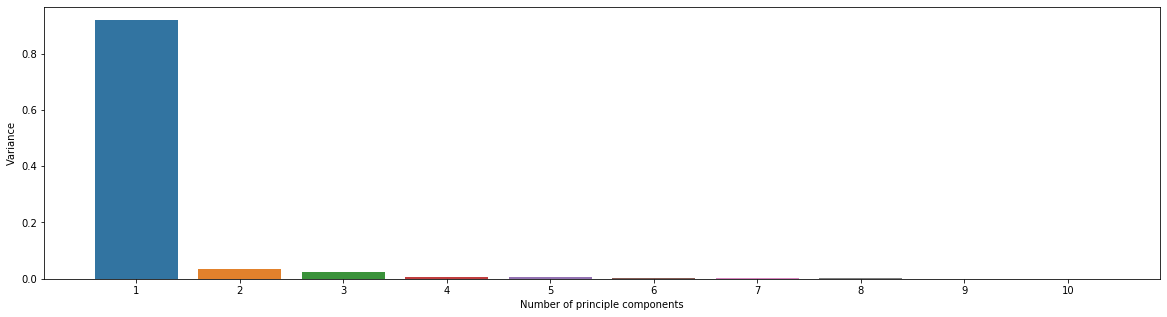

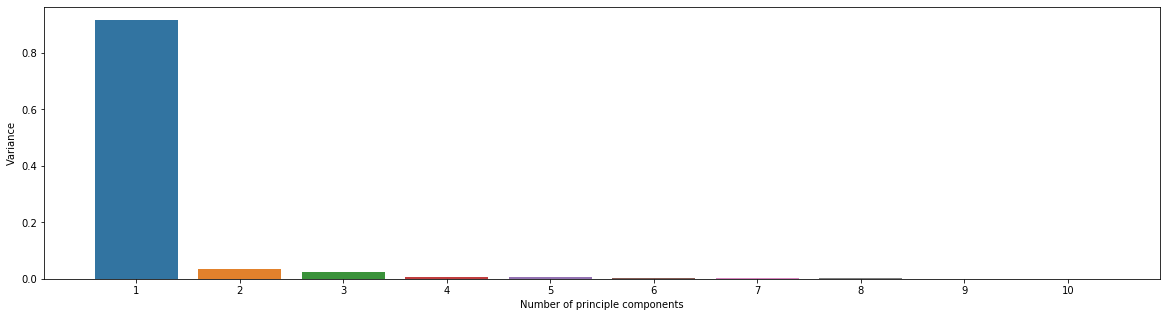

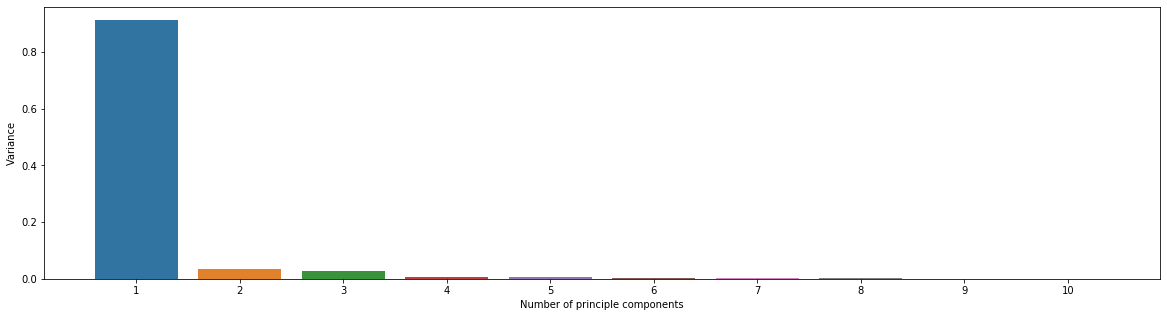

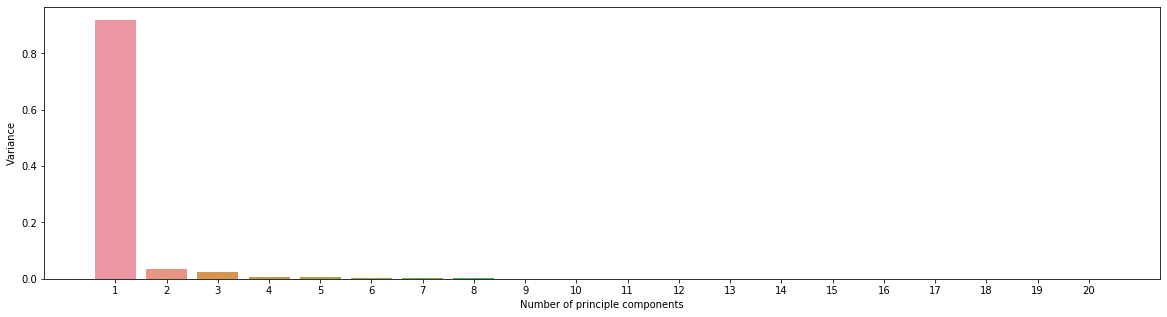

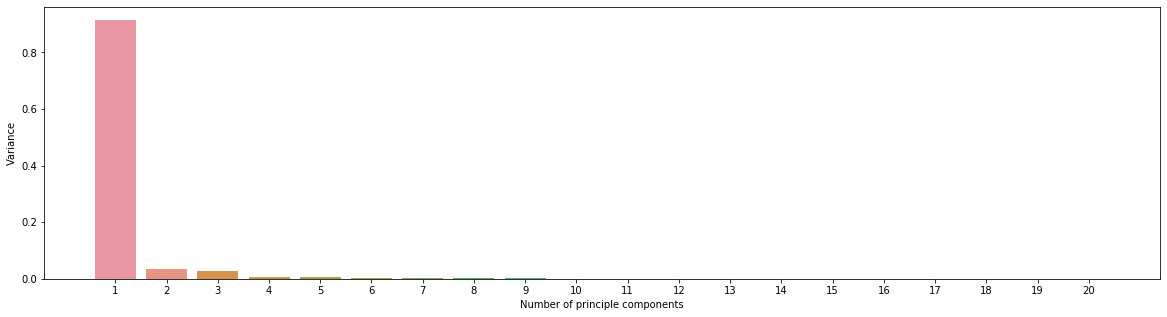

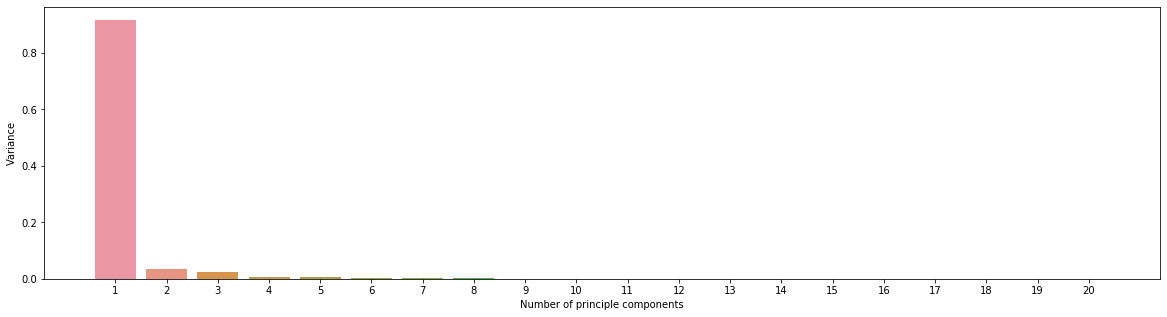

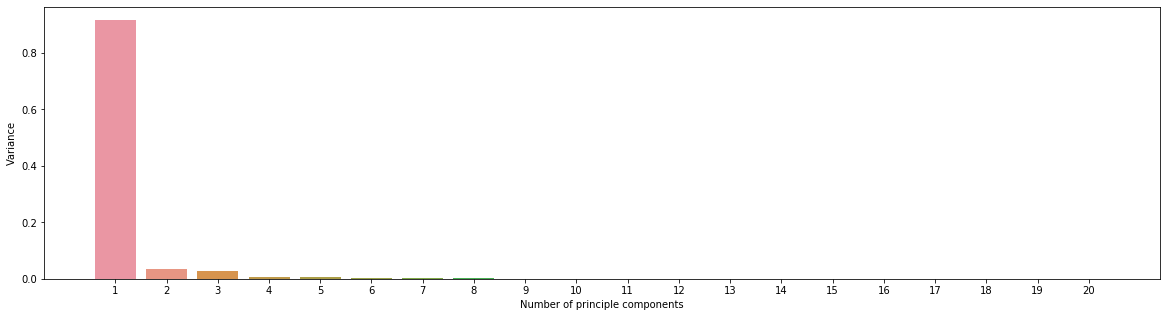

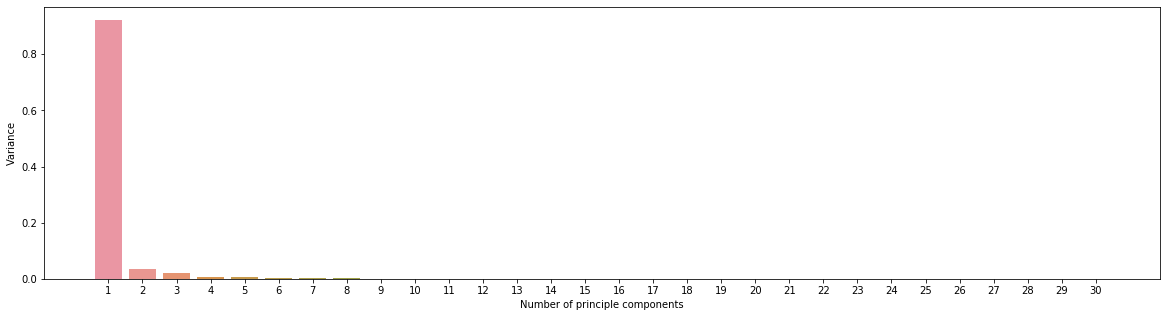

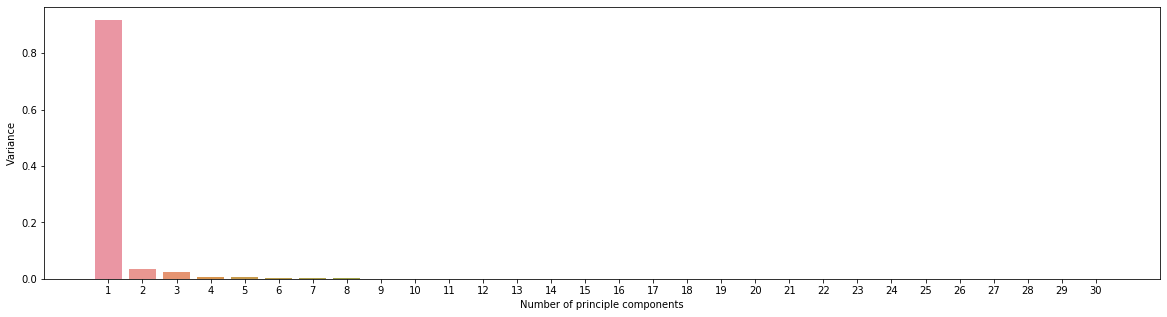

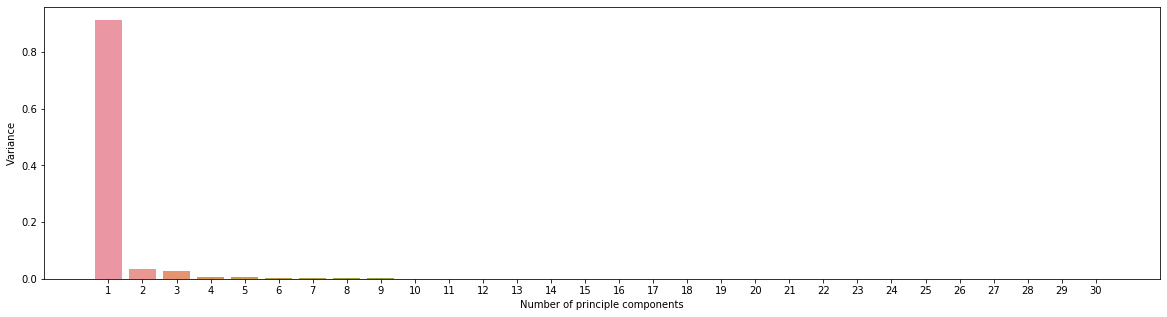

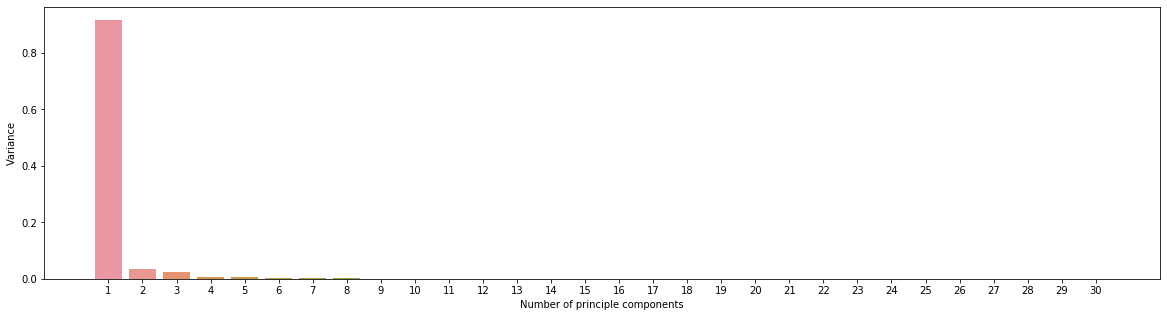

In [29]:
for i in range (0,3):  
    for n in pcavalues:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)   
            X_train, X_test = preprocess_pca(X_train, X_test, n)
            tree_para = {'criterion':['gini','entropy'],'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70], 'max_depth':[5,10,15,20,30]} 
            DTC_GS = GridSearchCV(DecisionTreeClassifier(), tree_para, cv = 10, return_train_score = True, verbose = 0, scoring = score, n_jobs = -1)
            DTC_GS.fit(X_train,y_train)

            y_pred = DTC_GS.predict(X_test)
            results = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            results.insert(0,'Decision Tree Classifier RUN ' + " n_components = " + str(n) + " scoring = " + score + " ")
            results.pop(4)
            results.insert(4, DTC_GS.score(X_train, y_train))
            results.insert(5, DTC_GS.score(X_test, y_test))

            ###########

            df11 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([df11])
            print("The best estimator for RUN " + str(i+1) + " n_components = " + str(n) + " scoring = " + score + " " + str(DTC_GS.best_estimator_))
            print("The Confusion matrix for RUN" + str(i+1) + " n_components = " + str(n) + " scoring = " + score + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))

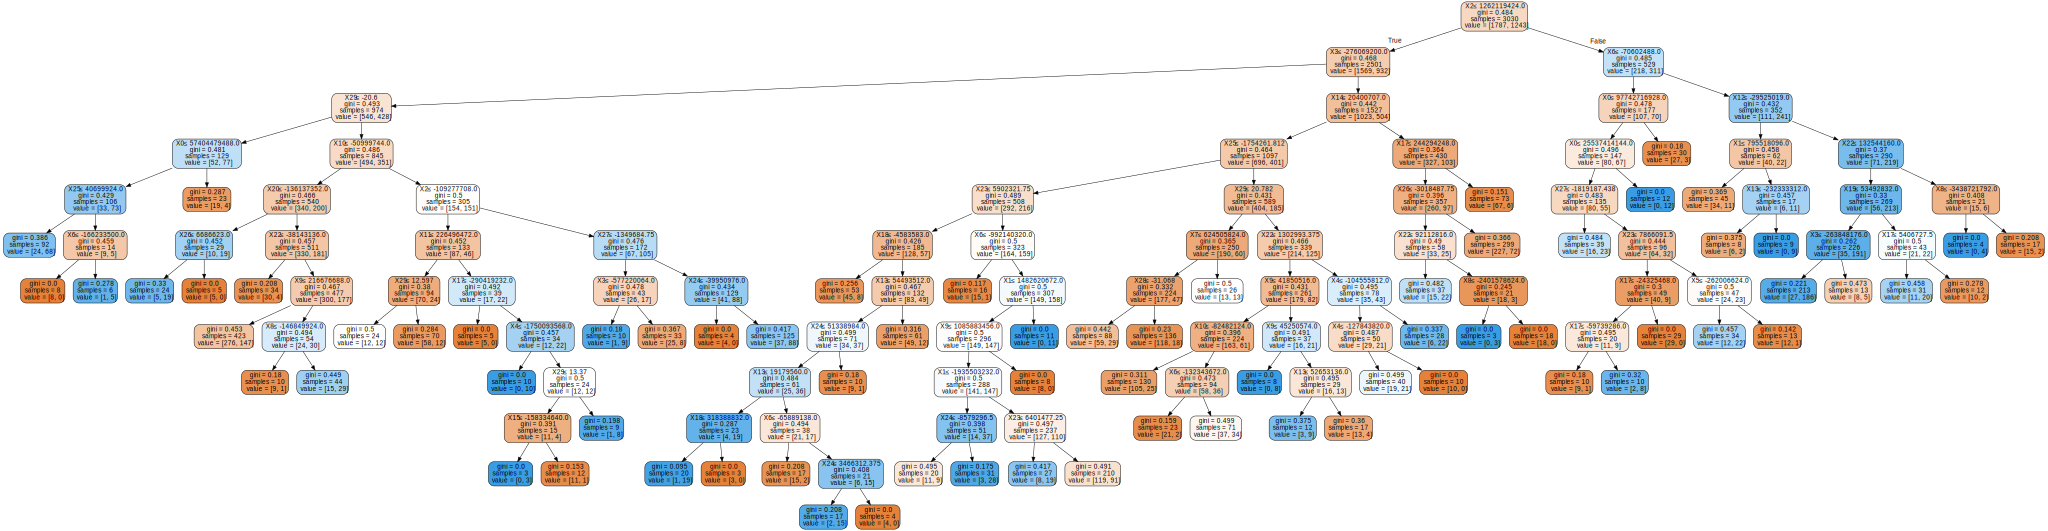

In [30]:
dot_data = tree.export_graphviz(DTC_GS.best_estimator_, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [31]:
print('The parameters combination that would give best accuracy is : ')
print(DTC_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'criterion': 'gini', 'max_depth': 15, 'max_leaf_nodes': 70}


In [32]:
resultsDF = resultsDF.sort_values(by = ["Precision"], ascending = False)
print("Ranked by Precision")
resultsDF

Ranked by Precision


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
Decision Tree Classifier RUN n_components = 10 scoring = precision,0.754132,0.570226,0.511070,0.821429,0.890909
Decision Tree Classifier RUN n_components = 10 scoring = accuracy,0.748367,0.570263,0.505565,0.641914,0.624011
SVM NON Linear RUN 1 n_components = 2 scoring = accuracy,0.744845,0.511921,0.400316,0.593069,0.604222
Decision Tree Classifier RUN n_components = 20 scoring = precision,0.739759,0.559015,0.497922,0.800885,0.854167
Decision Tree Classifier RUN n_components = 20 scoring = precision,0.708787,0.559572,0.497779,0.827586,0.807018
...,...,...,...,...,...
Gaussian Naive Bayes RUN n_components = 10 scoring = accuracy,0.288918,0.500000,0.366221,0.593069,0.577836
Gaussian Naive Bayes RUN n_components = 20 scoring = accuracy,0.288918,0.500000,0.366221,0.593069,0.577836
SVM NON Linear RUN 1 n_components = 2 scoring = f1,0.286939,0.500000,0.364627,0.000000,0.000000


In [33]:
resultsDF = resultsDF.sort_values(by = ["Recall"], ascending = False)
print("Ranked by Recall")
resultsDF

Ranked by Recall


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
KNN RUN 1 n_components = 10 scoring = precision,0.676274,0.605351,0.584923,0.635317,0.718519
KNN RUN 2 n_components = 20 scoring = precision,0.647342,0.591271,0.573452,0.625229,0.657143
Decision Tree Classifier RUN n_components = 5 scoring = recall,0.625814,0.590413,0.577298,0.400163,0.331288
KNN RUN 2 n_components = 5 scoring = accuracy,0.619477,0.590368,0.583864,0.681518,0.635884
KNN RUN 3 n_components = 5 scoring = precision,0.644105,0.588955,0.569318,0.635514,0.657143
...,...,...,...,...,...
SVMLinear RUN 3 n_components = 2 scoring = accuracy,0.475268,0.479198,0.428438,0.439604,0.436675
SVMLinear RUN 3 n_components = 2 scoring = recall,0.471689,0.477894,0.411310,0.750199,0.726351
SVMLinear RUN 2 n_components = 2 scoring = accuracy,0.468721,0.477647,0.408741,0.450825,0.430079


In [34]:
resultsDF = resultsDF.sort_values(by = ["Fscore"], ascending = False)
print("Ranked by F Measure")
resultsDF

Ranked by F Measure


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
KNN RUN 2 n_components = 20 scoring = recall,0.589604,0.585795,0.586037,0.693745,0.472050
Decision Tree Classifier RUN n_components = 30 scoring = f1,0.601692,0.587500,0.585496,0.655904,0.463551
KNN RUN 1 n_components = 10 scoring = precision,0.676274,0.605351,0.584923,0.635317,0.718519
KNN RUN 2 n_components = 5 scoring = accuracy,0.619477,0.590368,0.583864,0.681518,0.635884
KNN RUN 1 n_components = 20 scoring = f1,0.586030,0.583167,0.583492,0.733929,0.503268
...,...,...,...,...,...
Gaussian Naive Bayes RUN n_components = 10 scoring = accuracy,0.288918,0.500000,0.366221,0.593069,0.577836
Gaussian Naive Bayes RUN n_components = 5 scoring = accuracy,0.288918,0.500000,0.366221,0.593069,0.577836
SVM NON Linear RUN 1 n_components = 2 scoring = f1,0.286939,0.500000,0.364627,0.000000,0.000000


In [35]:
resultsDF = resultsDF.sort_values(by = ["Train score"], ascending = False)
print("Ranked by Train score")
resultsDF

Ranked by Train score


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
Gaussian Naive Bayes RUN n_components = 20 scoring = recall,0.581116,0.542255,0.433297,0.878400,0.904290
Gaussian Naive Bayes RUN n_components = 20 scoring = recall,0.545829,0.528689,0.455331,0.866721,0.842424
Gaussian Naive Bayes RUN n_components = 30 scoring = recall,0.483592,0.490044,0.402402,0.861985,0.808917
Gaussian Naive Bayes RUN n_components = 20 scoring = recall,0.525051,0.514950,0.421681,0.861958,0.843648
Gaussian Naive Bayes RUN n_components = 30 scoring = recall,0.505765,0.503509,0.418390,0.851133,0.823344
...,...,...,...,...,...
SVM NON Linear RUN 1 n_components = 2 scoring = recall,0.640785,0.509771,0.396968,0.029079,0.028571
SVM NON Linear RUN 1 n_components = 2 scoring = recall,0.611355,0.506551,0.389784,0.021827,0.022152
SVM NON Linear RUN 1 n_components = 2 scoring = recall,0.298153,0.500000,0.373554,0.000000,0.000000


In [36]:
resultsDF = resultsDF.sort_values(by = ["Test score"], ascending = False)
print("Ranked by Test score")
resultsDF

Ranked by Test score


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
Gaussian Naive Bayes RUN n_components = 20 scoring = recall,0.581116,0.542255,0.433297,0.878400,0.904290
Decision Tree Classifier RUN n_components = 10 scoring = precision,0.754132,0.570226,0.511070,0.821429,0.890909
Decision Tree Classifier RUN n_components = 20 scoring = precision,0.739759,0.559015,0.497922,0.800885,0.854167
Gaussian Naive Bayes RUN n_components = 20 scoring = recall,0.525051,0.514950,0.421681,0.861958,0.843648
Gaussian Naive Bayes RUN n_components = 30 scoring = recall,0.533299,0.520247,0.436190,0.848583,0.842767
...,...,...,...,...,...
SVM NON Linear RUN 1 n_components = 2 scoring = recall,0.640785,0.509771,0.396968,0.029079,0.028571
SVM NON Linear RUN 1 n_components = 2 scoring = recall,0.611355,0.506551,0.389784,0.021827,0.022152
SVM NON Linear RUN 1 n_components = 2 scoring = recall,0.298153,0.500000,0.373554,0.000000,0.000000
